## **Problem Statement**

Author: Vinayak Hampiholi

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

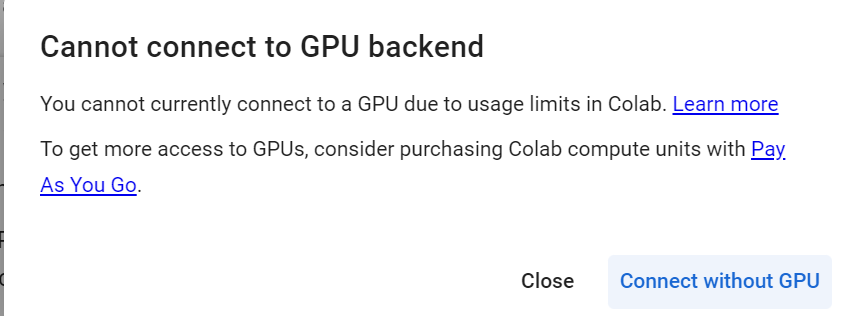

## **Installing and Importing Necessary Libraries**

In [1]:
!pip install xgboost

In [2]:
# Installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

In [3]:
# Install llama-cpp-python if not already installed
%pip install llama-cpp-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
# !CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python -q

In [5]:
# Import the google drive library to read the datasets from the google drive
#from google.colab import drive
#drive.mount("/content/drive")

In [6]:
# Import markdown and display from IPython to display the output in markdown.
import IPython
from IPython.display import display, Markdown

# Get the version of IPython package
display(Markdown("**Observations:**\n- The version of IPython is {}.".format(IPython.__version__)))

**Observations:**
- The version of IPython is 8.31.0.

In [7]:
# Import numpy as np
import numpy as np

# Get the version of numpy
display(Markdown("**Observations:**\n- The version of numpy is {}.".format(np.__version__)))

**Observations:**
- The version of numpy is 1.26.4.

In [8]:
# Import the pandas library to load the data into dataframe
import pandas as pd

# Get the version of Pandas
display(Markdown("**Observations:**\n- The version of pandas is {}.".format(pd.__version__)))

**Observations:**
- The version of pandas is 1.5.3.

In [9]:
# Import seaborn and matplotlib.pyplot to plot the graphs
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Get the version of seaborn
display(Markdown("**Observations:**\n- The version of seaborn is {}.".format(sns.__version__)))

**Observations:**
- The version of seaborn is 0.13.1.

In [10]:
# Import sklearn
import sklearn

# Import model_selection.train_test_split()
from sklearn.model_selection import train_test_split

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Import AdaboostClassifier from sklearn.ensemble
from sklearn.ensemble import AdaBoostClassifier

# Import GradientBoostingClassifier from sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier

# Import Encoder from sklearn.ensemble
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Import GridSearchCV from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

# Get the version of sklearn
display(Markdown("**Observations:**\n- The version of sklearn is {}.".format(sklearn.__version__)))

**Observations:**
- The version of sklearn is 1.5.1.

In [11]:
# Import regular expression library
import re

# Get the version of regular expression
display(Markdown("**Observations:**\n- The version of regular expression is {}.".format(re.__version__)))

**Observations:**
- The version of regular expression is 2.2.1.

In [12]:
# Import NLTK
import nltk

# Download the stopwords
nltk.download("stopwords")

# Download the wordnet to perform stemming
nltk.download('wordnet')

# Import the stopwords to remove common stop words
from nltk.corpus import stopwords

# Import the PorterStemmer from nltk.stem.porter to perform stemming
from nltk.stem.porter import PorterStemmer

# Create an instance for PorterStemmer and this will be used to perform stemming
stemmer = PorterStemmer()

# Get the version of nltk
display(Markdown("**Observations:**\n- The version of nltk is {}.".format(nltk.__version__)))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vinayakhampiholi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vinayakhampiholi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Observations:**
- The version of nltk is 3.8.1.

In [13]:
# Import gensim
import gensim

# Import Word2Vec from gensim.models
from gensim.models import Word2Vec

# Import glove2word2vec from gensim.scripts.glove2word2vec
from gensim.scripts.glove2word2vec import KeyedVectors

# Get the filename
glove_file = "glove.6B.100d.txt.word2vec"

# Get the version of gensim
display(Markdown("**Observations:**\n- The version of gensim is {}.".format(nltk.__version__)))

**Observations:**
- The version of gensim is 3.8.1.

In [14]:
# Import sentence_transformers
import sentence_transformers

# Import SentenceTransformer from sentence_transformers
from sentence_transformers import SentenceTransformer

# Get the version of sentence_transformers
display(Markdown("**Observations:**\n- The version of sentence_transformers is {}.".format(sentence_transformers.__version__)))

**Observations:**
- The version of sentence_transformers is 3.4.1.

In [15]:
# Import xgboost
import xgboost

# Import XGBClassifier from xgboost
from xgboost import XGBClassifier

# Get the version of xgboost
display(Markdown("**Observations:**\n- The version of sentence_transformers is {}.".format(xgboost.__version__)))

**Observations:**
- The version of sentence_transformers is 2.1.4.

In [16]:
# Import torch for Deep Learning library
import torch

# Display the version of the torch
display(Markdown("**Observations:**\n- The version of torch is {}.".format(torch.__version__)))

**Observations:**
- The version of torch is 2.5.1.

In [17]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

In [18]:
# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

In [19]:
# For progress bar related functionalities
from tqdm import tqdm

# To use the progress bar
tqdm.pandas()

In [20]:
# Import warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [21]:
# Create a function that removes the special characters from the input text
def remove_special_characters(text):

  # Defining the regex pattern to match non-alphanumeric characters
  pattern = "[^A-Za-z0-9]+"

  # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
  new_text = "".join(re.sub(pattern, " ", text))

  # Return the new_text
  return new_text

In [22]:
# Create a function that removes the stopwords from the input text using the nltk.stopwords()
def remove_stopwords(text):

  # Splitting the text into words
  words = text.split()

  # Removing English language stopwords
  new_text = " ".join([word for word in words if word not in stopwords.words("english")])

  # Return the new_text
  return new_text

In [23]:
# Stemming is a language processing method that chops off word endings to find the root or base form of words. E.g, converting Jumping to Jump or Running to Run etc.

# Create a function that performs the described stemming operations using PorterStemmer
def apply_porter_stemmer(text):

  # Split text into separate words
  words = text.split()

  # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
  new_text = " ".join([stemmer.stem(word) for word in words])

  # Return the new_text
  return new_text

In [24]:
# Create a function to vectorize the vectors
def average_vectorizer_Word2Vec(doc):

  # Initializing a feature vector for the sentence
  feature_vector = np.zeros((vec_size,), dtype="float64")

  # Creating a list of words in the sentence that are present in the model vocabulary
  words_in_vocab = [word for word in doc.split() if word in words]

  # adding the vector representations of the words
  for word in words_in_vocab:
    feature_vector += np.array(word_vector_dict[word])

  # Dividing by the number of words to get the average vector
  if len(words_in_vocab) != 0:
    feature_vector /= len(words_in_vocab)

  # Return feature_vector
  return feature_vector

In [25]:
# Create a function to vectorize the vectors
def average_vectorizer_GloVe(doc):

  # Initializing a feature vector for the sentence
  feature_vector = np.zeros((vec_size,), dtype="float64")

  # Creating a list of words in the sentence that are present in the model vocabulary
  words_in_vocab = [word for word in doc.split() if word in glove_words]

  # adding the vector representations of the words
  for word in words_in_vocab:
    feature_vector += np.array(glove_word_vector_dict[word])

  # Dividing by the number of words to get the average vector
  if len(words_in_vocab) != 0:
    feature_vector /= len(words_in_vocab)

  # Return feature_vector
  return feature_vector

In [26]:
# Create a function to compute the cosine similarity between two embedding vectors
def cosine_score(model, text):
  # encoding the text
  embeddings = model.encode(text)

  # calculating the L2 norm of the embedding vector
  norm1 = np.linalg.norm(embeddings[0])
  norm2 = np.linalg.norm(embeddings[1])

  # computing the cosine similarity
  cosine_similarity_score = ((np.dot(embeddings[0],embeddings[1]))/(norm1*norm2))

  return cosine_similarity_score

In [27]:
# Create a function that returns the Performance Metrics of a model
def model_performance_classification_report(model, predictors, target, model_name):

  # Make predictions using the classifier
  predions = model.predict(predictors)

  # Compute Accuracy
  accuracy = accuracy_score(target, predions)

  # Compute Recall
  recall = recall_score(target, predions, average = "weighted")

  # Compute Precision
  precision = precision_score(target, predions, average = "weighted")

  # Compute F1-score
  f1 = f1_score(target, predions, average = "weighted")

  # Create a DataFrame to store the metrics
  performance_dataframe = pd.DataFrame({"Accuracy": [accuracy], "Recall": [recall], "Precision": [precision], "F1": [f1], "Model": model_name})

  # Return the dataframe
  return performance_dataframe

In [28]:
# Create a function that returns the confusion matrix
def confusion_matrix(model, predictors, target, model_name):

  # Make predictions using the classifier
  predictions = model.predict(predictors)

  # Define the labels for the confusion matrix
  labels = ["Negative", "Neutral", "Positive"]

  # Compute the confusion matrix
  confusion_matrix = pd.crosstab(target, predictions)

  # Plot the confusion matrix using a heatmap with annotations
  sns.heatmap(confusion_matrix, annot = True, fmt = "d", cmap = "Blues", xticklabels = labels, yticklabels =labels)

  # Label for the x-axis
  plt.xlabel("Predicted")

  # Label for the y-axis
  plt.ylabel("Actual")

  # Set the title of the plot
  plt.title("Confusion Matrix " + model_name)

  # Display the plot
  plt.show()

  # Return the confusion matrix
  return confusion_matrix

In [29]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

In [30]:
#Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=1024,      # Set the maximum number of tokens the model should generate for this task.
      temperature=0.7,     # Set the value for temperature.
      top_p=0.9,           # Set the value for top_p.
      top_k=50,            # Set the value for top_k.
      echo=False,
    )

    final_output = model_output["choices"][0]["text"]

    return final_output

## **Loading the dataset**

In [31]:
# We will load the data into a raw dataframe and use a copy of the dataframe for further analysis
stock_news_raw = pd.read_csv("stock_news.csv")
stock_news = stock_news_raw.copy()

# Display the status of the data loading
display(Markdown("**Observations:**"))
if stock_news is None:
    display(Markdown("- The data loading is not successful."))
else:
    display(Markdown("- The data is loaded successfully."))

**Observations:**

- The data is loaded successfully.

## **Data Overview**

In [32]:
# Print the first 5 rows of the dataset
stock_news.head(5)

Date                                               News       Open  \
0  2019-01-02   The tech sector experienced a significant dec...  41.740002   
1  2019-01-02   Apple lowered its fiscal Q1 revenue guidance ...  41.740002   
2  2019-01-02   Apple cut its fiscal first quarter revenue fo...  41.740002   
3  2019-01-02   This news article reports that yields on long...  41.740002   
4  2019-01-02   Apple's revenue warning led to a decline in U...  41.740002   

        High        Low      Close     Volume  Label  
0  42.244999  41.482498  40.246914  130672400     -1  
1  42.244999  41.482498  40.246914  130672400     -1  
2  42.244999  41.482498  40.246914  130672400     -1  
3  42.244999  41.482498  40.246914  130672400     -1  
4  42.244999  41.482498  40.246914  130672400     -1

In [33]:
# Show the rows and column details of the dataset
display(Markdown("**Observations:**"))

# Show the number of rows
display(Markdown("- The number of rows in the dataset: {}.".format(stock_news.shape[0])))

# Show the number of columns
display(Markdown("- The number of cols in the dataset: {}.".format(stock_news.shape[1])))

**Observations:**

- The number of rows in the dataset: 349.

- The number of cols in the dataset: 8.

In [34]:
# Show the datatypes of the columns
stock_news.info()

# Provide observations on the above information
display(Markdown("**Observations:**"))

# Display the datatype for each column
for col in stock_news.columns:

  # Display the column name and datatype
  display(Markdown("- The datatype of {} is {}.".format(col, stock_news[col].dtype)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


**Observations:**

- The datatype of Date is object.

- The datatype of News is object.

- The datatype of Open is float64.

- The datatype of High is float64.

- The datatype of Low is float64.

- The datatype of Close is float64.

- The datatype of Volume is int64.

- The datatype of Label is int64.

In [35]:
# Check the null values
display(Markdown("**Observations:**"))

# Display the null value information
display(Markdown("- The number of null values in the dataset: {}.".format(stock_news.isnull().sum().sum())))

**Observations:**

- The number of null values in the dataset: 0.

In [36]:
# Check the duplicate rows in the data set
display(Markdown("**Observations:**"))

# Display the duplicate row information
display(Markdown("- The number of duplicate rows in the dataset: {}.".format(stock_news.duplicated().sum())))

**Observations:**

- The number of duplicate rows in the dataset: 0.

In [37]:
# The dataset has an onbject column Date. This contains the dates and we can convert the datatype to date.
stock_news["Date"] = pd.to_datetime(stock_news["Date"])

# Display the information of the columns
stock_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    349 non-null    datetime64[ns]
 1   News    349 non-null    object        
 2   Open    349 non-null    float64       
 3   High    349 non-null    float64       
 4   Low     349 non-null    float64       
 5   Close   349 non-null    float64       
 6   Volume  349 non-null    int64         
 7   Label   349 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 21.9+ KB


In [38]:
# Print the unique values for each non-object column
stock_news.nunique()

Date       71
News      349
Open       70
High       70
Low        71
Close      71
Volume     71
Label       3
dtype: int64

**Observations:**
- The News column column contains 349 unique value that means each rows has unique description.
- There are 71 unique dates and this means the data is captured for 71 dates.
- The Label column is a target variable and this has three unique values.

In [39]:
# Perform the 5 point statistical summary on the dataset
stock_news.describe().transpose()

count          mean           std           min           25%  \
Open    349.0  4.622923e+01  6.442817e+00  3.756750e+01  4.174000e+01   
High    349.0  4.670046e+01  6.507321e+00  3.781750e+01  4.224500e+01   
Low     349.0  4.574539e+01  6.391976e+00  3.730500e+01  4.148250e+01   
Close   349.0  4.492632e+01  6.398338e+00  3.625413e+01  4.024691e+01   
Volume  349.0  1.289482e+08  4.317031e+07  4.544800e+07  1.032720e+08   
Label   349.0 -5.444126e-02  7.151192e-01 -1.000000e+00 -1.000000e+00   

                 50%           75%           max  
Open    4.597500e+01  5.070750e+01  6.681750e+01  
High    4.602500e+01  5.085000e+01  6.706250e+01  
Low     4.564000e+01  4.977750e+01  6.586250e+01  
Close   4.459692e+01  4.911079e+01  6.480523e+01  
Volume  1.156272e+08  1.511252e+08  2.444392e+08  
Label   0.000000e+00  0.000000e+00  1.000000e+00

**Observations:**
- The 5 point summary is done on the numeric columns like Open, High, Low, Close, Volume and Label.
- The dataset contains 349 rows for all the numeric columns and no data is null.
- The dataset contains details from 2nd of January 2019 to 30th of April 2019.
- Open, High, Low, Close and Volume appears to show a normal curve.
- The Label column is a target variable and this has three values -1, 0 and +1.
- Since this is a sentiment analysis data, we can consider the Lable -1 as negative sentiment, 0 as neutral and +1 as positive sentiment.

## **Exploratory Data Analysis**

### Univariate Analysis

* Distribution of individual variables
* Compute and check the distribution of the length of news content

#### Label

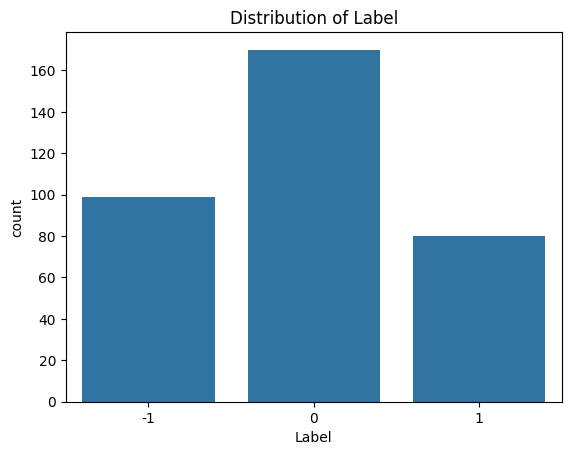

In [40]:
# Draw the count plot for the column Label
sns.countplot(data = stock_news, x = "Label")

# Set the title
plt.title("Distribution of Label")

# Display the countplot
plt.show()

**Observations:**
- There are close to 100 negative reviews and 80 positive reviews.
- The rest of the reviews are neutral.

In [41]:
# Create a mapping for the sentiment labels
sentiment_mapping = {0: 'Neutral', 1: 'Positive', -1: 'Negative'}

# Map the sentiment labels to the DataFrame
stock_news["Label_Meaning"] = stock_news["Label"].map(sentiment_mapping)

# Display the 10 rows to validate
stock_news.head(10)

Date                                               News       Open  \
0 2019-01-02   The tech sector experienced a significant dec...  41.740002   
1 2019-01-02   Apple lowered its fiscal Q1 revenue guidance ...  41.740002   
2 2019-01-02   Apple cut its fiscal first quarter revenue fo...  41.740002   
3 2019-01-02   This news article reports that yields on long...  41.740002   
4 2019-01-02   Apple's revenue warning led to a decline in U...  41.740002   
5 2019-01-02  Apple CEO Tim Cook discussed the company's Q1 ...  41.740002   
6 2019-01-02   Roku Inc has announced plans to offer premium...  41.740002   
7 2019-01-02   Wall Street saw modest gains on Wednesday but...  41.740002   
8 2019-01-02   Apple's fiscal first quarter revenue came in ...  41.740002   
9 2019-01-02   Apple Inc. lowered its quarterly sales foreca...  41.740002   

        High        Low      Close     Volume  Label Label_Meaning  
0  42.244999  41.482498  40.246914  130672400     -1      Negative  
1  42.244999  41.482498  40.246914  130672400     -1      Negative  
2  42.244999  41.482498  40.246914  130672400     -1      Negative  
3  42.244999  41.482498  40.246914  130672400     -1      Negative  
4  42.244999  41.482498  40.246914  130672400     -1      Negative  
5  42.244999  41.482498  40.246914  130672400      0       Neutral  
6  42.244999  41.482498  40.246914  130672400      1      Positive  
7  42.244999  41.482498  40.246914  130672400     -1      Negative  
8  42.244999  41.482498  40.246914  130672400     -1      Negative  
9  42.244999  41.482498  40.246914  130672400     -1      Negative

**Observations:**
- The distribution of the values of volumne show an almost normal curve trend.
- The above plot also show a right skew and we might see a few outliers.
- All the three sentiments are spread across various values of Volume.
- We do not see any specific grouping for different values of Labels across the values for Volume.

#### Open

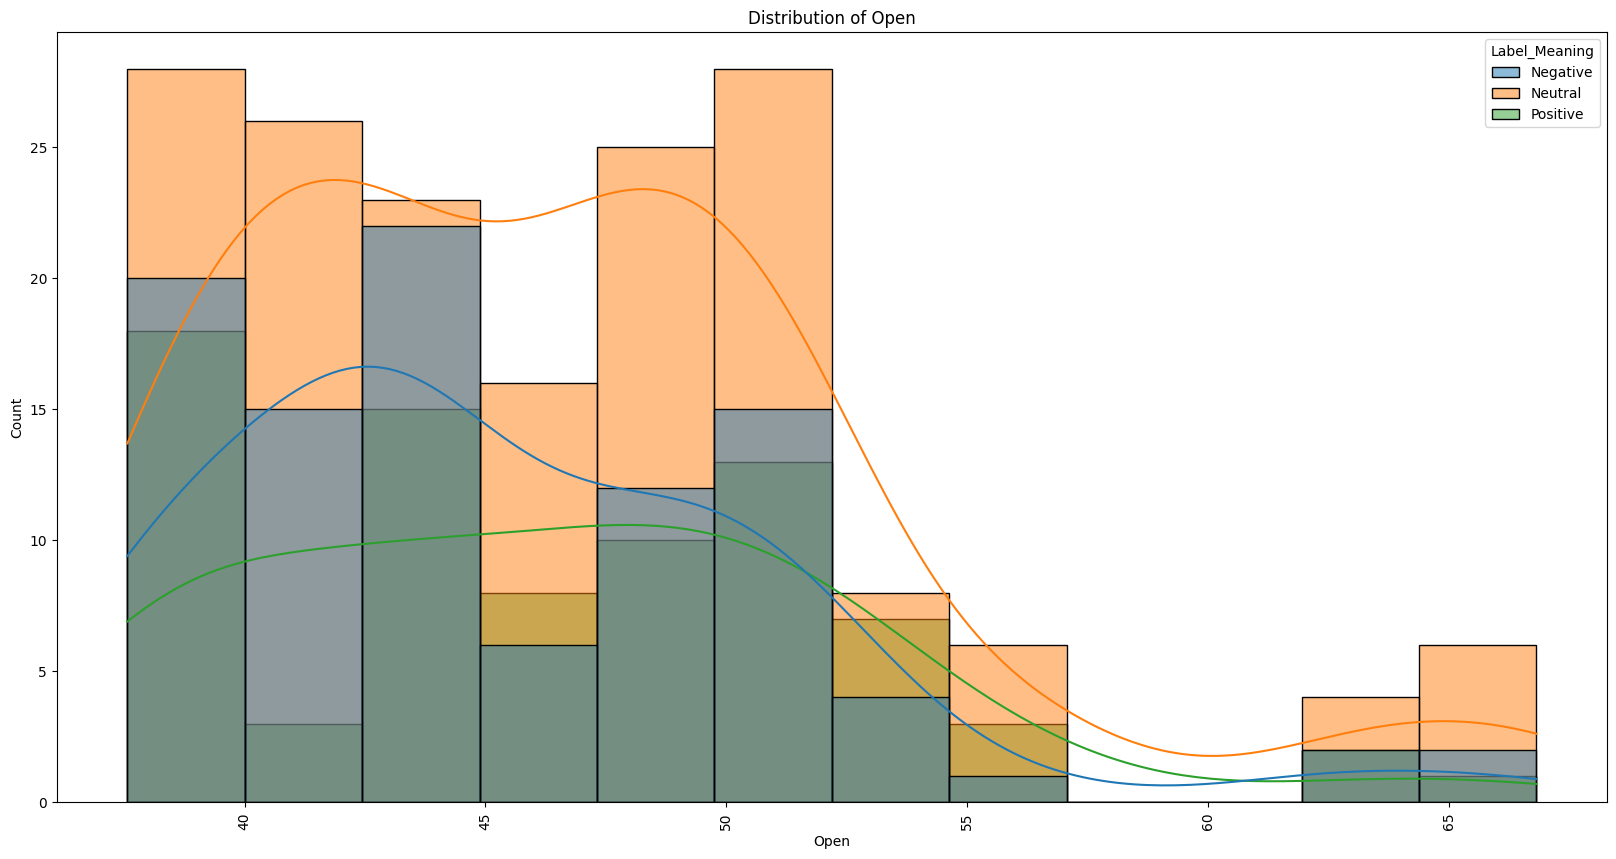

In [42]:
# Use a larger graph with a huge width to involve all the dates.
plt.figure(figsize = (20, 10))

# Draw the histplot for the column Open
sns.histplot(data = stock_news, x = "Open", hue = "Label_Meaning", kde = True)

# Set the title
plt.title("Distribution of Open")

# Tilt the x axis to 90 degrees
plt.xticks(rotation = 90)

# Display the histplot
plt.show()

**Observations:**
- The distribution is not a normal distribution.
- All the three sentiments are spread across various values of Open.
- We do not see any specific grouping for different values of Labels across the values for Open.
- We do not see any specific pattern.

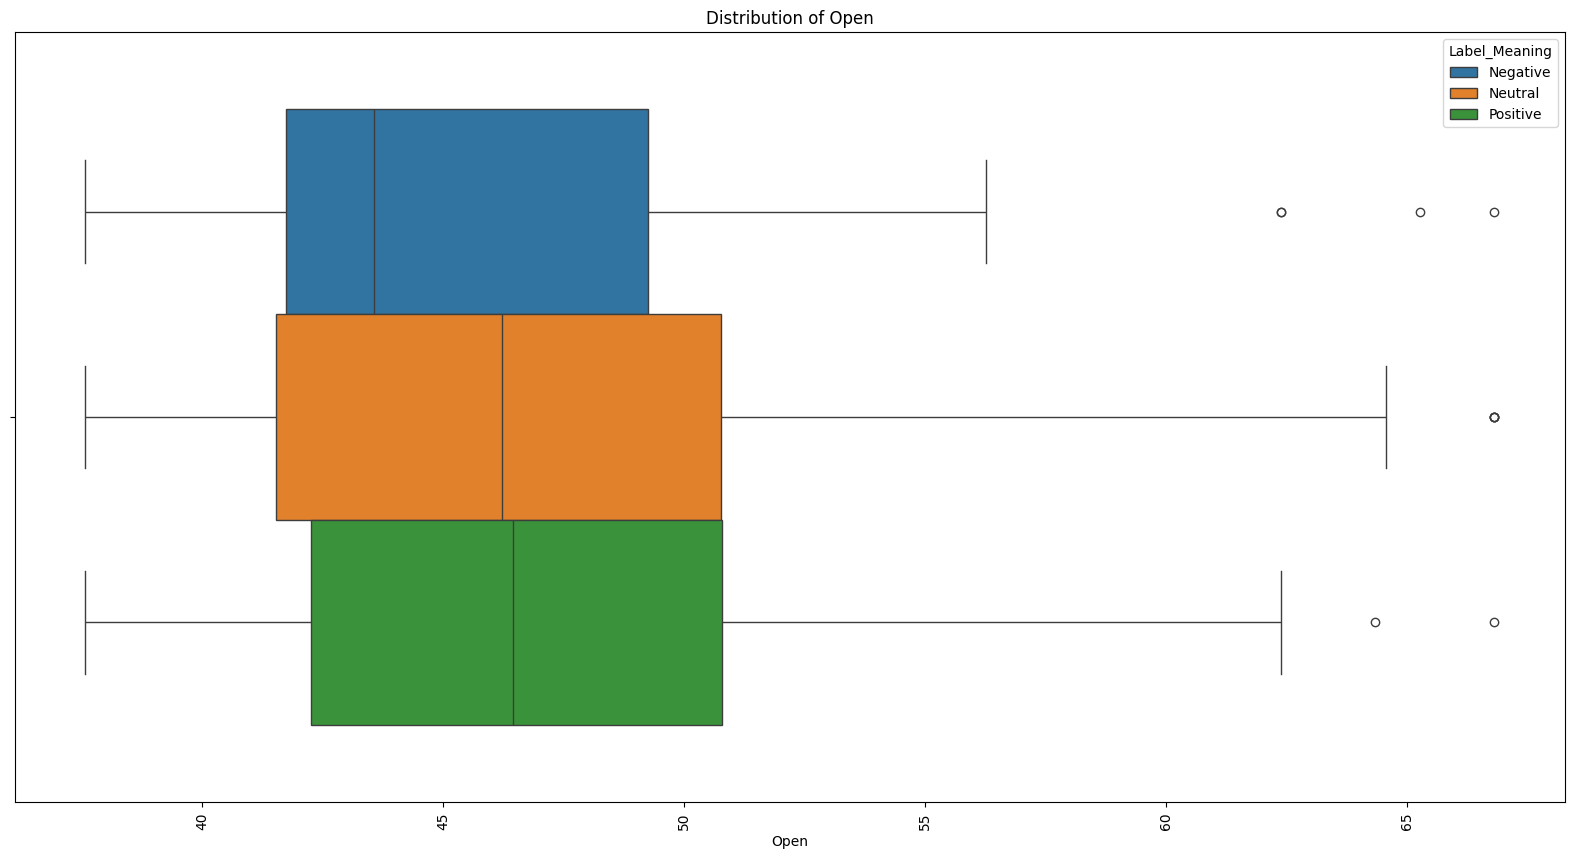

In [43]:
# Use a larger graph with a huge width to involve all the dates.
plt.figure(figsize = (20, 10))

# Draw the boxplot for the column Open
sns.boxplot(data = stock_news, x = "Open", hue = "Label_Meaning")

# Set the title
plt.title("Distribution of Open")

# Tilt the values of x axis to 90 degrees
plt.xticks(rotation = 90)

# Display the boxplot
plt.show()

**Observations:**
- There are a few outliers at the higher side of the value.

#### High

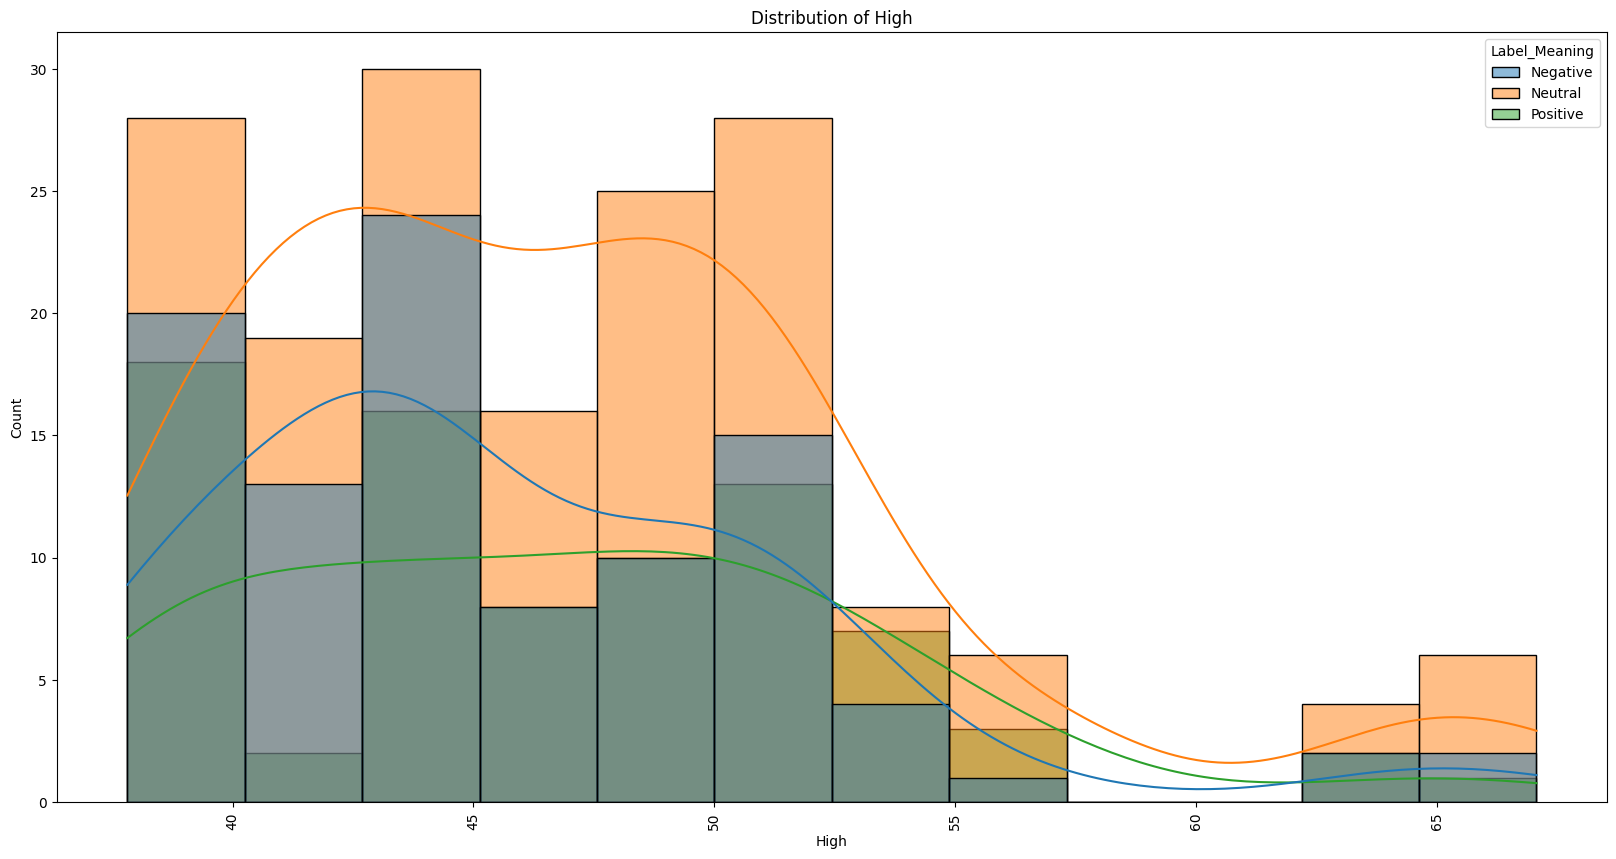

In [44]:
# Use a larger graph with a huge width to involve all the dates.
plt.figure(figsize = (20, 10))

# Draw the histplot for the column High
sns.histplot(data = stock_news, x = "High", hue = "Label_Meaning", kde = True)

# Set the title
plt.title("Distribution of High")

# Tilt the values of x axis to 90 degrees
plt.xticks(rotation = 90)

# Display the histplot
plt.show()

**Observations:**
- The distribution is not a normal distribution.
- All the three sentiments are spread across various values of High.
- We do not see any specific grouping for different values of Labels across the values for High.
- We do not see any specific pattern.

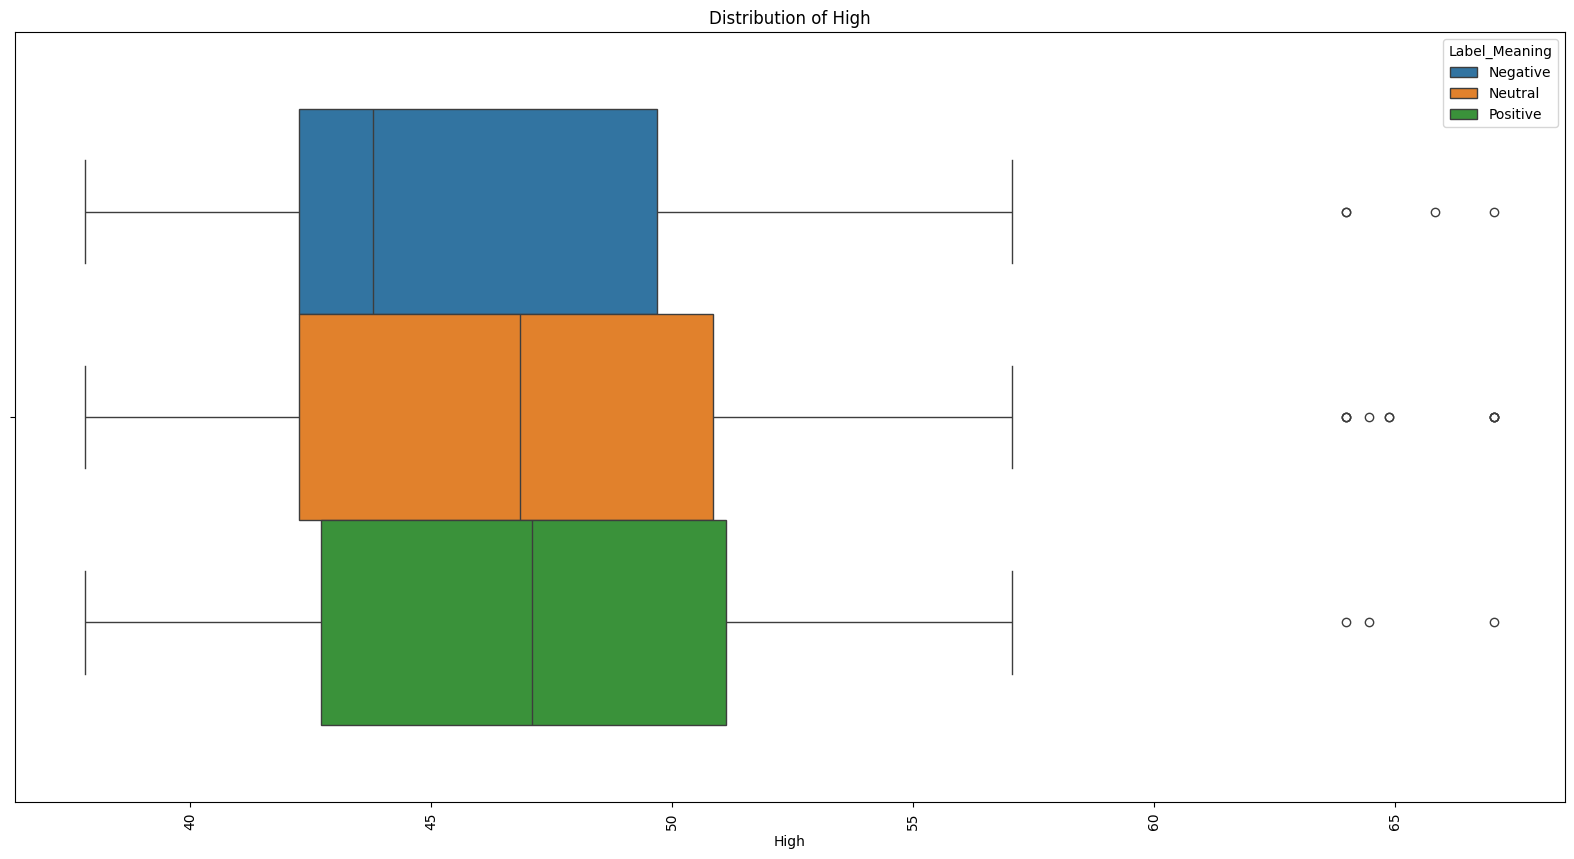

In [45]:
# Use a larger graph with a huge width to involve all the dates.
plt.figure(figsize = (20, 10))

# Draw the boxplot for the column Close
sns.boxplot(data = stock_news, x = "High", hue = "Label_Meaning")

# Set the title
plt.title("Distribution of High")

# Tilt the values of x axis to 90 degrees
plt.xticks(rotation = 90)

# Display the boxplot
plt.show()

**Observations:**
- There are a few outliers at the higher side of the value.

#### Low

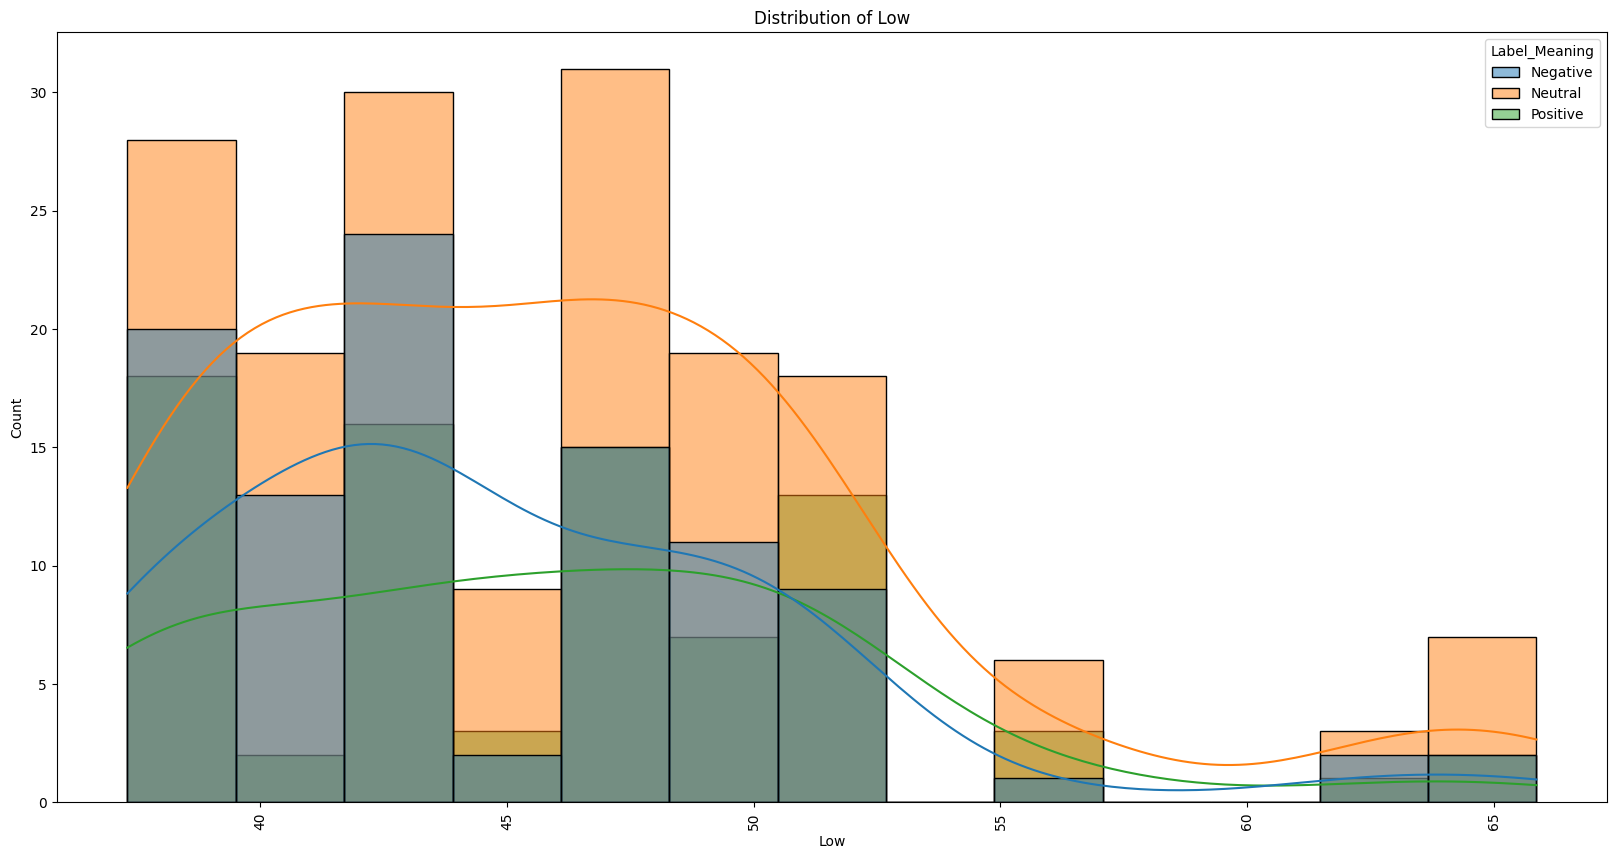

In [46]:
# Use a larger graph with a huge width to involve all the dates.
plt.figure(figsize = (20, 10))

# Draw the histplot for the column Low
sns.histplot(data = stock_news, x = "Low", hue = "Label_Meaning", kde = True)

# Set the title
plt.title("Distribution of Low")

# Tilt the values of x axis to 90 degrees
plt.xticks(rotation = 90)

# Display the histplot
plt.show()

**Observations:**
- The distribution is not a normal distribution.
- All the three sentiments are spread across various values of Low.
- We do not see any specific grouping for different values of Labels across the values for Low.
- We do not see any specific pattern.

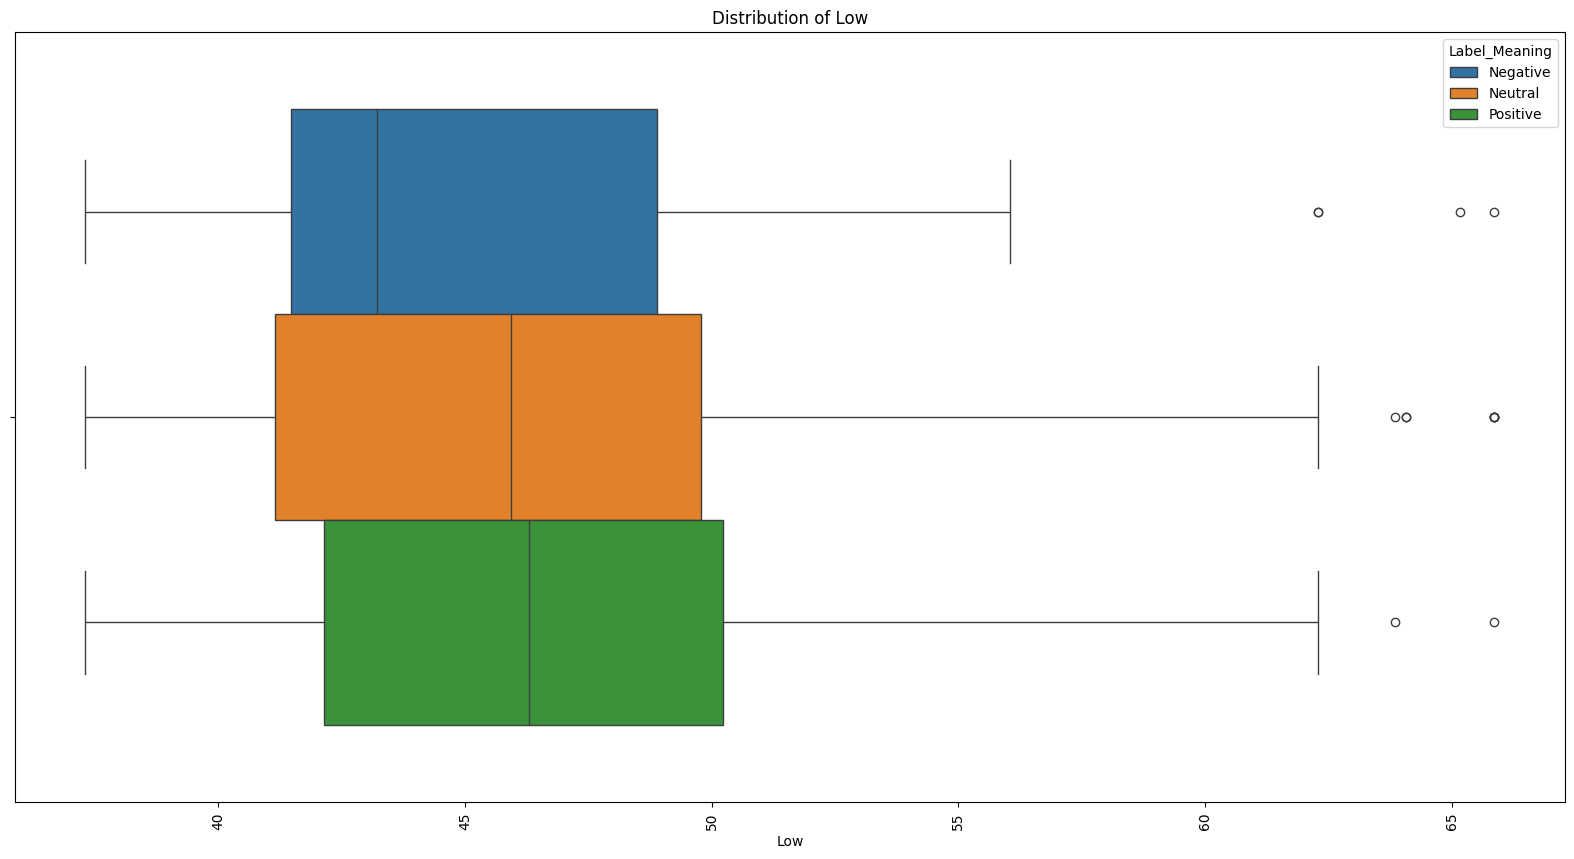

In [47]:
# Use a larger graph with a huge width to involve all the dates.
plt.figure(figsize = (20, 10))

# Draw the boxplot for the column Low
sns.boxplot(data = stock_news, x = "Low", hue = "Label_Meaning")

# Set the title
plt.title("Distribution of Low")

# Tilt the values of x axis to 90 degrees
plt.xticks(rotation = 90)

# Display the boxplot
plt.show()

**Observations:**
- There are a few outliers at the higher side of the value.

#### Close

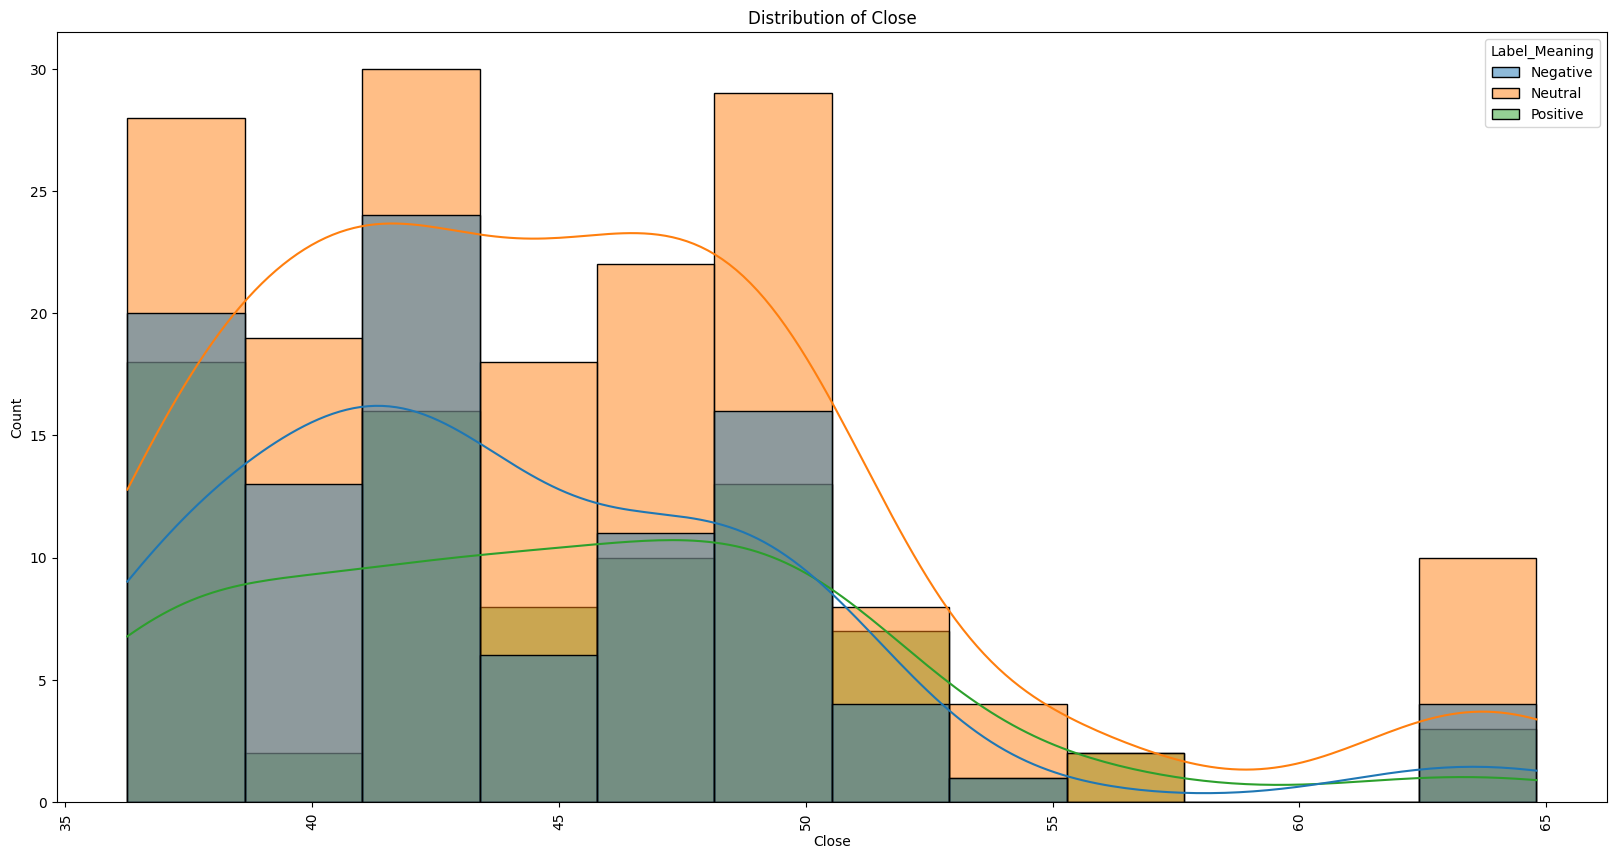

In [48]:
# Use a larger graph with a huge width to involve all the dates.
plt.figure(figsize = (20, 10))

# Draw the histplot for the column Close
sns.histplot(data = stock_news, x = "Close", hue = "Label_Meaning", kde = True)

# Set the title
plt.title("Distribution of Close")

# Tilt the values of x axis to 90 degrees
plt.xticks(rotation = 90)

# Display the histplot
plt.show()

**Observations:**
- The distribution is not a normal distribution.
- All the three sentiments are spread across various values of Close.
- We do not see any specific grouping for different values of Labels across the values for Close.
- We do not see any specific pattern.

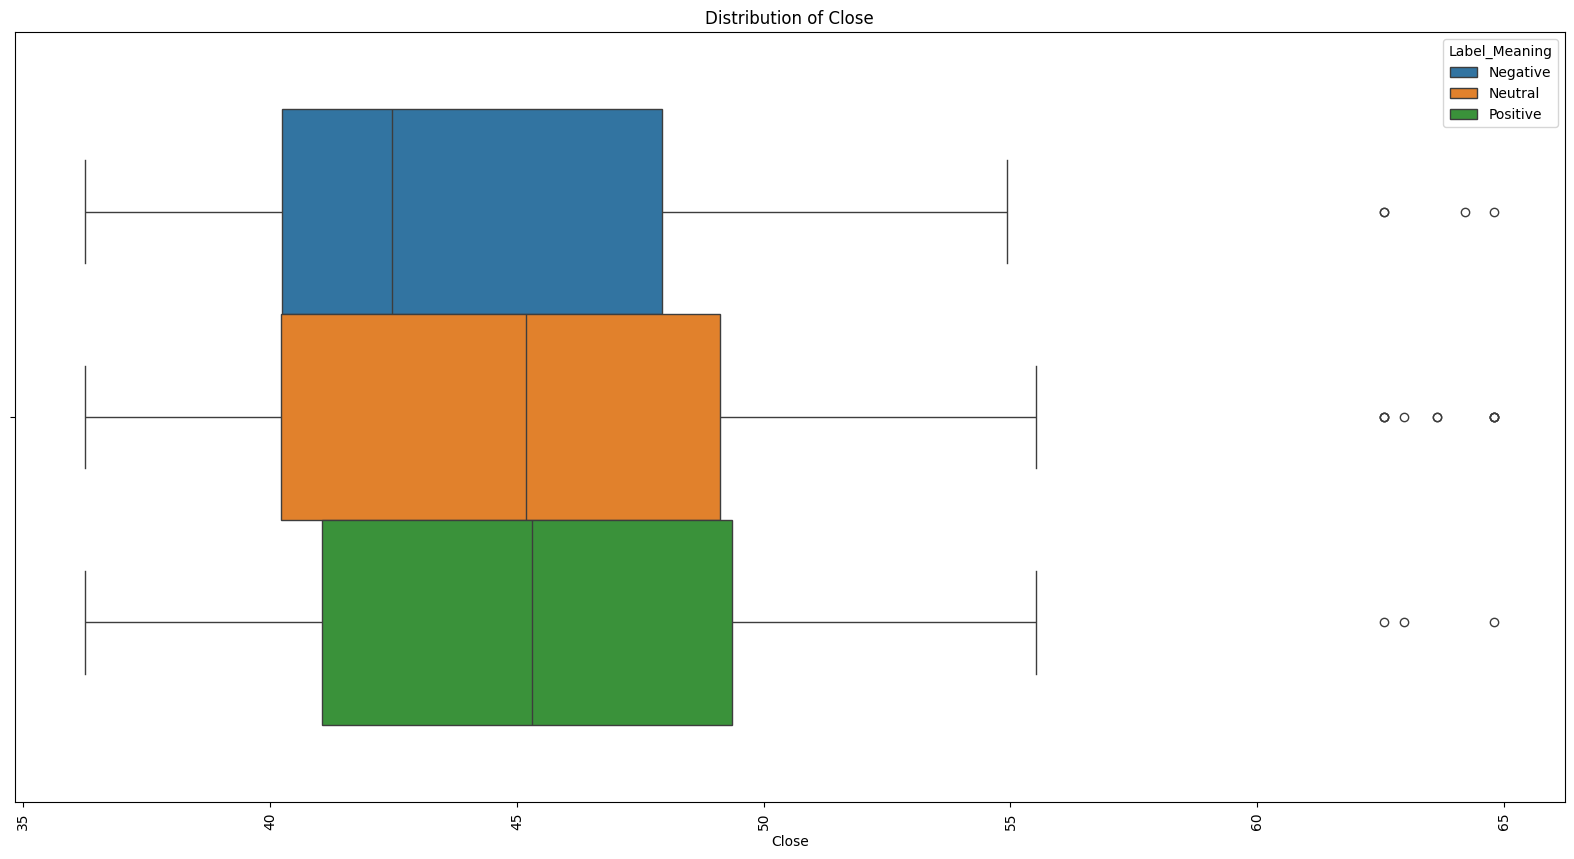

In [49]:
# Use a larger graph with a huge width to involve all the dates.
plt.figure(figsize = (20, 10))

# Draw the boxplot for the column Close
sns.boxplot(data = stock_news, x = "Close", hue = "Label_Meaning")

# Set the title
plt.title("Distribution of Close")

# Tilt the values of x axis to 90 degrees
plt.xticks(rotation = 90)

# Display the boxplot
plt.show()

**Observations:**
- There are a few outliers at the higher side of the value.

#### Volume

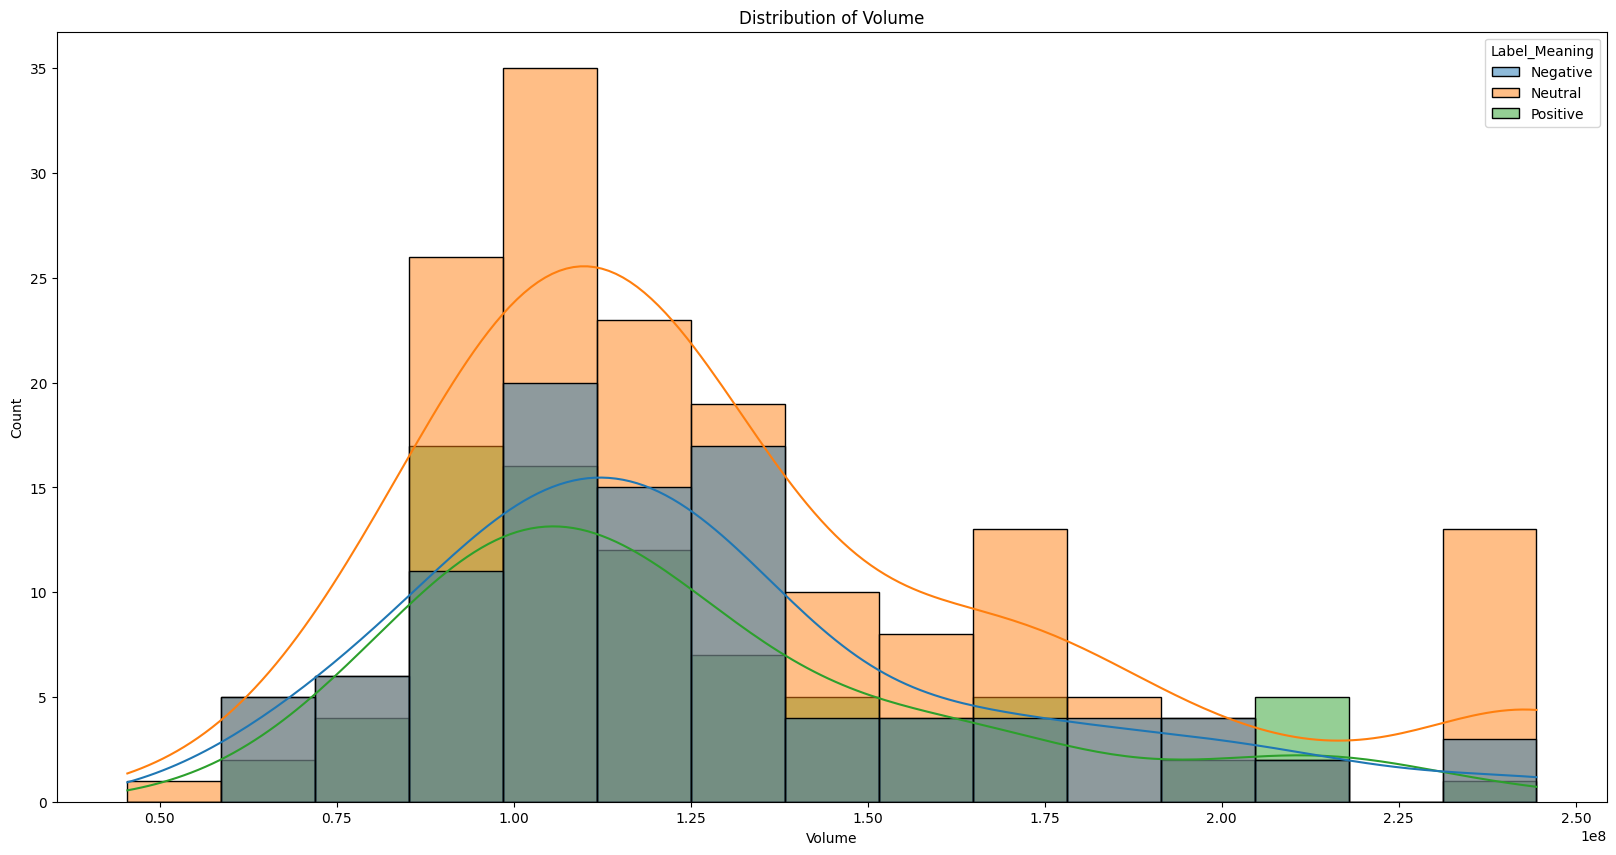

In [50]:
# Use a larger graph with a huge width to involve all the dates.
plt.figure(figsize = (20, 10))

# Draw the histplot for the volume column
sns.histplot(data = stock_news, x = "Volume", hue = "Label_Meaning", kde = True)

# Set the title
plt.title("Distribution of Volume")

# Display the histplot
plt.show()

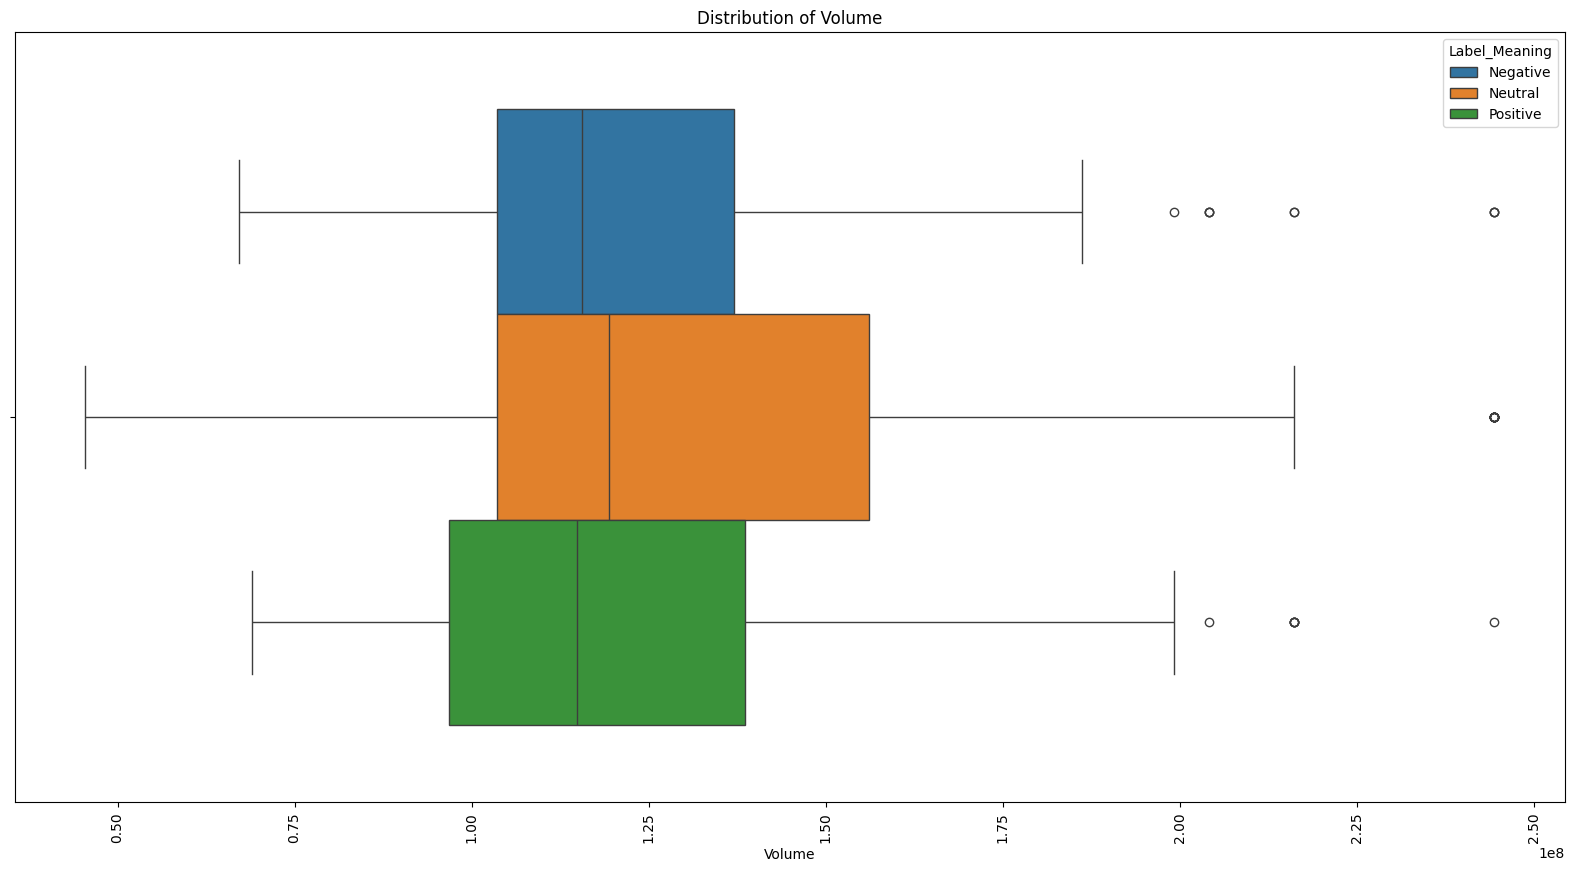

In [51]:
# Use a larger graph with a huge width to involve all the dates.
plt.figure(figsize = (20, 10))

# Draw the boxplot for the volumne column
sns.boxplot(data = stock_news, x = "Volume", hue = "Label_Meaning")

# Set the title
plt.title("Distribution of Volume")

# Tilt the x axis to 90 degrees
plt.xticks(rotation = 90)

# Display the boxplot
plt.show()

**Observations:**
- There is one outlier towards the righer value of volumne.
- The boxplot also show a right skewness.

#### News

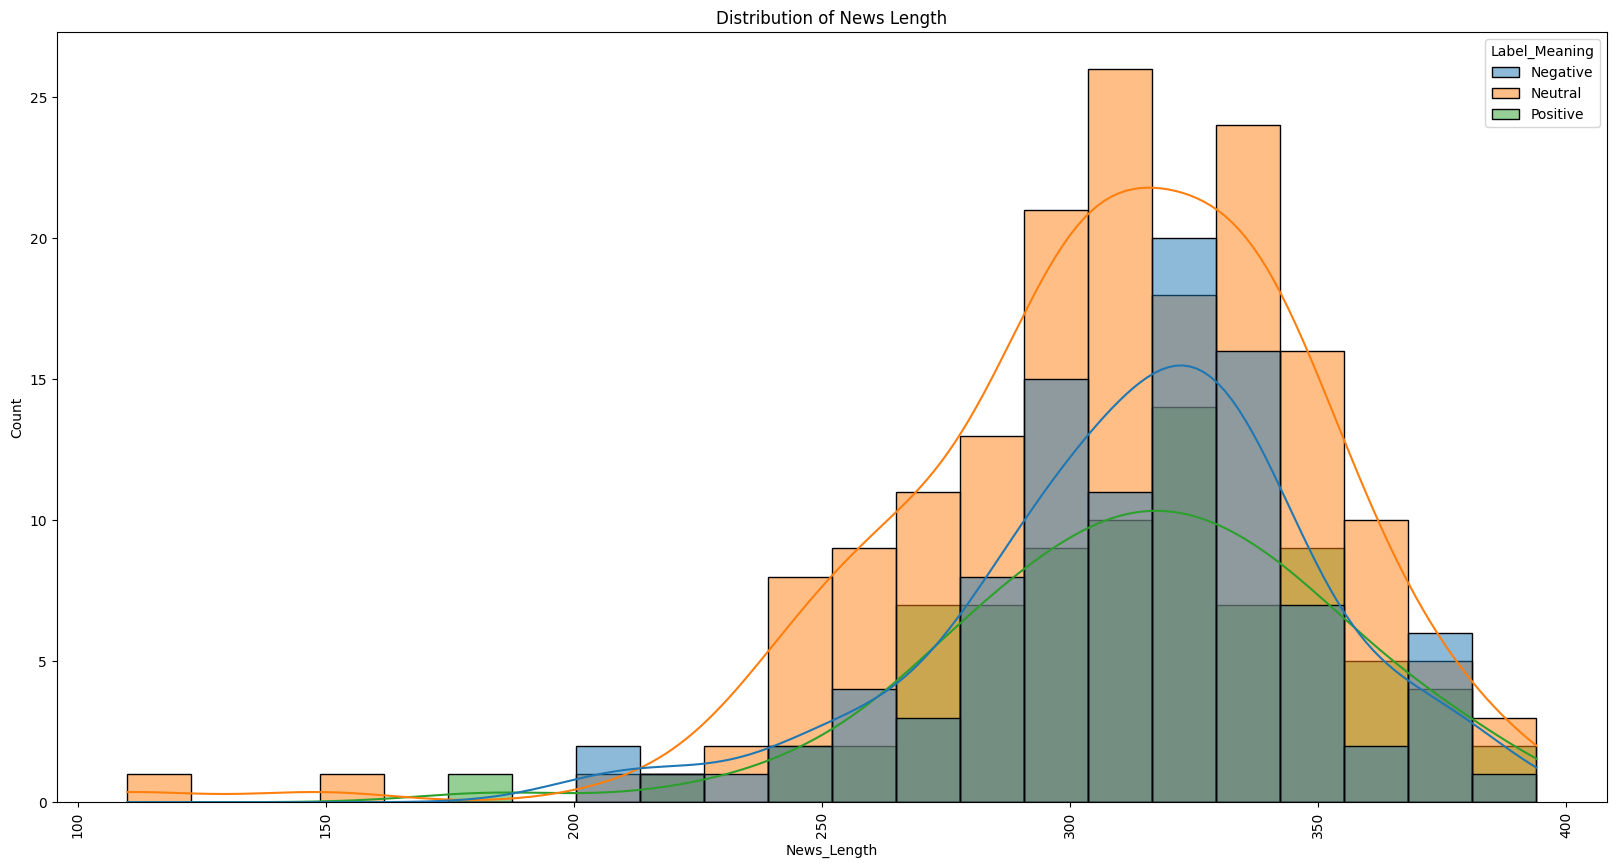

In [52]:
# Get the number of characters in the News column and show the distribution of the length of the sentiment
stock_news["News_Length"] = stock_news["News"].apply(lambda x: len(x))

# Use a larger graph with a huge width to involve all the dates.
plt.figure(figsize = (20, 10))

# show the new column News_Length in te distplot
sns.histplot(data = stock_news, x = "News_Length", hue = "Label_Meaning", kde = True)

# Set the title
plt.title("Distribution of News Length")

# Tilt the values of x axis to 90 degrees
plt.xticks(rotation = 90)

# Display the plot
plt.show()

**Observations:**
- The distribution follows a normal curve with left skew.
- This means We have significant sentiments expressed in a fewer characters than the descriptive sentiments.

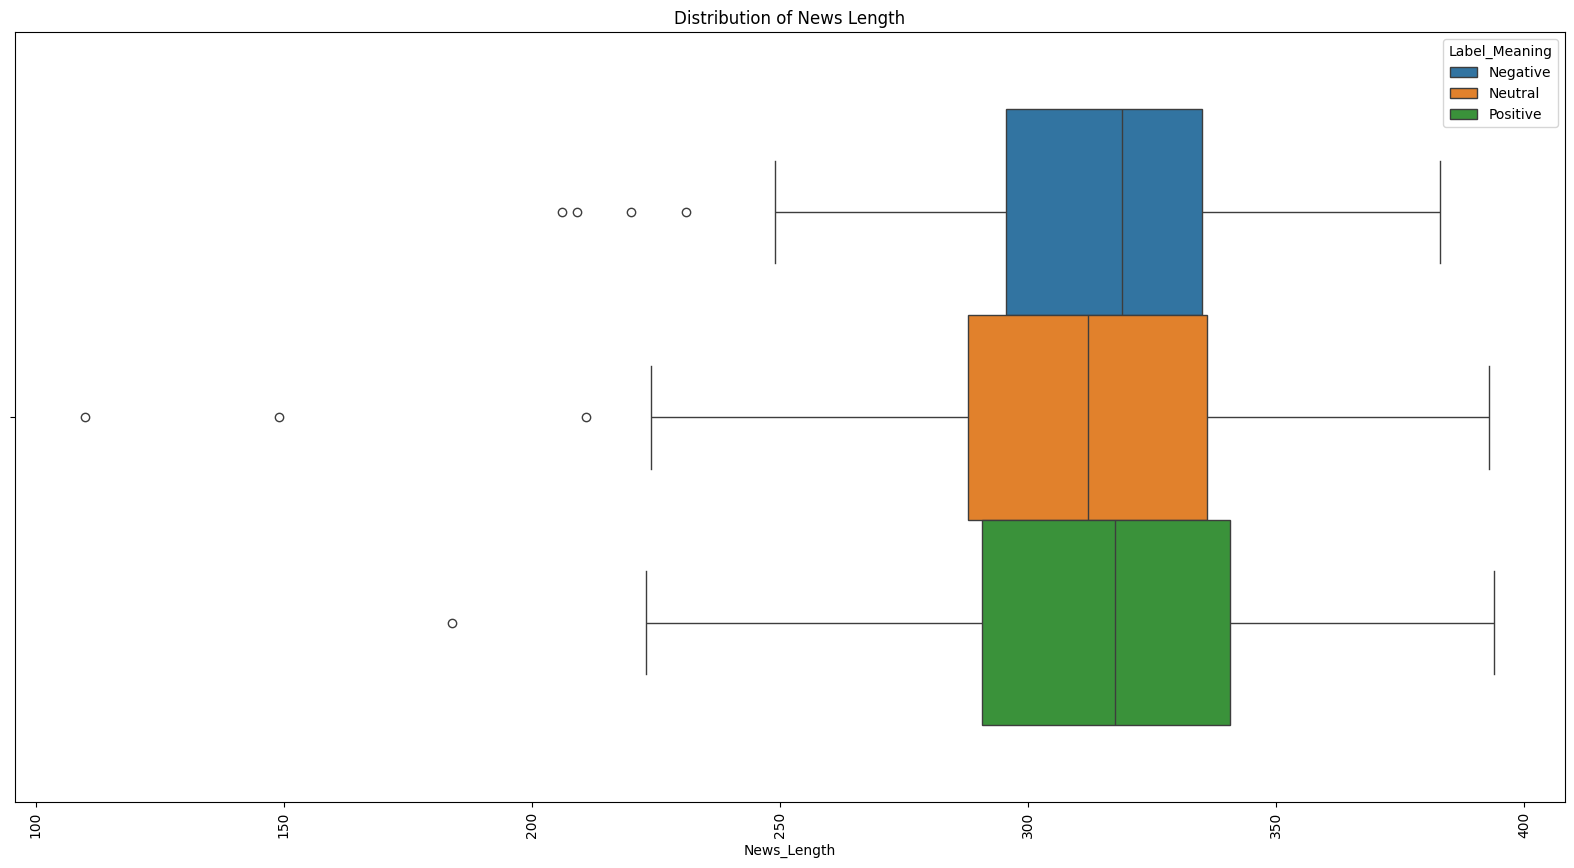

In [53]:
# Use a larger graph with a huge width to involve all the dates.
plt.figure(figsize = (20, 10))

# Draw the boxplot for the above column News_lenght
sns.boxplot(data = stock_news, x = "News_Length", hue = "Label_Meaning")

# Set the title
plt.title("Distribution of News Length")

# Tilt the values of x axis to 90 degrees
plt.xticks(rotation = 90)

# Display the boxplot
plt.show()

**Observations:**
- There are a few sentiments that are expressed in a fewer words than the average.

#### Open, Close, High and Low distribution

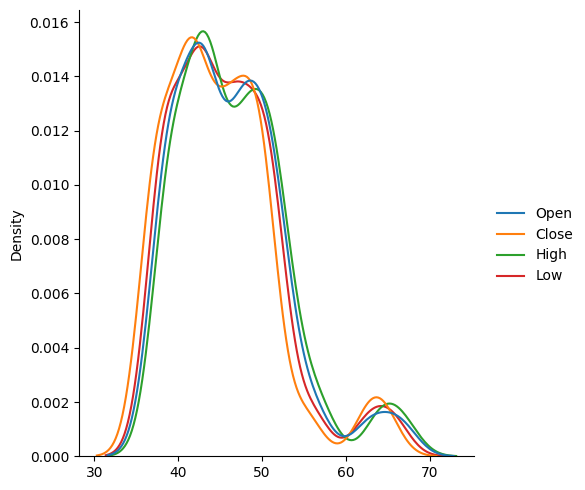

In [54]:
# Use all the above columns Open, Close, High and Low and plot the distribution plot
sns.displot(data = stock_news[['Open','Close','High','Low']], kind = "kde")

# Display the plot
plt.show()

**Observations:**
- All the values show same distribution patterns.

#### Date

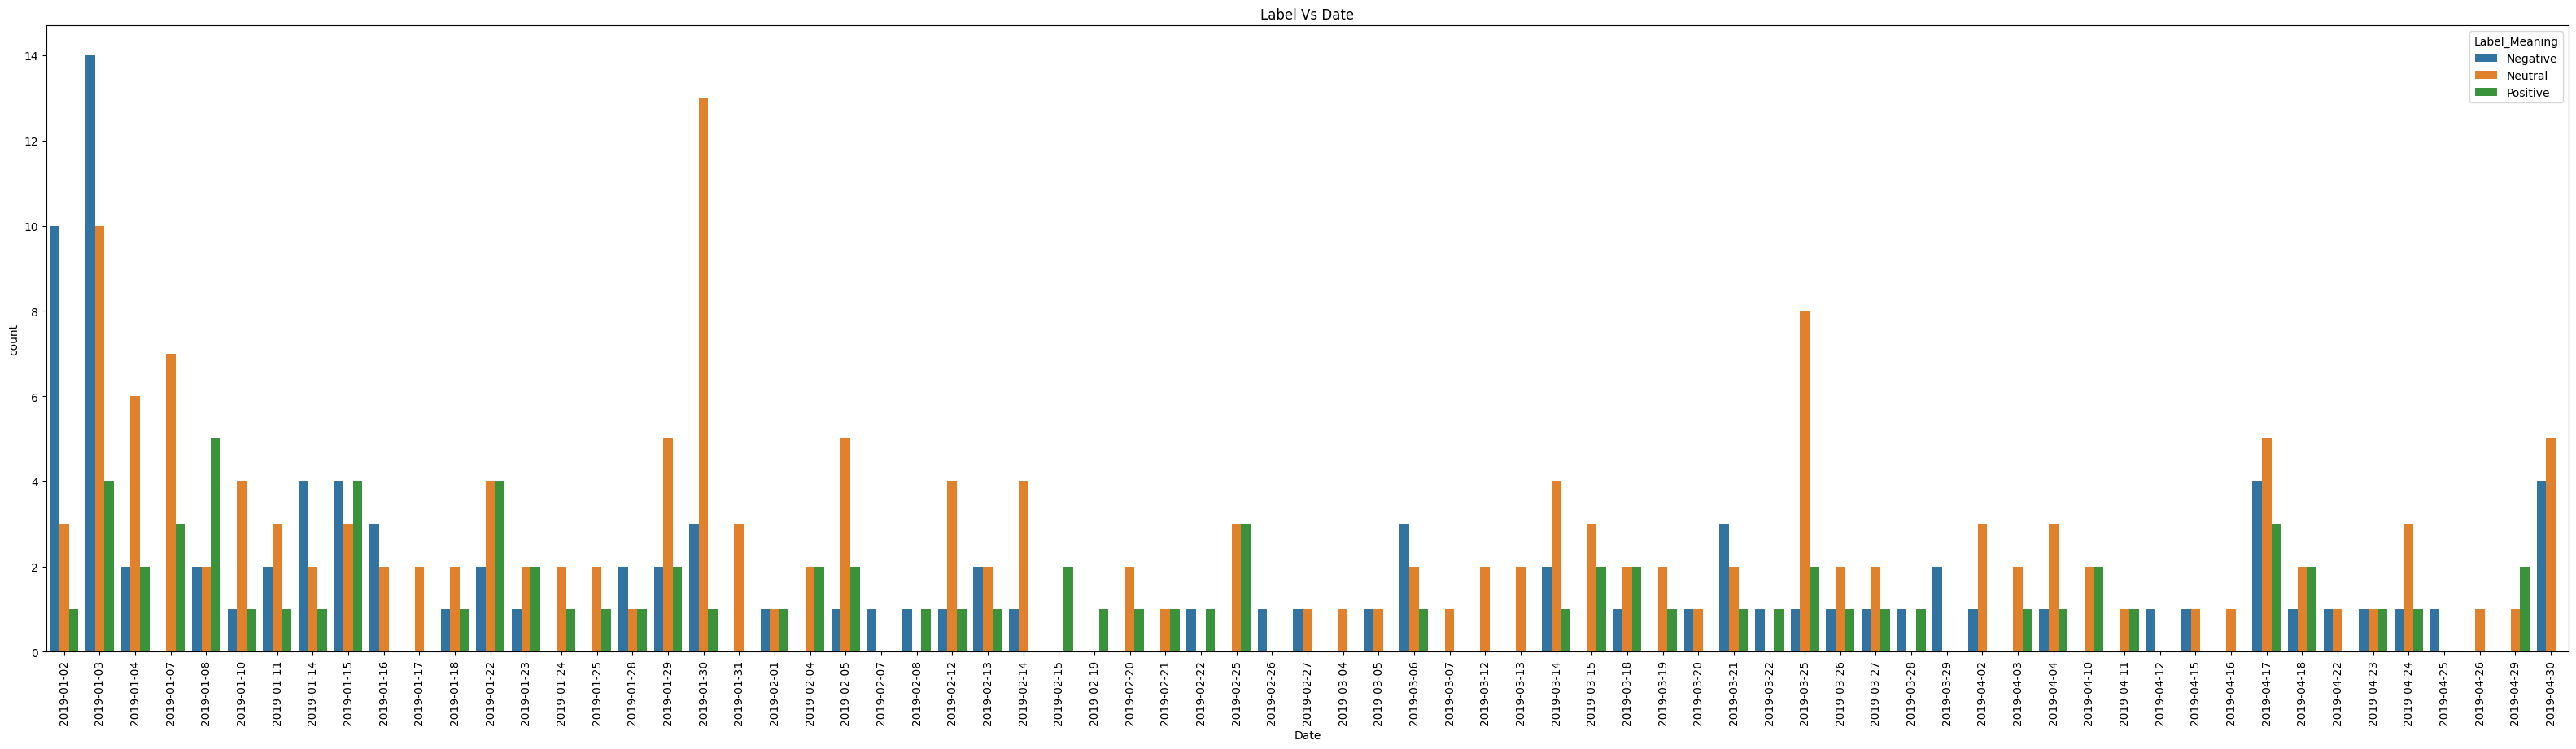

In [55]:
# Use a larger graph with a huge width to involve all the dates.
plt.figure(figsize = (40, 10))

# Use the Data in x axis and count of each Label in Y axis with the same column as hue
sns.countplot(data = stock_news, x = "Date", hue = "Label_Meaning")

# Set the title
plt.title("Label Vs Date")

# Tilt the x values to 90 degress for better visibility
plt.xticks(rotation = 90)

# Display the plot
plt.show()

**Observations:**
- All entries in the dataset are from the year 2019.
- The entries are concentrated in the first four months of the year, with a significant number of entries from January and February.
- The entries are spread throughout the days of the month, with a relatively even distribution.
- We see a mixture of all types of emotions on almost all days.
- We a huge neutral and negative sentiments on a few days.

### Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

#### Open Vs Date

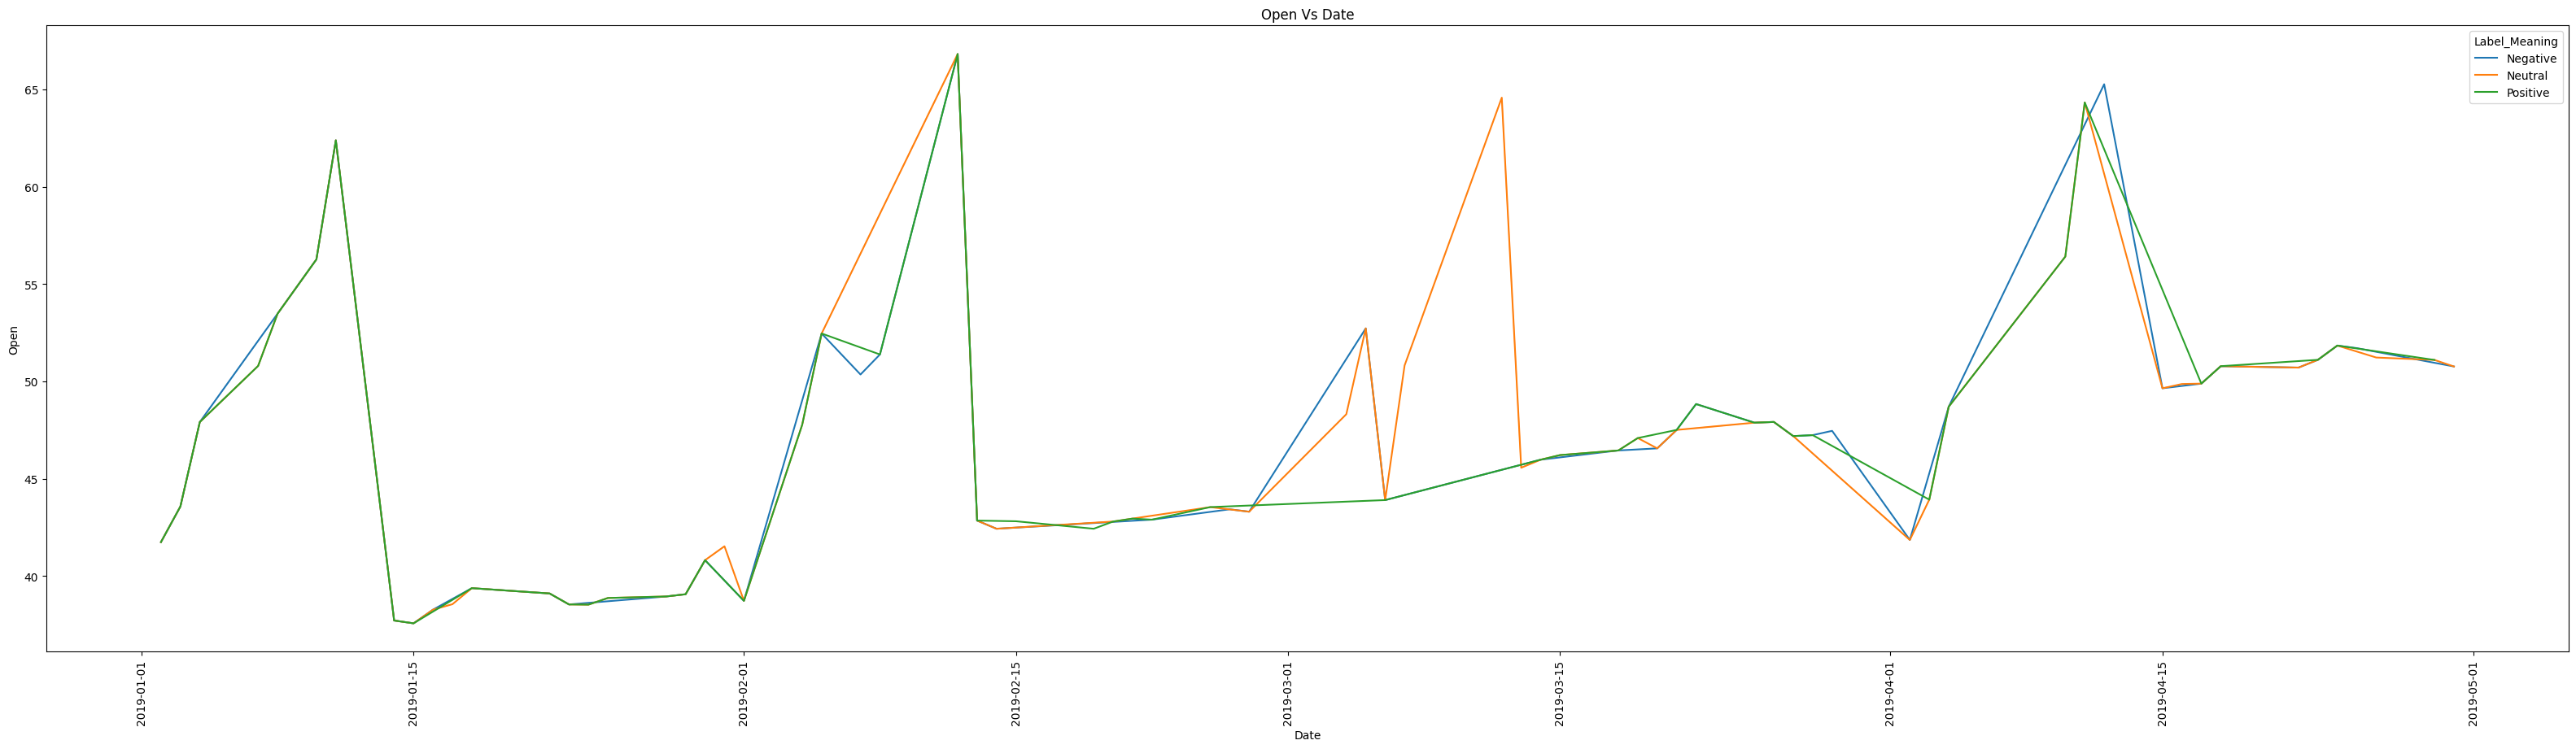

In [56]:
# Use a larger graph with a huge width to involve all the dates.
plt.figure(figsize = (40, 10))

# Draw a lineplot for Open vs Date values
sns.lineplot(data = stock_news, x = "Date", y = "Open", hue = "Label_Meaning")

# Set the title
plt.title("Open Vs Date")

# Tilt the x values to 90 degress for better visibility
plt.xticks(rotation = 90)

# Display the plot
plt.show()

**Observations:**
- The variations in the values for Open appear realistic.
- We do not make out any specific pattern in the values of Open with respect to date.
- However all the three lines representing different sentiments move togehter without much variations.

#### High Vs Date

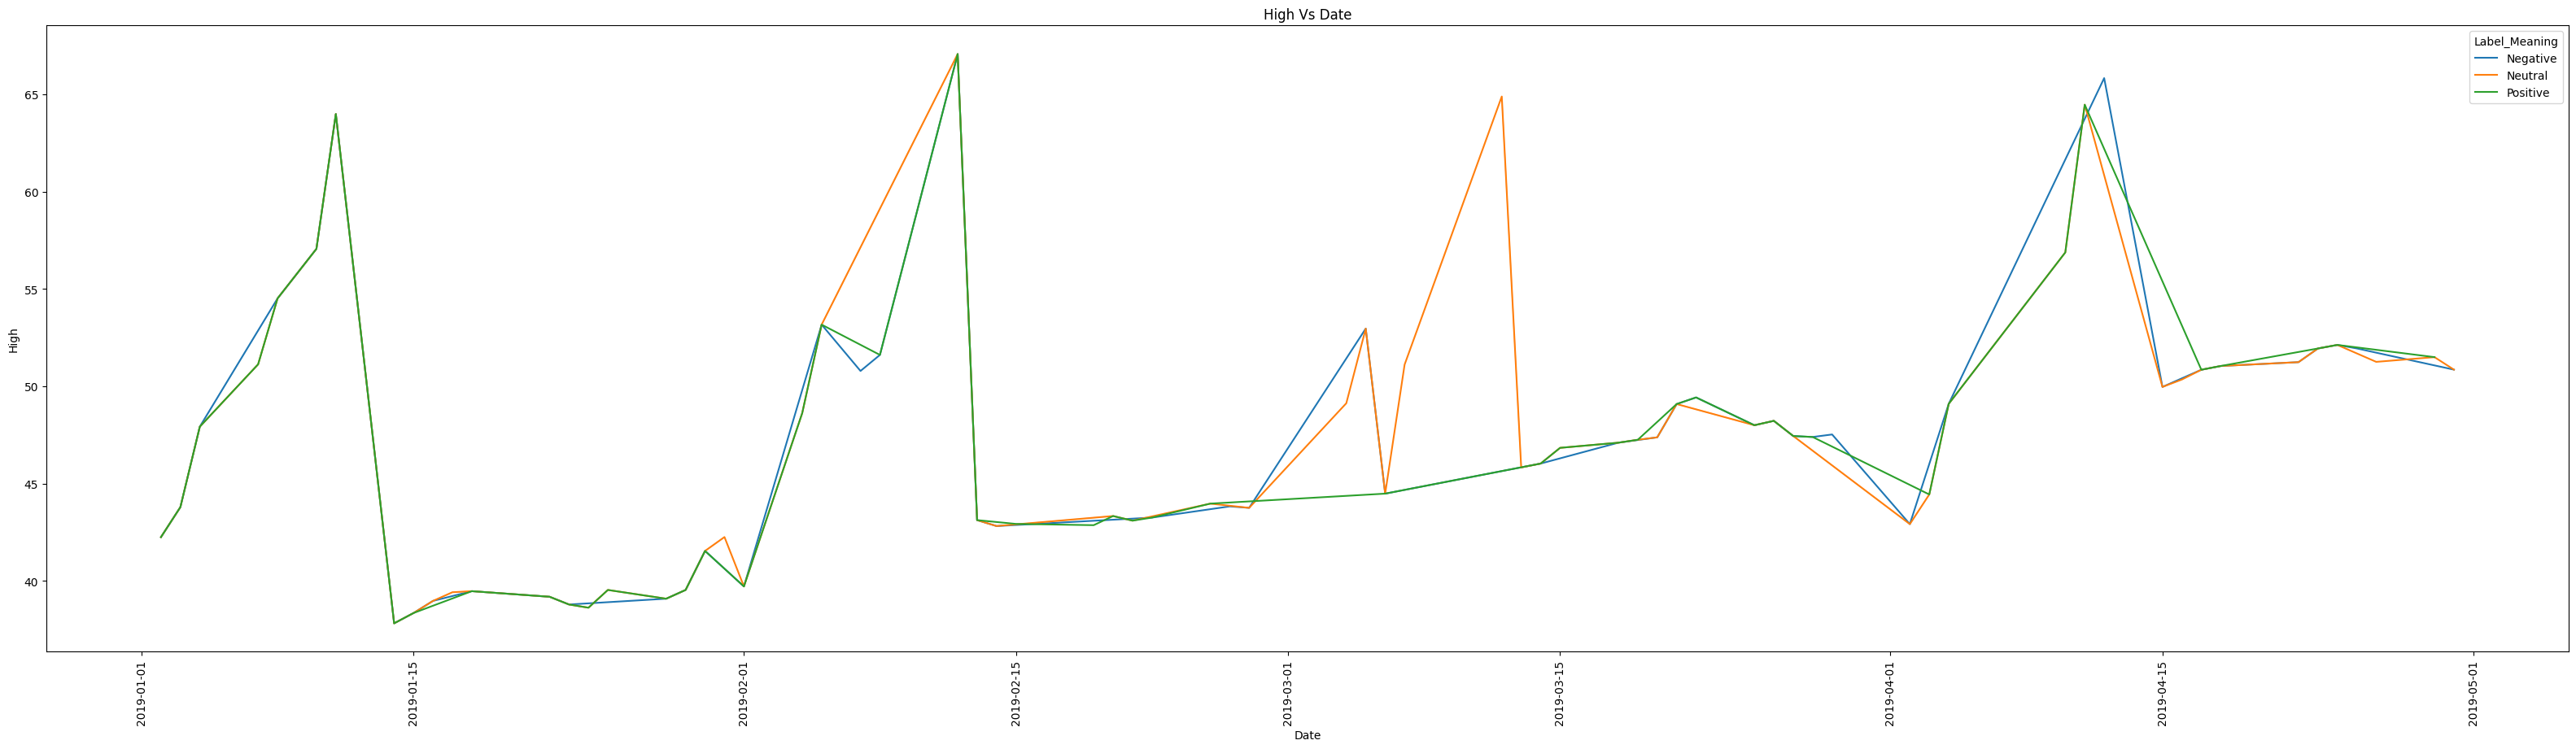

In [57]:
# Use a larger graph with a huge width to involve all the dates.
plt.figure(figsize = (40, 10))

# Draw a lineplot for High vs Date values
sns.lineplot(data = stock_news, x = "Date", y = "High", hue = "Label_Meaning")

# Set the title
plt.title("High Vs Date")

# Tilt the x values to 90 degress for better visibility
plt.xticks(rotation = 90)

# Display the plot
plt.show()

**Observations:**
- The variations in the values for High appear realistic.
- We do not make out any specific pattern in the values of Open with respect to date.
- However all the three lines representing different sentiments move togehter without much variations.

#### Low Vs Date

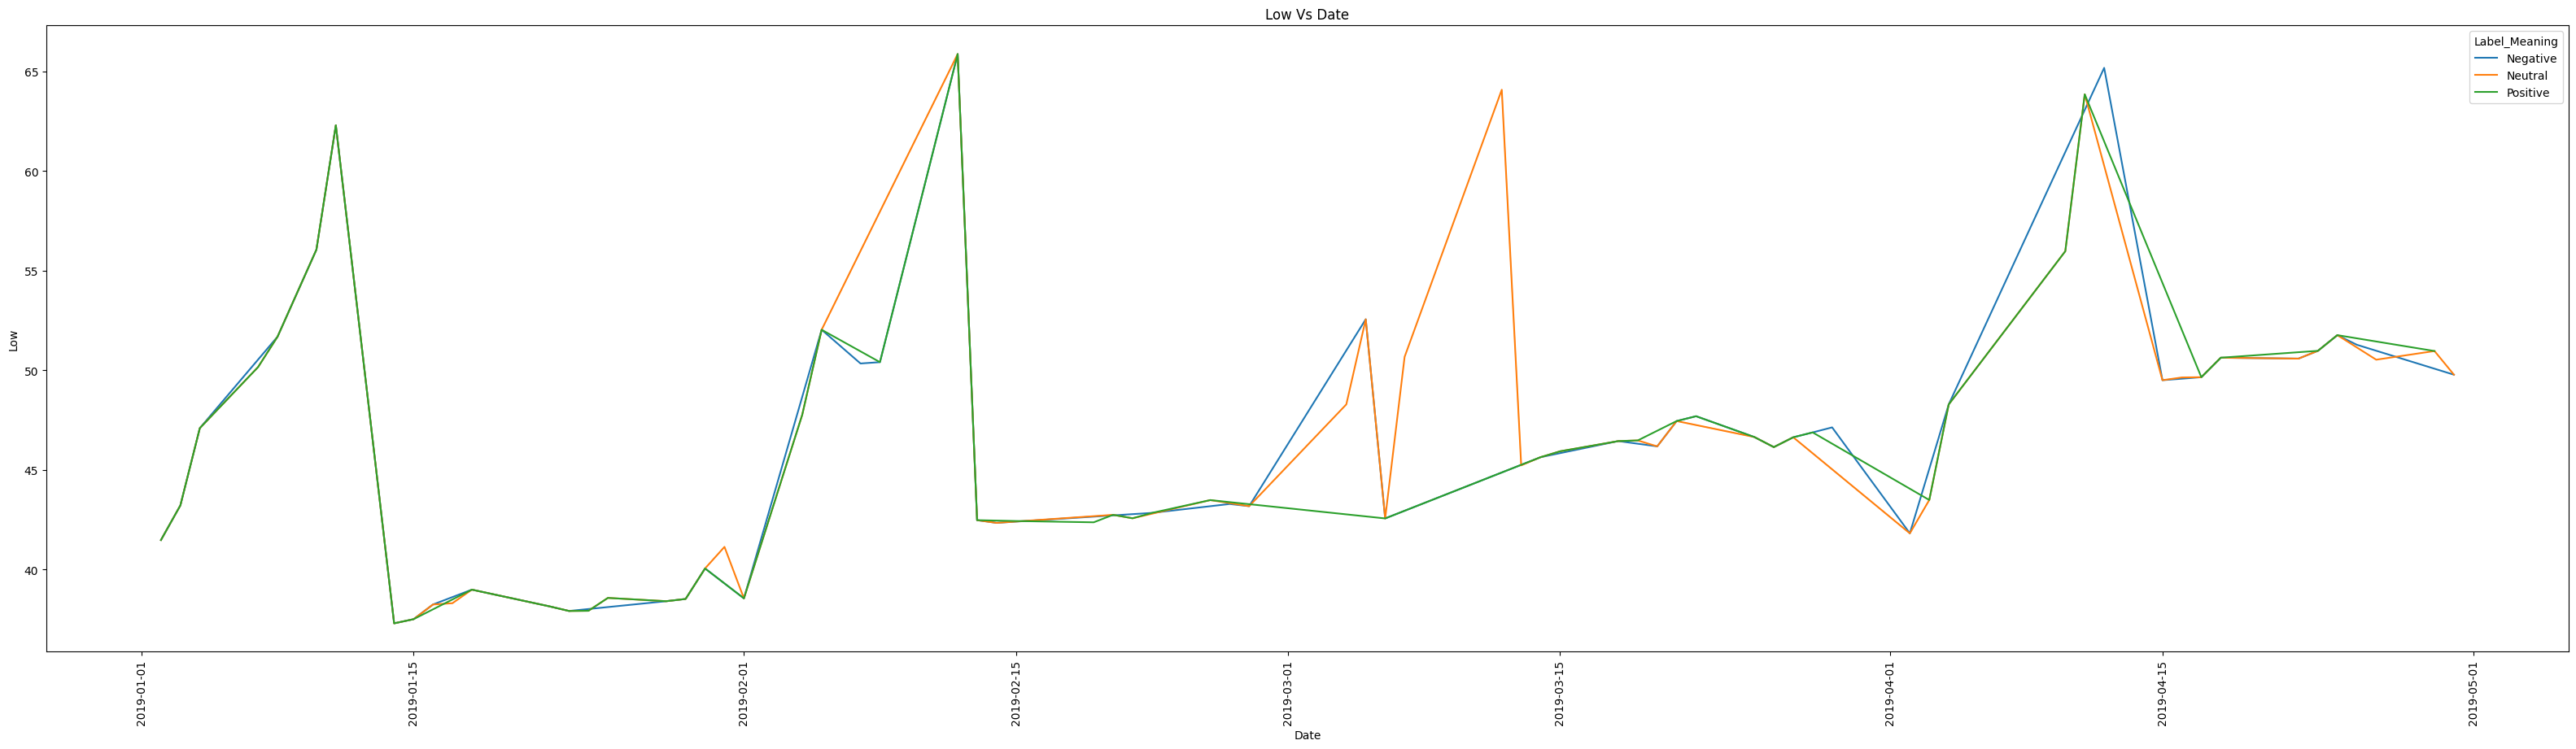

In [58]:
# Use a larger graph with a huge width to involve all the dates.
plt.figure(figsize = (40, 10))

# Draw a lineplot for Low vs Date values
sns.lineplot(data = stock_news, x = "Date", y = "Low", hue = "Label_Meaning")

# Set the title
plt.title("Low Vs Date")

# Tilt the x values to 90 degress for better visibility
plt.xticks(rotation = 90)

# Display the plot
plt.show()

**Observations:**
- The variations in the values for Low appear realistic.
- We do not make out any specific pattern in the values of Open with respect to date.
- However all the three lines representing different sentiments move togehter without much variations.

#### Close Vs Date

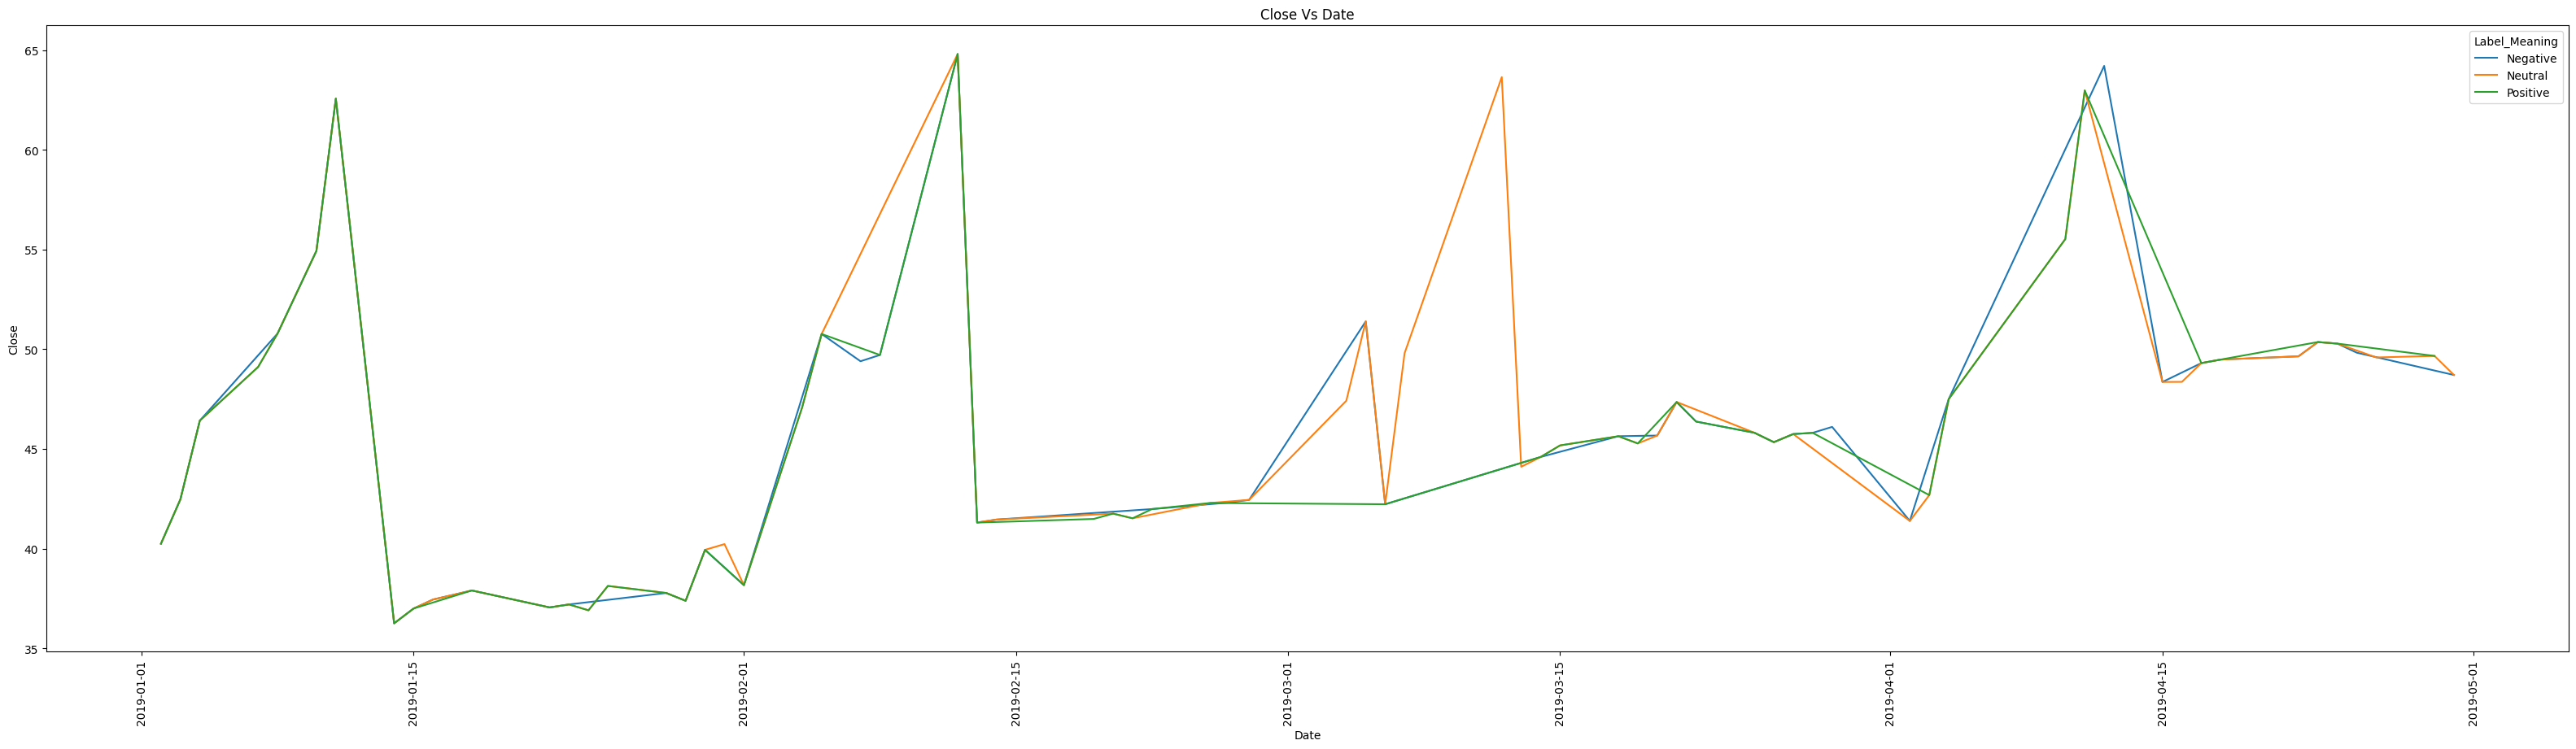

In [59]:
# Use a larger graph with a huge width to involve all the dates.
plt.figure(figsize = (40, 10))

# Draw a lineplot for Close vs Date values
sns.lineplot(data = stock_news, x = "Date", y = "Close", hue = "Label_Meaning")

# Set the title
plt.title("Close Vs Date")

# Tilt the x values to 90 degress for better visibility
plt.xticks(rotation = 90)

# Display the plot
plt.show()

**Observations:**
- The variations in the values for Close appear realistic.
- We do not make out any specific pattern in the values of Open with respect to date.
- However all the three lines representing different sentiments move togehter without much variations.

#### Volume Vs Date

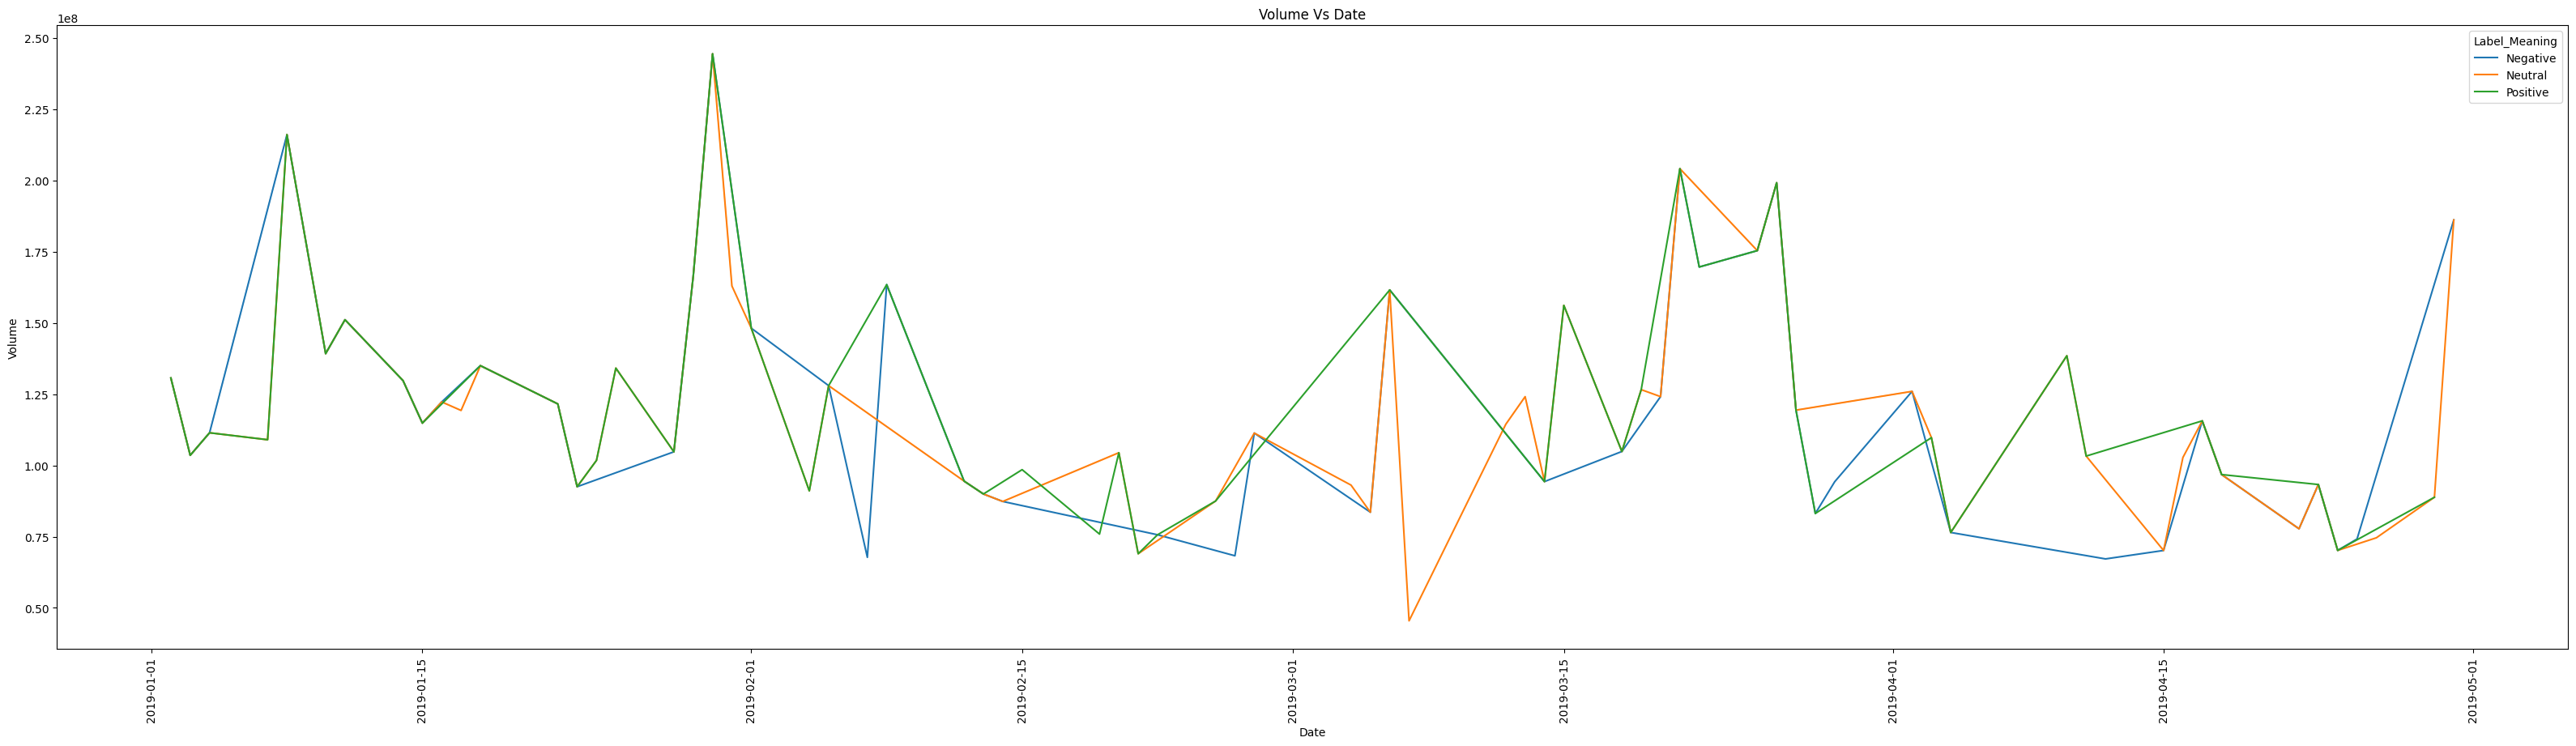

In [60]:
# Use a larger graph with a huge width to involve all the dates.
plt.figure(figsize = (40, 10))

# Draw a lineplot for Volumne vs Date values
sns.lineplot(data = stock_news, x = "Date", y = "Volume", hue = "Label_Meaning")

# Set the title
plt.title("Volume Vs Date")

# Tilt the x values to 90 degress for better visibility
plt.xticks(rotation = 90)

# Display the plot
plt.show()

**Observations:**
- The Volume increases or decreases on a daily basis.
- A few days have recorded the highest volume and a few days have recorded the lowest.
- We do not make out any specific pattern in the values of Open with respect to date.
- However all the three lines representing different sentiments move togehter without much variations.

#### High Vs Open

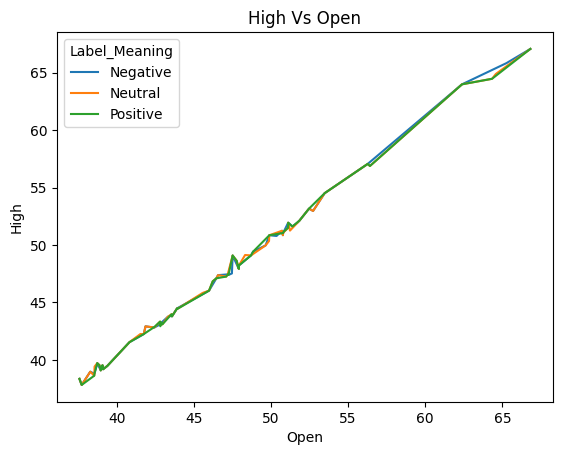

In [61]:
# Draw a lineplot for Open vs High values
sns.lineplot(data = stock_news, x = "Open", y = "High", hue = "Label_Meaning")

# Set the title
plt.title("High Vs Open")

# Display the plot
plt.show()

**Observations:**
- Both High and Open values grow together and show direct positive correlation.

#### Low Vs Open

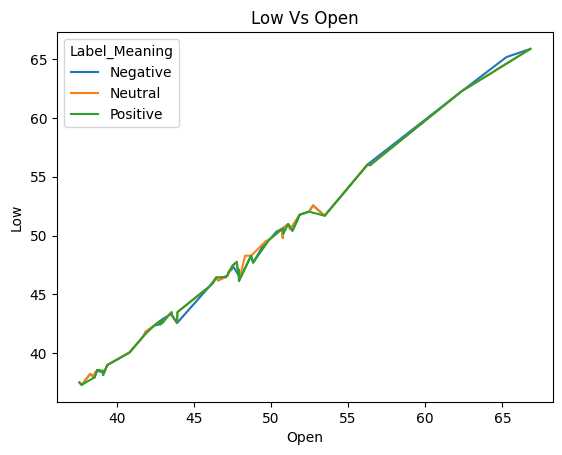

In [62]:
# Draw a lineplot for Open vs Low values
sns.lineplot(data = stock_news, x = "Open", y = "Low", hue = "Label_Meaning")

# Set the title
plt.title("Low Vs Open")

# Display the plot
plt.show()

**Observations:**
- Both Low and Open values grow together and show direct positive correlation.

#### Close Vs Open

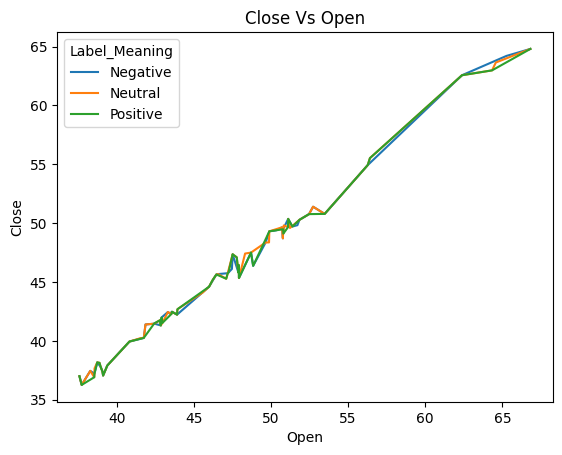

In [63]:
# Draw a lineplot for Close vs Open values
sns.lineplot(data = stock_news, x = "Open", y = "Close", hue = "Label_Meaning")

# Set the title
plt.title("Close Vs Open")

# Display the plot
plt.show()

**Observations:**
- Both Close and Open values grow together and show direct positive correlation.

#### Volume Vs Open

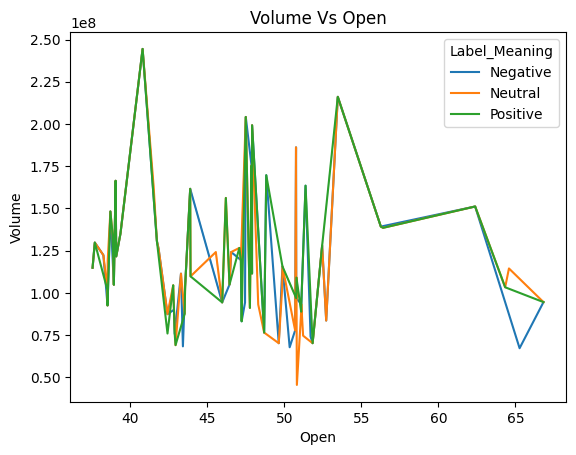

In [64]:
# Draw a lineplot for Open vs Volume values
sns.lineplot(data = stock_news, x = "Open", y = "Volume", hue = "Label_Meaning")

# Set the title
plt.title("Volume Vs Open")

# Display the plot
plt.show()

**Observations:**
- We do not see any correlation between Volume and Open.

#### News Vs Open

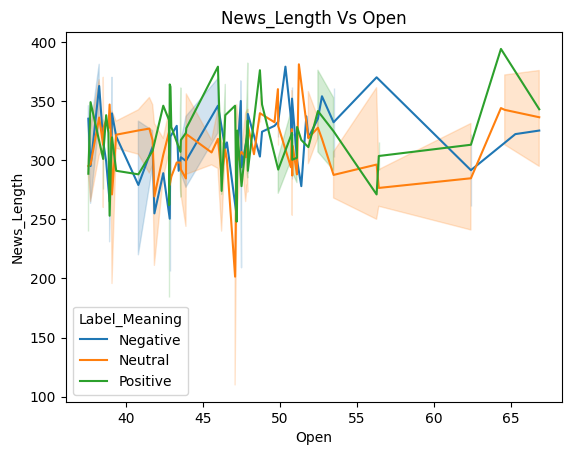

In [65]:
# Draw a lineplot for High vs News_Length values
sns.lineplot(data = stock_news, x = "Open", y = "News_Length", hue = "Label_Meaning")

# Set the title
plt.title("News_Length Vs Open")

# Display the plot
plt.show()

**Observations:**
- We do not see any correlation between News and Open.

#### Low Vs High

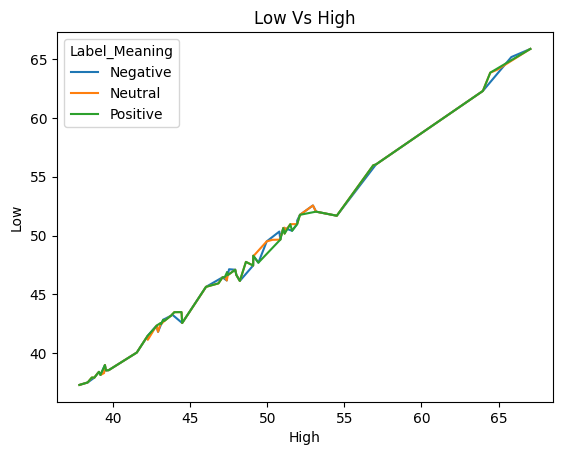

In [66]:
# Draw a lineplot for Low vs High values
sns.lineplot(data = stock_news, x = "High", y = "Low", hue = "Label_Meaning")

# Set the title
plt.title("Low Vs High")

# Display the plot
plt.show()

**Observations:**
- Both Low and High values grow together and show direct positive correlation.

#### Close Vs High

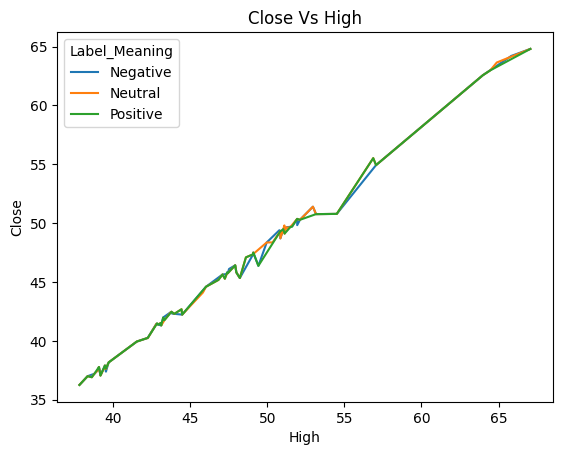

In [67]:
# Draw a lineplot for Close vs High values
sns.lineplot(data = stock_news, x = "High", y = "Close", hue = "Label_Meaning")

# Set the title
plt.title("Close Vs High")

# Display the plot
plt.show()

**Observations:**
- Both Close and High values grow together and show direct positive correlation.

#### Volume Vs High

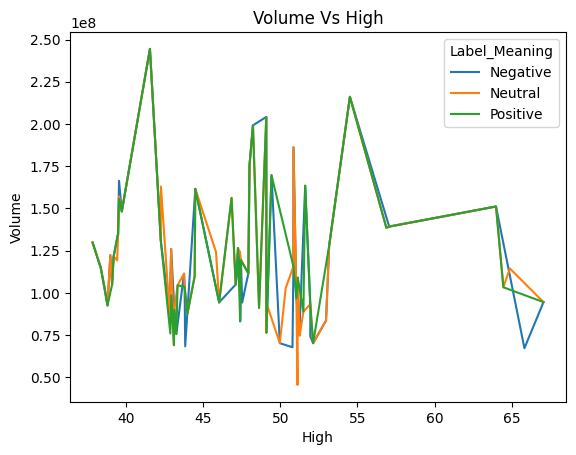

In [68]:
# Draw a lineplot for Volume vs High values
sns.lineplot(data = stock_news, x = "High", y = "Volume", hue = "Label_Meaning")

# Set the title
plt.title("Volume Vs High")

# Display the plot
plt.show()

**Observations:**
- The Volume and High values are not correlated and we do not see any pattern.

#### News Vs High

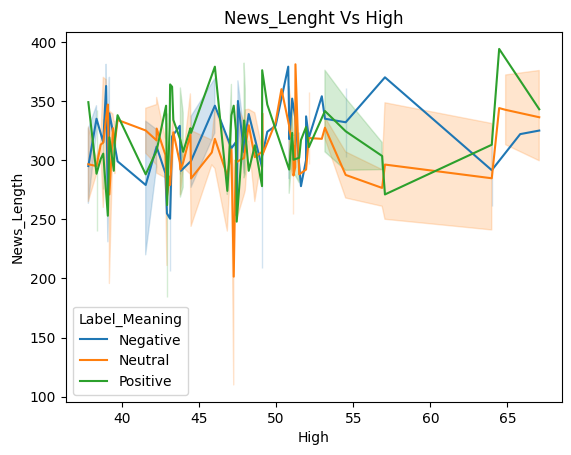

In [69]:
# Draw a lineplot for News_Length vs High values
sns.lineplot(data = stock_news, x = "High", y = "News_Length", hue = "Label_Meaning")

# Set the title
plt.title("News_Lenght Vs High")

# Display the plot
plt.show()

**Observations:**
- There is no correlation between length of the statements with the High value.

#### Close Vs Low

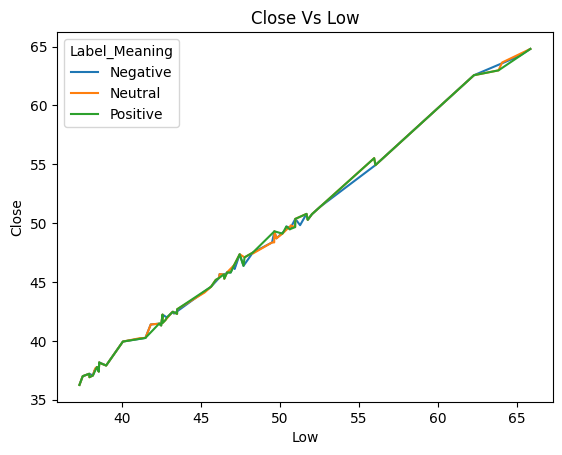

In [70]:
# Draw a lineplot for Close vs Low values
sns.lineplot(data = stock_news, x = "Low", y = "Close", hue = "Label_Meaning")

# Set the title
plt.title("Close Vs Low")

# Display the plot
plt.show()

**Observations:**
- Both Low and Close values grow together and show direct positive correlation.

#### Volume Vs Low

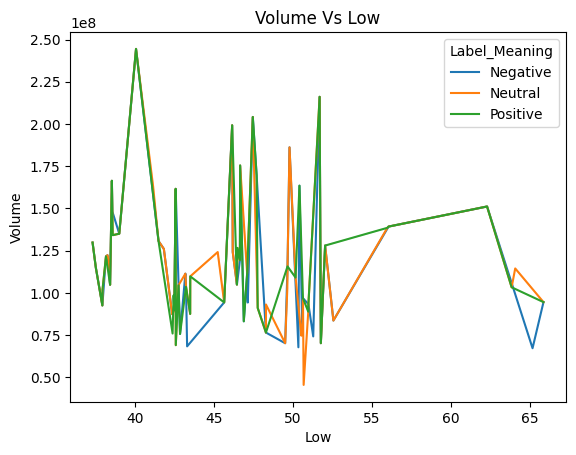

In [71]:
# Draw a lineplot for Volume Vs Low values
sns.lineplot(data = stock_news, x = "Low", y = "Volume", hue = "Label_Meaning")

# Set the title
plt.title("Volume Vs Low")

# Display the plot
plt.show()

**Observations:**
- There is no correlation between Volume and Low values.

#### News Vs Low

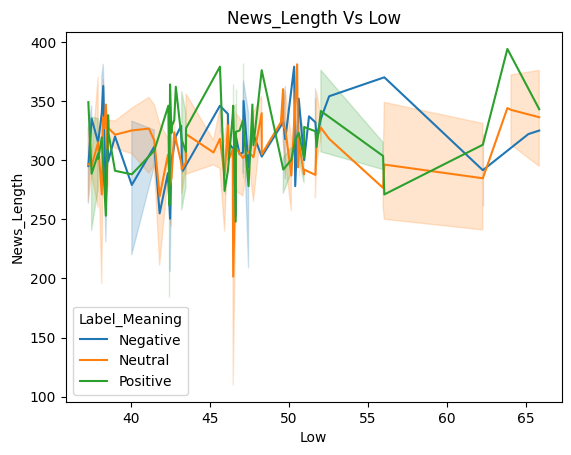

In [72]:
# Draw a lineplot for News_Length vs Low values
sns.lineplot(data = stock_news, x = "Low", y = "News_Length", hue = "Label_Meaning")

# Set the title
plt.title("News_Length Vs Low")

# Display the plot
plt.show()

**Observations:**
- There is no correlation between length of the statements with the Low value.

#### Volume Vs Close

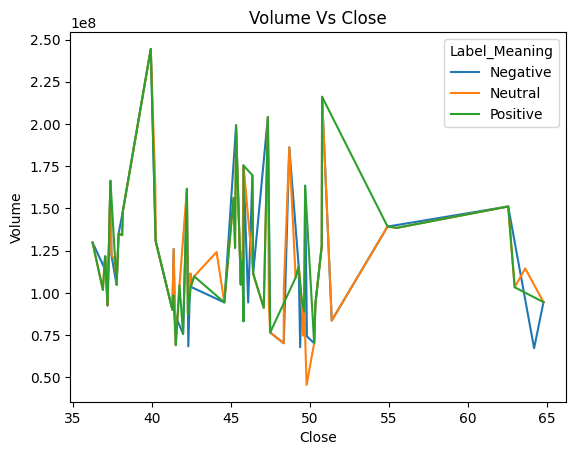

In [73]:
# Draw a lineplot for Volume vs Close values
sns.lineplot(data = stock_news, x = "Close", y = "Volume", hue = "Label_Meaning")

# Set the title
plt.title("Volume Vs Close")

# Display the plot
plt.show()

**Observations:**
- There is no correlation between Volume and Close values.

#### News Vs Close

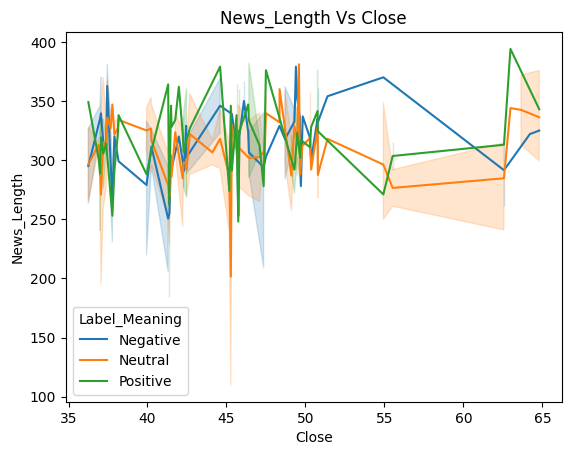

In [74]:
# Draw a lineplot for News_Lenght vs Close values
sns.lineplot(data = stock_news, x = "Close", y = "News_Length", hue = "Label_Meaning")

# Set the title
plt.title("News_Length Vs Close")

# Display the plot
plt.show()

**Observations:**
- There is no correlation between length of the statements with the Close value.

#### News Vs Volume

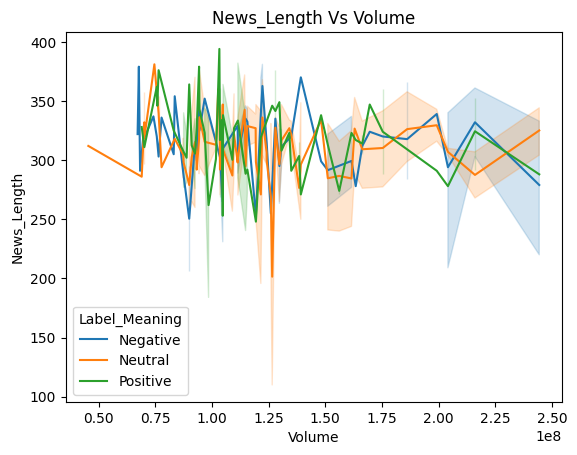

In [75]:
# Draw a lineplot for News_Length vs Volume values
sns.lineplot(data = stock_news, x = "Volume", y = "News_Length", hue = "Label_Meaning")

# Set the title
plt.title("News_Length Vs Volume")

# Display the plot
plt.show()

**Observations:**
- There is no correlation between length of the statements with the Volume value.

#### Open Vs High Vs Low Vs Close Vs Volume Vs News_Length

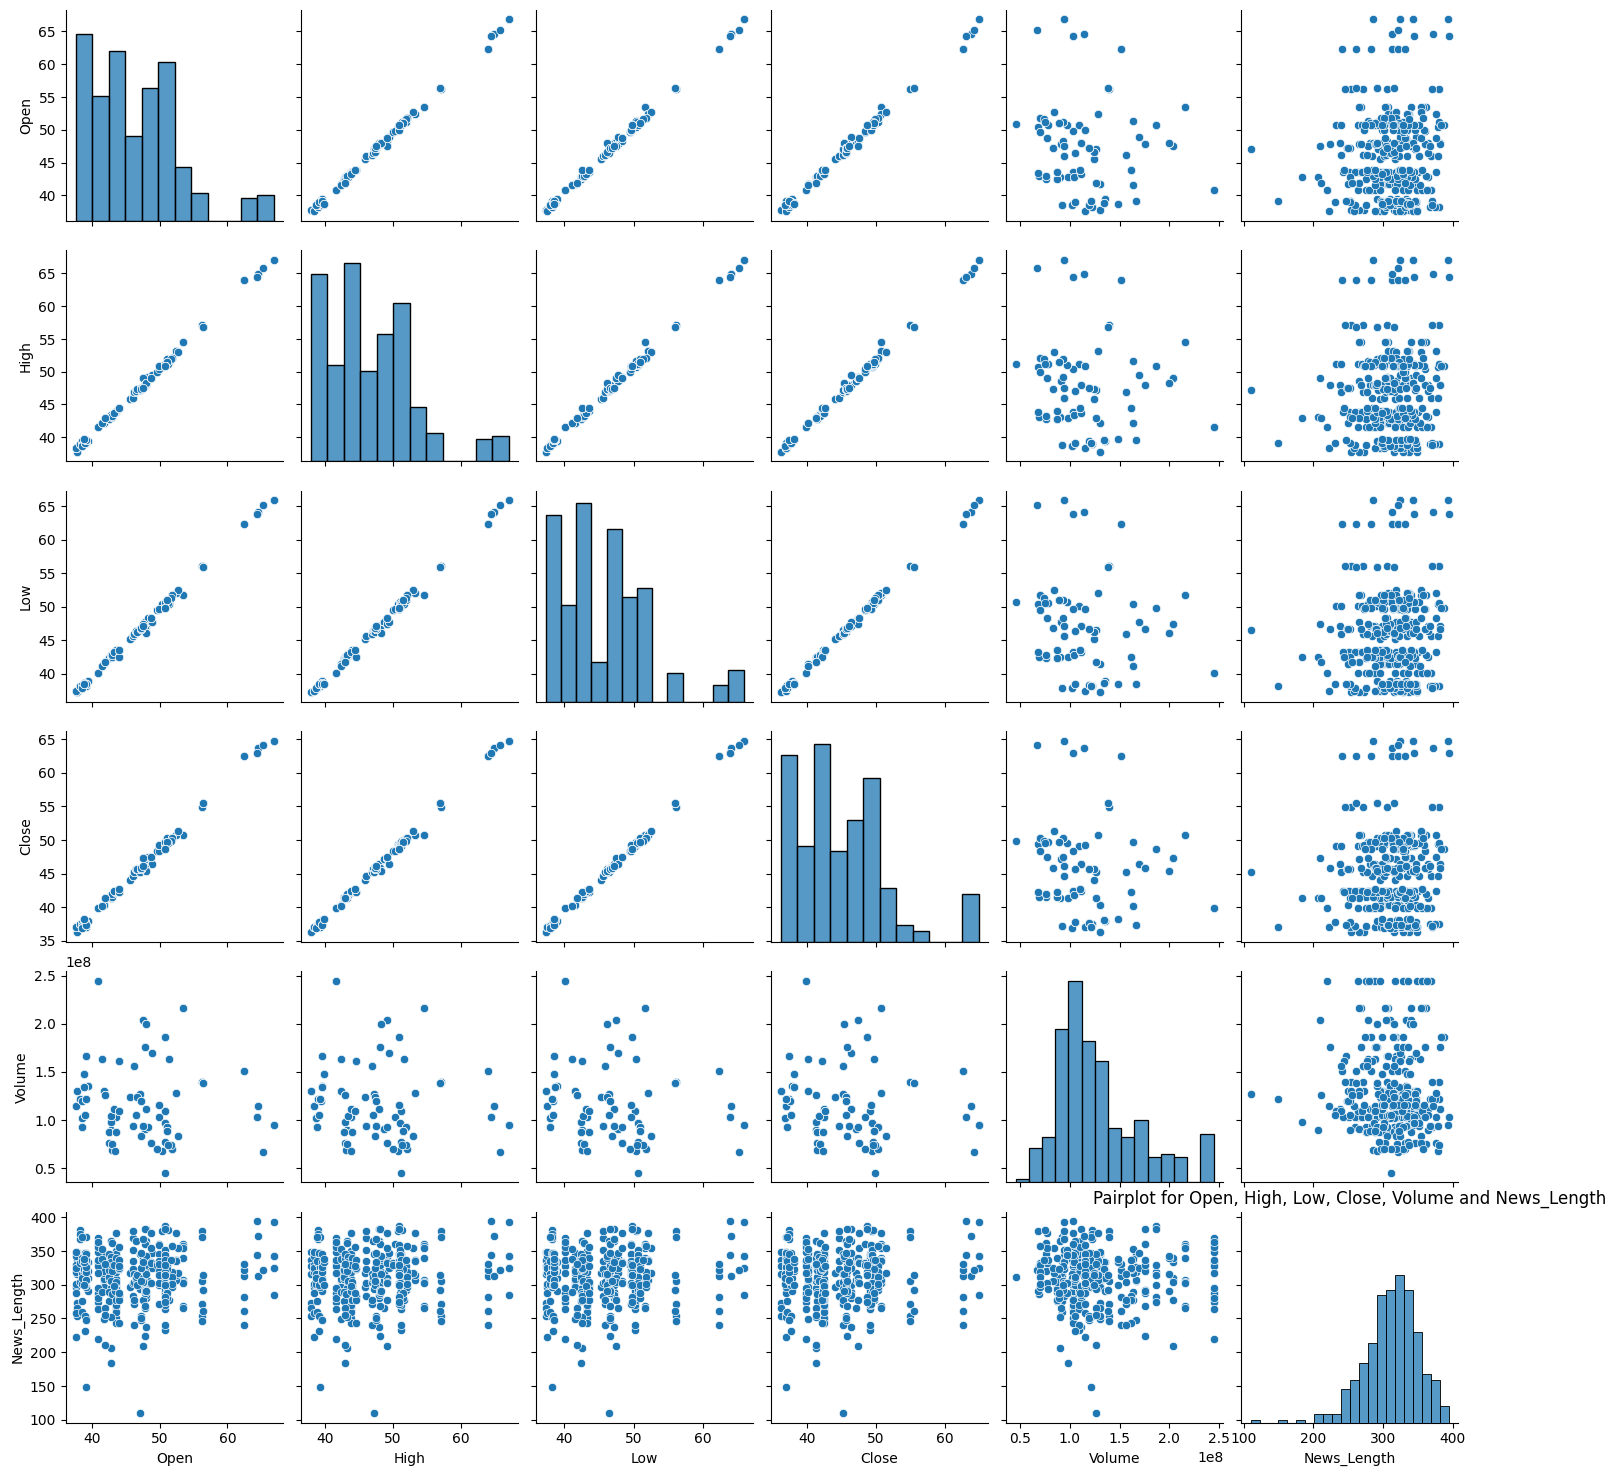

In [76]:
# Create a pairplot between Open, High, Low, Close, Volume and News_Length attributes
sns.pairplot(data = stock_news[["Open", "High", "Low", "Close", "Volume", "News_Length"]])

# Set the title
plt.title("Pairplot for Open, High, Low, Close, Volume and News_Length")

# Display the plot
plt.show()

**Observations:**
- The attributes Open, High, Low and Close are completely postively correlated.
- The distribution of Volume partially show a normal curve.
- The distribution of News_Length show a decennt Nermal curve.

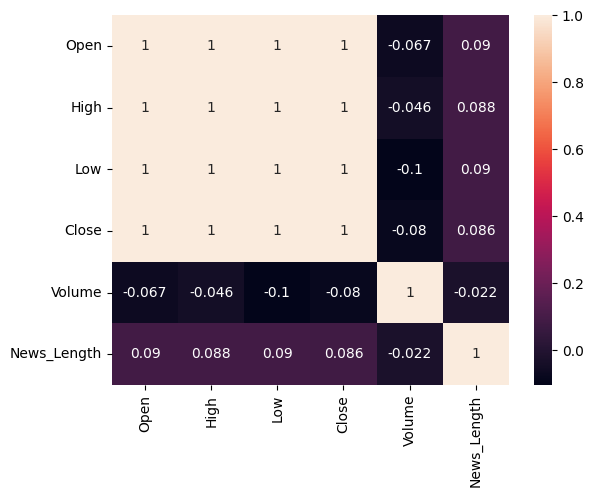

In [77]:
# Create the heatmap for the correlation matrix of attributes Open, High, Low, Close and Volume
sns.heatmap(data = stock_news[["Open", "High", "Low", "Close", "Volume", "News_Length"]].corr(), annot = True)

# Display the plot
plt.show()

**Observations:**
- The attributes Volume and length of the sentiment statements do not show any correlation with any other attributes.
- The attributes Open, High, Low and Close are completely postively correlated with the value 1.

## **Data Preprocessing**

In [78]:
# Print the 10 rows of the dataframe to identify the possible data transformations
stock_news.head(10)

Date                                               News       Open  \
0 2019-01-02   The tech sector experienced a significant dec...  41.740002   
1 2019-01-02   Apple lowered its fiscal Q1 revenue guidance ...  41.740002   
2 2019-01-02   Apple cut its fiscal first quarter revenue fo...  41.740002   
3 2019-01-02   This news article reports that yields on long...  41.740002   
4 2019-01-02   Apple's revenue warning led to a decline in U...  41.740002   
5 2019-01-02  Apple CEO Tim Cook discussed the company's Q1 ...  41.740002   
6 2019-01-02   Roku Inc has announced plans to offer premium...  41.740002   
7 2019-01-02   Wall Street saw modest gains on Wednesday but...  41.740002   
8 2019-01-02   Apple's fiscal first quarter revenue came in ...  41.740002   
9 2019-01-02   Apple Inc. lowered its quarterly sales foreca...  41.740002   

        High        Low      Close     Volume  Label Label_Meaning  \
0  42.244999  41.482498  40.246914  130672400     -1      Negative   
1  42.244999  41.482498  40.246914  130672400     -1      Negative   
2  42.244999  41.482498  40.246914  130672400     -1      Negative   
3  42.244999  41.482498  40.246914  130672400     -1      Negative   
4  42.244999  41.482498  40.246914  130672400     -1      Negative   
5  42.244999  41.482498  40.246914  130672400      0       Neutral   
6  42.244999  41.482498  40.246914  130672400      1      Positive   
7  42.244999  41.482498  40.246914  130672400     -1      Negative   
8  42.244999  41.482498  40.246914  130672400     -1      Negative   
9  42.244999  41.482498  40.246914  130672400     -1      Negative   

   News_Length  
0          324  
1          323  
2          296  
3          300  
4          305  
5          307  
6          308  
7          317  
8          344  
9          336

**Observations:**
- We can extract Day, month and Year from the Date attribute.
- Convert the Label values into text like -1 as Negative, 0 as Neutral or 1 as positive.
- Prepare a cleaned message from the news that does not contain special characters.

In [79]:
# Get the column information to decide the column data transformation strategy.
stock_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           349 non-null    datetime64[ns]
 1   News           349 non-null    object        
 2   Open           349 non-null    float64       
 3   High           349 non-null    float64       
 4   Low            349 non-null    float64       
 5   Close          349 non-null    float64       
 6   Volume         349 non-null    int64         
 7   Label          349 non-null    int64         
 8   Label_Meaning  349 non-null    object        
 9   News_Length    349 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 27.4+ KB


In [80]:
# Extract Day from the Date attribute and store it in Day attribute
stock_news["Day"] = stock_news["Date"].dt.day

# Extract Month from the Date attribute and store it in Month attribute
stock_news["Month"] = stock_news["Date"].dt.month

# Extract Year from the Date attribute and store it in Year attribute
stock_news["Year"] = stock_news["Date"].dt.year

# Display the 10 rows to validate
stock_news.head(10)

Date                                               News       Open  \
0 2019-01-02   The tech sector experienced a significant dec...  41.740002   
1 2019-01-02   Apple lowered its fiscal Q1 revenue guidance ...  41.740002   
2 2019-01-02   Apple cut its fiscal first quarter revenue fo...  41.740002   
3 2019-01-02   This news article reports that yields on long...  41.740002   
4 2019-01-02   Apple's revenue warning led to a decline in U...  41.740002   
5 2019-01-02  Apple CEO Tim Cook discussed the company's Q1 ...  41.740002   
6 2019-01-02   Roku Inc has announced plans to offer premium...  41.740002   
7 2019-01-02   Wall Street saw modest gains on Wednesday but...  41.740002   
8 2019-01-02   Apple's fiscal first quarter revenue came in ...  41.740002   
9 2019-01-02   Apple Inc. lowered its quarterly sales foreca...  41.740002   

        High        Low      Close     Volume  Label Label_Meaning  \
0  42.244999  41.482498  40.246914  130672400     -1      Negative   
1  42.244999  41.482498  40.246914  130672400     -1      Negative   
2  42.244999  41.482498  40.246914  130672400     -1      Negative   
3  42.244999  41.482498  40.246914  130672400     -1      Negative   
4  42.244999  41.482498  40.246914  130672400     -1      Negative   
5  42.244999  41.482498  40.246914  130672400      0       Neutral   
6  42.244999  41.482498  40.246914  130672400      1      Positive   
7  42.244999  41.482498  40.246914  130672400     -1      Negative   
8  42.244999  41.482498  40.246914  130672400     -1      Negative   
9  42.244999  41.482498  40.246914  130672400     -1      Negative   

   News_Length  Day  Month  Year  
0          324    2      1  2019  
1          323    2      1  2019  
2          296    2      1  2019  
3          300    2      1  2019  
4          305    2      1  2019  
5          307    2      1  2019  
6          308    2      1  2019  
7          317    2      1  2019  
8          344    2      1  2019  
9          336    2      1  2019

In [81]:
# Remove the special characters from News Column
stock_news["News_Cleaned"] = stock_news["News"].apply(remove_special_characters)

# Distplay the first 10 rows to validate the data
stock_news.head(10)

Date                                               News       Open  \
0 2019-01-02   The tech sector experienced a significant dec...  41.740002   
1 2019-01-02   Apple lowered its fiscal Q1 revenue guidance ...  41.740002   
2 2019-01-02   Apple cut its fiscal first quarter revenue fo...  41.740002   
3 2019-01-02   This news article reports that yields on long...  41.740002   
4 2019-01-02   Apple's revenue warning led to a decline in U...  41.740002   
5 2019-01-02  Apple CEO Tim Cook discussed the company's Q1 ...  41.740002   
6 2019-01-02   Roku Inc has announced plans to offer premium...  41.740002   
7 2019-01-02   Wall Street saw modest gains on Wednesday but...  41.740002   
8 2019-01-02   Apple's fiscal first quarter revenue came in ...  41.740002   
9 2019-01-02   Apple Inc. lowered its quarterly sales foreca...  41.740002   

        High        Low      Close     Volume  Label Label_Meaning  \
0  42.244999  41.482498  40.246914  130672400     -1      Negative   
1  42.244999  41.482498  40.246914  130672400     -1      Negative   
2  42.244999  41.482498  40.246914  130672400     -1      Negative   
3  42.244999  41.482498  40.246914  130672400     -1      Negative   
4  42.244999  41.482498  40.246914  130672400     -1      Negative   
5  42.244999  41.482498  40.246914  130672400      0       Neutral   
6  42.244999  41.482498  40.246914  130672400      1      Positive   
7  42.244999  41.482498  40.246914  130672400     -1      Negative   
8  42.244999  41.482498  40.246914  130672400     -1      Negative   
9  42.244999  41.482498  40.246914  130672400     -1      Negative   

   News_Length  Day  Month  Year  \
0          324    2      1  2019   
1          323    2      1  2019   
2          296    2      1  2019   
3          300    2      1  2019   
4          305    2      1  2019   
5          307    2      1  2019   
6          308    2      1  2019   
7          317    2      1  2019   
8          344    2      1  2019   
9          336    2      1  2019   

                                        News_Cleaned  
0   The tech sector experienced a significant dec...  
1   Apple lowered its fiscal Q1 revenue guidance ...  
2   Apple cut its fiscal first quarter revenue fo...  
3   This news article reports that yields on long...  
4   Apple s revenue warning led to a decline in U...  
5  Apple CEO Tim Cook discussed the company s Q1 ...  
6   Roku Inc has announced plans to offer premium...  
7   Wall Street saw modest gains on Wednesday but...  
8   Apple s fiscal first quarter revenue came in ...  
9   Apple Inc lowered its quarterly sales forecas...

In [82]:
# changing the case of the News_Cleaned data to lower case
stock_news["News_Cleaned"] = stock_news["News_Cleaned"].str.lower()

# Distplay the first 10 rows to validate the data
stock_news.head(10)

Date                                               News       Open  \
0 2019-01-02   The tech sector experienced a significant dec...  41.740002   
1 2019-01-02   Apple lowered its fiscal Q1 revenue guidance ...  41.740002   
2 2019-01-02   Apple cut its fiscal first quarter revenue fo...  41.740002   
3 2019-01-02   This news article reports that yields on long...  41.740002   
4 2019-01-02   Apple's revenue warning led to a decline in U...  41.740002   
5 2019-01-02  Apple CEO Tim Cook discussed the company's Q1 ...  41.740002   
6 2019-01-02   Roku Inc has announced plans to offer premium...  41.740002   
7 2019-01-02   Wall Street saw modest gains on Wednesday but...  41.740002   
8 2019-01-02   Apple's fiscal first quarter revenue came in ...  41.740002   
9 2019-01-02   Apple Inc. lowered its quarterly sales foreca...  41.740002   

        High        Low      Close     Volume  Label Label_Meaning  \
0  42.244999  41.482498  40.246914  130672400     -1      Negative   
1  42.244999  41.482498  40.246914  130672400     -1      Negative   
2  42.244999  41.482498  40.246914  130672400     -1      Negative   
3  42.244999  41.482498  40.246914  130672400     -1      Negative   
4  42.244999  41.482498  40.246914  130672400     -1      Negative   
5  42.244999  41.482498  40.246914  130672400      0       Neutral   
6  42.244999  41.482498  40.246914  130672400      1      Positive   
7  42.244999  41.482498  40.246914  130672400     -1      Negative   
8  42.244999  41.482498  40.246914  130672400     -1      Negative   
9  42.244999  41.482498  40.246914  130672400     -1      Negative   

   News_Length  Day  Month  Year  \
0          324    2      1  2019   
1          323    2      1  2019   
2          296    2      1  2019   
3          300    2      1  2019   
4          305    2      1  2019   
5          307    2      1  2019   
6          308    2      1  2019   
7          317    2      1  2019   
8          344    2      1  2019   
9          336    2      1  2019   

                                        News_Cleaned  
0   the tech sector experienced a significant dec...  
1   apple lowered its fiscal q1 revenue guidance ...  
2   apple cut its fiscal first quarter revenue fo...  
3   this news article reports that yields on long...  
4   apple s revenue warning led to a decline in u...  
5  apple ceo tim cook discussed the company s q1 ...  
6   roku inc has announced plans to offer premium...  
7   wall street saw modest gains on wednesday but...  
8   apple s fiscal first quarter revenue came in ...  
9   apple inc lowered its quarterly sales forecas...

In [83]:
# removing extra whitespaces from the News_Cleaned
stock_news["News_Cleaned"] = stock_news["News_Cleaned"].str.strip()

# Distplay the first 10 rows to validate the data
stock_news.head(10)

Date                                               News       Open  \
0 2019-01-02   The tech sector experienced a significant dec...  41.740002   
1 2019-01-02   Apple lowered its fiscal Q1 revenue guidance ...  41.740002   
2 2019-01-02   Apple cut its fiscal first quarter revenue fo...  41.740002   
3 2019-01-02   This news article reports that yields on long...  41.740002   
4 2019-01-02   Apple's revenue warning led to a decline in U...  41.740002   
5 2019-01-02  Apple CEO Tim Cook discussed the company's Q1 ...  41.740002   
6 2019-01-02   Roku Inc has announced plans to offer premium...  41.740002   
7 2019-01-02   Wall Street saw modest gains on Wednesday but...  41.740002   
8 2019-01-02   Apple's fiscal first quarter revenue came in ...  41.740002   
9 2019-01-02   Apple Inc. lowered its quarterly sales foreca...  41.740002   

        High        Low      Close     Volume  Label Label_Meaning  \
0  42.244999  41.482498  40.246914  130672400     -1      Negative   
1  42.244999  41.482498  40.246914  130672400     -1      Negative   
2  42.244999  41.482498  40.246914  130672400     -1      Negative   
3  42.244999  41.482498  40.246914  130672400     -1      Negative   
4  42.244999  41.482498  40.246914  130672400     -1      Negative   
5  42.244999  41.482498  40.246914  130672400      0       Neutral   
6  42.244999  41.482498  40.246914  130672400      1      Positive   
7  42.244999  41.482498  40.246914  130672400     -1      Negative   
8  42.244999  41.482498  40.246914  130672400     -1      Negative   
9  42.244999  41.482498  40.246914  130672400     -1      Negative   

   News_Length  Day  Month  Year  \
0          324    2      1  2019   
1          323    2      1  2019   
2          296    2      1  2019   
3          300    2      1  2019   
4          305    2      1  2019   
5          307    2      1  2019   
6          308    2      1  2019   
7          317    2      1  2019   
8          344    2      1  2019   
9          336    2      1  2019   

                                        News_Cleaned  
0  the tech sector experienced a significant decl...  
1  apple lowered its fiscal q1 revenue guidance t...  
2  apple cut its fiscal first quarter revenue for...  
3  this news article reports that yields on long ...  
4  apple s revenue warning led to a decline in us...  
5  apple ceo tim cook discussed the company s q1 ...  
6  roku inc has announced plans to offer premium ...  
7  wall street saw modest gains on wednesday but ...  
8  apple s fiscal first quarter revenue came in b...  
9  apple inc lowered its quarterly sales forecast...

In [84]:
# remove stopwords from the News_Cleaned using remove_stopwords
stock_news["News_Cleaned"] = stock_news["News_Cleaned"].apply(remove_stopwords)

# Distplay the first 10 rows to validate the data
stock_news.head(10)

Date                                               News       Open  \
0 2019-01-02   The tech sector experienced a significant dec...  41.740002   
1 2019-01-02   Apple lowered its fiscal Q1 revenue guidance ...  41.740002   
2 2019-01-02   Apple cut its fiscal first quarter revenue fo...  41.740002   
3 2019-01-02   This news article reports that yields on long...  41.740002   
4 2019-01-02   Apple's revenue warning led to a decline in U...  41.740002   
5 2019-01-02  Apple CEO Tim Cook discussed the company's Q1 ...  41.740002   
6 2019-01-02   Roku Inc has announced plans to offer premium...  41.740002   
7 2019-01-02   Wall Street saw modest gains on Wednesday but...  41.740002   
8 2019-01-02   Apple's fiscal first quarter revenue came in ...  41.740002   
9 2019-01-02   Apple Inc. lowered its quarterly sales foreca...  41.740002   

        High        Low      Close     Volume  Label Label_Meaning  \
0  42.244999  41.482498  40.246914  130672400     -1      Negative   
1  42.244999  41.482498  40.246914  130672400     -1      Negative   
2  42.244999  41.482498  40.246914  130672400     -1      Negative   
3  42.244999  41.482498  40.246914  130672400     -1      Negative   
4  42.244999  41.482498  40.246914  130672400     -1      Negative   
5  42.244999  41.482498  40.246914  130672400      0       Neutral   
6  42.244999  41.482498  40.246914  130672400      1      Positive   
7  42.244999  41.482498  40.246914  130672400     -1      Negative   
8  42.244999  41.482498  40.246914  130672400     -1      Negative   
9  42.244999  41.482498  40.246914  130672400     -1      Negative   

   News_Length  Day  Month  Year  \
0          324    2      1  2019   
1          323    2      1  2019   
2          296    2      1  2019   
3          300    2      1  2019   
4          305    2      1  2019   
5          307    2      1  2019   
6          308    2      1  2019   
7          317    2      1  2019   
8          344    2      1  2019   
9          336    2      1  2019   

                                        News_Cleaned  
0  tech sector experienced significant decline af...  
1  apple lowered fiscal q1 revenue guidance 84 bi...  
2  apple cut fiscal first quarter revenue forecas...  
3  news article reports yields long dated u treas...  
4  apple revenue warning led decline usd jpy pair...  
5  apple ceo tim cook discussed company q1 warnin...  
6  roku inc announced plans offer premium video c...  
7  wall street saw modest gains wednesday threate...  
8  apple fiscal first quarter revenue came analys...  
9  apple inc lowered quarterly sales forecast fis...

In [85]:
# Perform the stemming operations on News_Cleaned using apply_porter_stemmer function
stock_news["News_Cleaned"] = stock_news["News_Cleaned"].apply(apply_porter_stemmer)

# Distplay the first 10 rows to validate the data
stock_news.head(10)

Date                                               News       Open  \
0 2019-01-02   The tech sector experienced a significant dec...  41.740002   
1 2019-01-02   Apple lowered its fiscal Q1 revenue guidance ...  41.740002   
2 2019-01-02   Apple cut its fiscal first quarter revenue fo...  41.740002   
3 2019-01-02   This news article reports that yields on long...  41.740002   
4 2019-01-02   Apple's revenue warning led to a decline in U...  41.740002   
5 2019-01-02  Apple CEO Tim Cook discussed the company's Q1 ...  41.740002   
6 2019-01-02   Roku Inc has announced plans to offer premium...  41.740002   
7 2019-01-02   Wall Street saw modest gains on Wednesday but...  41.740002   
8 2019-01-02   Apple's fiscal first quarter revenue came in ...  41.740002   
9 2019-01-02   Apple Inc. lowered its quarterly sales foreca...  41.740002   

        High        Low      Close     Volume  Label Label_Meaning  \
0  42.244999  41.482498  40.246914  130672400     -1      Negative   
1  42.244999  41.482498  40.246914  130672400     -1      Negative   
2  42.244999  41.482498  40.246914  130672400     -1      Negative   
3  42.244999  41.482498  40.246914  130672400     -1      Negative   
4  42.244999  41.482498  40.246914  130672400     -1      Negative   
5  42.244999  41.482498  40.246914  130672400      0       Neutral   
6  42.244999  41.482498  40.246914  130672400      1      Positive   
7  42.244999  41.482498  40.246914  130672400     -1      Negative   
8  42.244999  41.482498  40.246914  130672400     -1      Negative   
9  42.244999  41.482498  40.246914  130672400     -1      Negative   

   News_Length  Day  Month  Year  \
0          324    2      1  2019   
1          323    2      1  2019   
2          296    2      1  2019   
3          300    2      1  2019   
4          305    2      1  2019   
5          307    2      1  2019   
6          308    2      1  2019   
7          317    2      1  2019   
8          344    2      1  2019   
9          336    2      1  2019   

                                        News_Cleaned  
0  tech sector experienc signific declin aftermar...  
1  appl lower fiscal q1 revenu guidanc 84 billion...  
2  appl cut fiscal first quarter revenu forecast ...  
3  news articl report yield long date u treasuri ...  
4  appl revenu warn led declin usd jpi pair gain ...  
5  appl ceo tim cook discuss compani q1 warn cnbc...  
6  roku inc announc plan offer premium video chan...  
7  wall street saw modest gain wednesday threaten...  
8  appl fiscal first quarter revenu came analyst ...  
9  appl inc lower quarterli sale forecast fiscal ...

In [86]:
# Check the distribution of the target value Label in order to maintain the proportionate distribution
stock_news["Label"].value_counts(normalize = False)

 0    170
-1     99
 1     80
Name: Label, dtype: int64

**Observations:**
- Out of 349 rows, 170 are Neutral which is approximately 48.71%.
- Out of 349 rows, 99 are Negative which is approximately 28.37%.
- Out of 349 rows, 80 are Positive which is approximately 22.92%.

In [87]:
# Split the data into 70% Train and 20% Temp (Validation + Test)
train_data, temp_data, train_labels, temp_labels = train_test_split(stock_news.drop(columns = ["Label", "Label_Meaning"], axis = 1), stock_news["Label"], test_size = 0.3, stratify = stock_news["Label"], random_state = 42)

# Split the temp_data further into 10% Validation and 10% Test
valid_data, test_data, valid_labels, test_labels = train_test_split(temp_data, temp_labels, test_size = 0.5, stratify = temp_labels, random_state = 42)

**Observations:**
- The train_data, train_labels, valid_data, valid_labels, test_data and test_labels created successfully.

In [88]:
# Display the stats of the train, valid and test data
display(Markdown("**Observations:**"))

# Print sizes of splits
display(Markdown("- Train Size: {}, Validation Size: {}, Test Size: {}".format(len(train_data), len(valid_data), len(test_data))))

**Observations:**

- Train Size: 244, Validation Size: 52, Test Size: 53

In [89]:
# Diplay the distribution of values of Label in train_labels
train_labels.value_counts(normalize = True)

 0    0.487705
-1    0.282787
 1    0.229508
Name: Label, dtype: float64

**Observations:**
- The % distribution of the values in train data matches with the original dataset.

In [90]:
# Diplay the distribution of values of Label in valid_labels
valid_labels.value_counts(normalize = True)

 0    0.480769
-1    0.288462
 1    0.230769
Name: Label, dtype: float64

**Observations:**
- The % distribution of the values in validation data matches with the original dataset.

In [91]:
# Diplay the distribution of values of Label in test_labels
test_labels.value_counts(normalize = True)

 0    0.490566
-1    0.283019
 1    0.226415
Name: Label, dtype: float64

**Observations:**
- The % distribution of the values in test data matches with the original dataset.

In [92]:
# Check the 10 rows of train_data
train_data.head(10)

Date                                               News       Open  \
140 2019-01-29   Apple, Aetna, and CVS are collaborating on a ...  39.062500   
83  2019-01-14   The U.S. stock market declined on Monday as c...  37.712502   
6   2019-01-02   Roku Inc has announced plans to offer premium...  41.740002   
294 2019-04-04   In response to the deadly mosque shootings in...  48.697498   
90  2019-01-15   The Lynx Equity Strategies analysts, KC Rajku...  37.567501   
81  2019-01-11   Apple's NASDAQ AAPL stock declined by 0.52% i...  62.384998   
13  2019-01-02   RBC Capital maintains its bullish stance on A...  41.740002   
18  2019-01-03   In Thursday trading, long-term US Treasury yi...  43.570000   
124 2019-01-23   FireEye's stock price surged after Baird adde...  38.537498   
297 2019-04-04   Apple has slashed the price of its iPhone XR ...  48.697498   

          High        Low      Close     Volume  News_Length  Day  Month  \
140  39.532501  38.527500  37.385262  166348800          320   29      1   
83   37.817501  37.305000  36.254131  129756800          337   14      1   
6    42.244999  41.482498  40.246914  130672400          308    2      1   
294  49.092499  48.285000  47.499989   76457200          354    4      4   
90   38.347500  37.512501  36.996128  114843600          319   15      1   
81   63.982498  62.290001  62.571354  151125200          282   11      1   
13   42.244999  41.482498  40.246914  130672400          347    2      1   
18   43.787498  43.222500  42.470604  103544800          350    3      1   
124  38.785000  37.924999  37.201569   92522400          276   23      1   
297  49.092499  48.285000  47.499989   76457200          332    4      4   

     Year                                       News_Cleaned  
140  2019  appl aetna cv collabor new health app call att...  
83   2019  u stock market declin monday concern global ec...  
6    2019  roku inc announc plan offer premium video chan...  
294  2019  respons deadli mosqu shoot christchurch austra...  
90   2019  lynx equiti strategi analyst kc rajkumar jahan...  
81   2019  appl nasdaq aapl stock declin 0 52 premarket t...  
13   2019  rbc capit maintain bullish stanc appl keep out...  
18   2019  thursday trade long term us treasuri yield dro...  
124  2019  fireey stock price surg baird ad fresh pick li...  
297  2019  appl slash price iphon xr model india approxim...

**Observations:**
- train_data looks good.

In [93]:
# Check the 10 rows of valid_data
valid_data.head(10)

Date                                               News       Open  \
43  2019-01-04   Qualcomm secured a court order in Germany ban...  47.910000   
213 2019-02-25   Sony, aiming to differentiate itself in the s...  43.540001   
323 2019-04-18   In an effort to address EU antitrust concerns...  50.779999   
242 2019-03-15   Apple and Spotify are in a dispute with EU an...  46.212502   
96  2019-01-15   Record-breaking online sales of $126 billion ...  37.567501   
32  2019-01-03   Investors withdrew a record $98 billion from ...  43.570000   
51  2019-01-04  The stock market rebounded strongly on Friday ...  47.910000   
78  2019-01-11   Several Chinese retailers, including Alibaba-...  62.384998   
77  2019-01-11   Wall Street experienced a decline after the o...  62.384998   
291 2019-04-03   The S&P 500, Dow Jones Industrial Average, an...  43.922501   

          High        Low      Close     Volume  News_Length  Day  Month  \
43   47.919998  47.095001  46.419842  111448000          329    4      1   
213  43.967499  43.487499  42.290981   87493600          302   25      2   
323  51.037498  50.630001  49.483093   96783200          344   18      4   
242  46.832500  45.935001  45.177055  156171600          316   15      3   
96   38.347500  37.512501  36.996128  114843600          258   15      1   
32   43.787498  43.222500  42.470604  103544800          291    3      1   
51   47.919998  47.095001  46.419842  111448000          285    4      1   
78   63.982498  62.290001  62.571354  151125200          261   11      1   
77   63.982498  62.290001  62.571354  151125200          241   11      1   
291  44.437500  43.492500  42.684212  109744800          288    3      4   

     Year                                       News_Cleaned  
43   2019  qualcomm secur court order germani ban sale ip...  
213  2019  soni aim differenti smartphon market unveil ne...  
323  2019  effort address eu antitrust concern avoid pena...  
242  2019  appl spotifi disput eu antitrust regul alleg a...  
96   2019  record break onlin sale 126 billion 2018 u hol...  
32   2019  investor withdrew record 98 billion u stock fu...  
51   2019  stock market rebound strongli friday follow po...  
78   2019  sever chines retail includ alibaba back sune j...  
77   2019  wall street experienc declin open bell friday ...  
291  2019  p 500 dow jone industri averag nasdaq composit...

**Observations:**
- valid_data looks good.

In [94]:
# Check the 10 rows of test_data
test_data.head(10)

Date                                               News       Open  \
104 2019-01-16   Veteran producer Jason Katims is leaving Univ...  38.270000   
5   2019-01-02  Apple CEO Tim Cook discussed the company's Q1 ...  41.740002   
21  2019-01-03   Oil prices rebounded on Thursday due to dolla...  43.570000   
159 2019-01-30   Apple plans to cut prices of some flagship iP...  40.812500   
315 2019-04-17   Facebook, aiming to compete with Alexa, Siri,...  49.884998   
89  2019-01-14   The Dow Jones Industrial Average and S&P 500 ...  37.712502   
306 2019-04-15   Amazon's potential entry into the free music ...  49.645000   
206 2019-02-21   Apple's long-rumored vehicle project may shif...  42.950001   
19  2019-01-03   Gold prices have reached their highest level ...  43.570000   
52  2019-01-07   Sprint and Samsung plan to release 5G smartph...  50.792500   

          High        Low      Close     Volume  News_Length  Day  Month  \
104  38.970001  38.250000  37.448109  122278800          304   16      1   
5    42.244999  41.482498  40.246914  130672400          307    2      1   
21   43.787498  43.222500  42.470604  103544800          303    3      1   
159  41.537498  40.057499  39.939968  244439200          328   30      1   
315  50.845001  49.652500  49.305897  115627200          335   17      4   
89   37.817501  37.305000  36.254131  129756800          328   14      1   
306  49.962502  49.502499  48.359261   70146400          329   15      4   
206  43.092499  42.575001  41.521526   68998800          286   21      2   
19   43.787498  43.222500  42.470604  103544800          263    3      1   
52   51.122501  50.162498  49.110790  109012000          290    7      1   

     Year                                       News_Cleaned  
104  2019  veteran produc jason katim leav univers tv joi...  
5    2019  appl ceo tim cook discuss compani q1 warn cnbc...  
21   2019  oil price rebound thursday due dollar weak sig...  
159  2019  appl plan cut price flagship iphon boost sale ...  
315  2019  facebook aim compet alexa siri googl assist de...  
89   2019  dow jone industri averag p 500 end lower monda...  
306  2019  amazon potenti entri free music stream market ...  
206  2019  appl long rumor vehicl project may shift devel...  
19   2019  gold price reach highest level sinc mid june y...  
52   2019  sprint samsung plan releas 5g smartphon nine u...

**Observations:**
- test_data looks good.

In [95]:
# Print the first 10 rows of train_labels
train_labels.head(10)

140    0
83    -1
6      1
294    0
90    -1
81     0
13     0
18    -1
124    1
297    0
Name: Label, dtype: int64

In [96]:
train_labels_encoded = le.fit_transform(train_labels)

for i in range(0, 10):
    print(train_labels_encoded[i])

1
0
2
1
0
1
1
0
2
1


**Observations:**
- train_labels looks good.

In [97]:
# Print the first 10 rows of valid_labels
valid_labels.head(10)

43     0
213    0
323    1
242    0
96     1
32    -1
51     1
78    -1
77     0
291    0
Name: Label, dtype: int64

In [98]:
valid_labels_encoded = le.fit_transform(valid_labels)

for i in range(0, 10):
    print(valid_labels_encoded[i])

1
1
2
1
2
0
2
0
1
1


**Observations:**
- valid_labels looks good.

In [99]:
# Print the first 10 rows of test_labels
test_labels.head(10)

104    0
5      0
21     1
159    0
315   -1
89     0
306   -1
206    0
19     0
52     1
Name: Label, dtype: int64

**Observations:**
- test_labels looks good.

In [100]:
test_labels_encoded = le.fit_transform(test_labels)

for i in range(0, 10):
    print(test_labels_encoded[i])

1
1
2
1
0
1
0
1
1
2


## **Word Embeddings**

### Using Word2Vec

`Word2Vec` is imported from Gensim library

- `Word2Vec` takes the following important parameters:
    1. `word_list`: List of all words in all documents
    2. `vector_size`: Determines the size of the word vectors
    2. `min_count`: It will ignore all the words with a total frequency lower than this.
    3. `Workers`: These are the number of threads to train the model.
    4. 'window': Size of context relative to target word.

- By default, it creates word vectors of size 100.

In [101]:
# Create a list of all words for the column News_Cleaned
words_list = [item.split(" ") for item in stock_news["News_Cleaned"]]

# Create an instance of Word2Vec
vec_size = 300
model_w2v = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

# Check the size of the above created vocabulary
display(Markdown("**Observations:**\n- Total words in the vocabulary: {}".format(len(list(model_w2v.wv.key_to_index)))))

**Observations:**
- Total words in the vocabulary: 2580

In [102]:
# Check the word embedding for a random word
model_w2v.wv["stock"]

array([ 3.17709055e-03,  7.47681223e-03, -2.05450575e-03,  5.34986611e-03,
       -5.13954146e-04, -1.15580792e-02,  8.47364683e-03,  1.84548795e-02,
        3.26001109e-03, -2.37264973e-03,  4.25100588e-05, -9.63470526e-03,
        1.22699456e-03,  2.91477633e-03, -9.71277431e-03, -8.12793896e-03,
        5.76221850e-03,  6.38066616e-04,  4.60211374e-03, -4.15469427e-03,
       -6.61033997e-03, -1.25255948e-03,  1.01798922e-02,  2.38442654e-03,
        1.10940253e-02,  1.35063811e-03, -1.17300758e-02, -2.92247278e-03,
       -6.06337609e-03, -8.82460363e-03,  5.54150855e-03, -7.61125484e-05,
        4.07864194e-04,  6.14099146e-04, -5.39152278e-03,  5.02401823e-03,
        9.54323332e-04, -1.38683384e-02, -1.17787451e-03, -2.88353045e-03,
       -1.61134219e-03, -1.58828136e-03,  2.55876128e-03, -8.14945996e-03,
        5.39609231e-03,  1.35154109e-02,  1.18538097e-03, -4.97526082e-04,
       -4.27541975e-03,  6.91649178e-03,  1.30647758e-03, -2.33234162e-03,
       -9.03292838e-03,  

In [103]:
# Check 5 similar words that resemble stock
model_w2v.wv.similar_by_word("stock", topn = 5)

[('appl', 0.9426149129867554),
 ('trade', 0.9330816268920898),
 ('compani', 0.9290030002593994),
 ('year', 0.925611674785614),
 ('servic', 0.9229860901832581)]

In [104]:
# Check the word embedding for a random word
model_w2v.wv["good"]

array([-3.0486875e-03,  6.5574350e-05,  7.4759935e-04,  2.3907982e-03,
        5.0870911e-04, -3.6818287e-03, -1.3009496e-03,  5.9770211e-03,
        1.2470917e-03, -1.0761073e-03,  2.5134687e-03, -3.8001977e-03,
        1.7221153e-04, -2.9597161e-03, -3.1205241e-03, -3.8182659e-03,
       -2.8550574e-03, -1.3705728e-03,  2.0024027e-03, -2.7457606e-03,
       -4.3055434e-03, -2.8421972e-03,  2.2221038e-03, -2.9052366e-03,
        1.3101866e-03, -1.8956354e-04, -2.7342185e-03, -1.5256443e-03,
       -2.8658162e-03, -5.9740216e-04,  3.7740322e-03,  1.8463756e-03,
       -9.8539283e-04,  7.7129633e-04, -3.6049467e-03,  2.9491801e-03,
        9.9868211e-04, -4.5354739e-03,  1.4480204e-05, -2.6394504e-03,
       -3.5278976e-03, -2.9816939e-03, -1.7544647e-03, -3.2574267e-03,
        1.8530585e-03, -1.0577423e-03, -2.6555087e-03, -7.4141583e-04,
       -2.2910282e-03,  8.9874357e-04,  4.4646145e-05,  1.2018952e-03,
        2.0302041e-03,  3.3680685e-03, -1.9739156e-03, -7.7820197e-04,
      

In [105]:
# Check 5 similar words that resemble good
model_w2v.wv.similar_by_word("good", topn = 5)

[('industri', 0.46960991621017456),
 ('stock', 0.4595384895801544),
 ('billion', 0.45387163758277893),
 ('appl', 0.4523754417896271),
 ('rate', 0.45218122005462646)]

In [106]:
# Check the word embedding for a random word
model_w2v.wv["best"]

array([-3.0331462e-04, -5.3468614e-04, -2.3507965e-03,  2.3238910e-03,
        6.2924613e-05,  2.2667905e-03, -1.9202539e-03, -5.4290867e-04,
       -1.3062355e-05,  3.2631017e-04,  3.7091775e-04,  3.1755771e-04,
       -7.8727398e-04, -3.2323361e-03,  2.3102986e-03,  2.4261645e-03,
       -9.9606765e-04, -2.6650857e-03,  1.9631335e-03, -2.6238288e-03,
        1.2216629e-03,  2.3698502e-03, -5.3439173e-04, -1.5041154e-03,
       -2.2064268e-03, -1.8839987e-03, -7.6569116e-04, -2.7578834e-03,
        2.7155194e-03, -2.1656787e-03, -1.6140644e-03, -1.7673238e-03,
        2.5934097e-04, -1.0655877e-03,  1.2869083e-03, -1.5524542e-03,
       -1.7018823e-03,  1.0515834e-03,  1.7982097e-03,  1.2592894e-03,
        1.7052518e-03, -9.6276519e-04,  3.1057408e-03, -2.8921294e-03,
        1.8760421e-03, -1.1938106e-04, -6.8213104e-04, -2.0304413e-03,
       -1.8525523e-03,  1.3693069e-03, -4.4781107e-05, -2.3467334e-03,
        7.8856165e-04, -2.9503750e-03,  2.9562874e-04,  1.5092996e-03,
      

In [107]:
# Check 5 similar words that resemble good
model_w2v.wv.similar_by_word("best", topn = 5)

[('came', 0.21230290830135345),
 ('time', 0.20437480509281158),
 ('chip', 0.20015497505664825),
 ('stream', 0.197169229388237),
 ('reveal', 0.19689200818538666)]

In [108]:
# Retrieve words present in the vocabulary of model_w2v
words = list(model_w2v.wv.key_to_index.keys())

# Retrieve word vectors for all the words present in the vocabulary of model_w2v
words_vectors = model_w2v.wv[words].tolist()

# Create a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, words_vectors))

# Display the length of the dictionary word_vector_dict
display(Markdown("**Observations:**\n- Length of the dictionary is {}.".format(len(word_vector_dict))))

**Observations:**
- Length of the dictionary is 2580.

In [109]:
# Use the function average_vectorizer_Word2Vec and vecotise the vectors for train_data
train_data_word_vectors = pd.DataFrame(train_data["News_Cleaned"].apply(average_vectorizer_Word2Vec).tolist(), columns = ["Feature " + str(i) for i in range(vec_size)])

# Use the function average_vectorizer_Word2Vec and vecotise the vectors for valid_data
valid_data_word_vectors = pd.DataFrame(valid_data["News_Cleaned"].apply(average_vectorizer_Word2Vec).tolist(), columns = ["Feature " + str(i) for i in range(vec_size)])

# Use the function average_vectorizer_Word2Vec and vecotise the vectors for test_data
test_data_word_vectors = pd.DataFrame(test_data["News_Cleaned"].apply(average_vectorizer_Word2Vec).tolist(), columns = ["Feature " + str(i) for i in range(vec_size)])

**Observations:**
- Vectorization is successful.

In [110]:
# Display the 10 rows from train_data_word_vectors
train_data_word_vectors.head(10)

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0   0.000010   0.004452  -0.000803   0.002290  -0.000040  -0.005234   
1   0.000320   0.005409  -0.001305   0.002215   0.000254  -0.006231   
2   0.000452   0.003109  -0.000670   0.001689   0.000300  -0.003721   
3  -0.000122   0.002064  -0.000202   0.001148  -0.000234  -0.002616   
4   0.000288   0.003650  -0.000616   0.001747  -0.000221  -0.005244   
5   0.000493   0.004593  -0.001094   0.003167   0.000113  -0.006796   
6  -0.000077   0.003046  -0.000745   0.001517  -0.000362  -0.004261   
7   0.000696   0.004895  -0.001419   0.002747  -0.000177  -0.006322   
8   0.000397   0.003967  -0.000849   0.001838  -0.000674  -0.005187   
9   0.000030   0.003235  -0.000339   0.001958  -0.000466  -0.004333   

   Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 290  Feature 291  \
0   0.002488   0.007884   0.001792  -0.001035  ...    -0.000072     0.005193   
1   0.003779   0.010415   0.002598  -0.001126  ...    -0.000510     0.006814   
2   0.001130   0.006135   0.001794  -0.000641  ...     0.000312     0.004133   
3   0.001289   0.004496   0.000364  -0.000198  ...     0.000351     0.002098   
4   0.002226   0.007146   0.001318  -0.000944  ...    -0.000057     0.004638   
5   0.003612   0.010291   0.002135  -0.001510  ...    -0.000095     0.006537   
6   0.002095   0.007087   0.001043  -0.001300  ...    -0.000149     0.005019   
7   0.003146   0.010103   0.002267  -0.001367  ...    -0.000546     0.007500   
8   0.002540   0.008271   0.002360  -0.001262  ...    -0.000379     0.005932   
9   0.001860   0.006759   0.001400  -0.000733  ...     0.000304     0.004366   

   Feature 292  Feature 293  Feature 294  Feature 295  Feature 296  \
0     0.003902     0.001080     0.003638     0.003960     0.000450   
1     0.005342     0.000555     0.004394     0.005849     0.000602   
2     0.003265    -0.000395     0.003305     0.003079    -0.000241   
3     0.002649     0.000135     0.000870     0.002044     0.000430   
4     0.004224     0.000952     0.003186     0.004536     0.000026   
5     0.005146     0.000419     0.004556     0.005609     0.001037   
6     0.003754     0.000972     0.003207     0.004198     0.000536   
7     0.005491     0.000746     0.004606     0.006100     0.000812   
8     0.004533     0.001019     0.003891     0.004852    -0.000088   
9     0.003725     0.000288     0.002983     0.004509     0.000792   

   Feature 297  Feature 298  Feature 299  
0    -0.002698     0.002935    -0.000112  
1    -0.002808     0.004028    -0.000031  
2    -0.001782     0.002479     0.000155  
3    -0.001615     0.001728     0.000057  
4    -0.002623     0.003039     0.000332  
5    -0.003678     0.004344    -0.000669  
6    -0.002068     0.003085     0.000435  
7    -0.002608     0.003417    -0.000538  
8    -0.002509     0.002884    -0.000270  
9    -0.003008     0.002945    -0.000052  

[10 rows x 300 columns]

In [111]:
# Display the 10 rows from valid_data_word_vectors
valid_data_word_vectors.head(10)

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0   0.000196   0.004406  -0.000737   0.002425  -0.000281  -0.004770   
1   0.000533   0.001654  -0.000656   0.001560   0.000229  -0.003068   
2   0.000323   0.002687   0.000107   0.001723   0.000192  -0.003388   
3   0.000595   0.004317  -0.000577   0.003183  -0.001067  -0.005687   
4   0.000595   0.003271  -0.000404   0.001641  -0.000318  -0.003615   
5   0.000421   0.004629  -0.000774   0.002116  -0.000556  -0.005710   
6   0.000122   0.004142  -0.000655   0.002630   0.000057  -0.006289   
7   0.000245   0.004487  -0.000808   0.002233  -0.000754  -0.005845   
8  -0.000312   0.003292  -0.000296   0.001936   0.000255  -0.004413   
9   0.000066   0.004852  -0.000632   0.002579  -0.000642  -0.005961   

   Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 290  Feature 291  \
0   0.002318   0.007529   0.001618  -0.000645  ...    -0.000468     0.004922   
1   0.001506   0.004665   0.001141  -0.000200  ...    -0.000050     0.002713   
2   0.001548   0.005341   0.001359  -0.000354  ...    -0.000380     0.003447   
3   0.002410   0.009250   0.001839  -0.000635  ...     0.000345     0.005569   
4   0.001917   0.006079   0.002029  -0.000111  ...    -0.000062     0.004078   
5   0.003428   0.008219   0.002412  -0.000915  ...    -0.000367     0.006513   
6   0.003746   0.009548   0.001784  -0.000446  ...    -0.000500     0.007158   
7   0.002940   0.008821   0.001555  -0.001098  ...     0.000135     0.005964   
8   0.003117   0.007124   0.002221  -0.000351  ...     0.000093     0.005445   
9   0.003386   0.008958   0.002092  -0.000817  ...    -0.000065     0.006573   

   Feature 292  Feature 293  Feature 294  Feature 295  Feature 296  \
0     0.004028     0.000264     0.002939     0.004628     0.000763   
1     0.002788     0.000179     0.001659     0.002696     0.000221   
2     0.003444     0.000364     0.002852     0.003420     0.000246   
3     0.004755     0.000438     0.004478     0.005255     0.000795   
4     0.003216     0.000494     0.002740     0.003874     0.000523   
5     0.004505     0.000099     0.004214     0.005915     0.001017   
6     0.004995     0.000805     0.004626     0.005039     0.000753   
7     0.003910    -0.000004     0.003938     0.004810     0.001037   
8     0.003602     0.000714     0.003678     0.003717     0.000488   
9     0.004640     0.000551     0.003976     0.005148     0.000876   

   Feature 297  Feature 298  Feature 299  
0    -0.003536     0.003382    -0.000105  
1    -0.001402     0.002163    -0.000110  
2    -0.001370     0.001823    -0.000449  
3    -0.003046     0.003668    -0.000477  
4    -0.001374     0.002422     0.000657  
5    -0.002292     0.002982     0.000014  
6    -0.002946     0.004016    -0.000443  
7    -0.002987     0.003365    -0.000371  
8    -0.002274     0.003708    -0.000062  
9    -0.003189     0.003850     0.000556  

[10 rows x 300 columns]

In [112]:
# Display the 10 rows from test_data_word_vectors
test_data_word_vectors.head(10)

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0   0.000170   0.002765  -0.000248   0.001259  -0.000296  -0.003120   
1   0.000594   0.004430  -0.001113   0.002693  -0.000537  -0.006120   
2   0.000465   0.002375  -0.000940   0.001047  -0.000639  -0.004046   
3  -0.000028   0.004959  -0.000890   0.002570  -0.000969  -0.006425   
4  -0.000214   0.002614   0.000032   0.001943   0.000334  -0.003041   
5   0.000211   0.005228  -0.000410   0.002596  -0.000056  -0.006728   
6  -0.000250   0.004149  -0.001253   0.002221   0.000076  -0.005002   
7   0.000402   0.002573  -0.000130   0.001474  -0.000471  -0.003485   
8   0.000274   0.003717  -0.000916   0.002729  -0.000719  -0.005152   
9   0.000305   0.002032  -0.000630   0.000892  -0.000647  -0.003688   

   Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 290  Feature 291  \
0   0.001450   0.005063   0.000268  -0.000675  ...    -0.000035     0.003634   
1   0.002860   0.009568   0.001959  -0.000773  ...    -0.000577     0.006502   
2   0.002037   0.005107   0.001170  -0.000928  ...     0.000168     0.004533   
3   0.003443   0.009962   0.001897  -0.000977  ...    -0.000189     0.006523   
4   0.001601   0.004717   0.001107  -0.000333  ...    -0.000520     0.002914   
5   0.004146   0.010992   0.001904  -0.001251  ...    -0.000086     0.008079   
6   0.002752   0.006988   0.001709  -0.000799  ...    -0.000268     0.005091   
7   0.001476   0.005566   0.000794  -0.000672  ...    -0.000602     0.003265   
8   0.002003   0.007534   0.001153  -0.000792  ...     0.000061     0.004405   
9   0.001819   0.004682   0.000822  -0.000383  ...     0.000244     0.003503   

   Feature 292  Feature 293  Feature 294  Feature 295  Feature 296  \
0     0.003417     0.000534     0.001902     0.002973     0.000051   
1     0.005031     0.000504     0.004279     0.005193     0.000349   
2     0.002526    -0.000380     0.002944     0.003451     0.000789   
3     0.004828     0.000039     0.004150     0.005882     0.000727   
4     0.002658     0.000303     0.001747     0.002692     0.001023   
5     0.005685     0.000578     0.004829     0.007086     0.000659   
6     0.003605     0.000558     0.003441     0.004013     0.000333   
7     0.003231    -0.000049     0.002099     0.003054     0.000217   
8     0.003711     0.000337     0.003070     0.004017     0.000364   
9     0.002514     0.000778     0.001808     0.002464     0.000348   

   Feature 297  Feature 298  Feature 299  
0    -0.002164     0.001789    -0.000137  
1    -0.003117     0.003442    -0.000020  
2    -0.001868     0.002626    -0.000225  
3    -0.003465     0.004178     0.000047  
4    -0.001225     0.002035    -0.000062  
5    -0.003063     0.005027     0.000043  
6    -0.002438     0.002357    -0.000124  
7    -0.001207     0.002970     0.000062  
8    -0.002098     0.002638     0.000188  
9    -0.001638     0.001886     0.000405  

[10 rows x 300 columns]

In [113]:
# Display the size of the dataset
display(Markdown("**Observations:**\n- Train Data Shape: {}\n- Validation Data Shape: {}\n- Test Data Shape: {}".format(train_data_word_vectors.shape, valid_data_word_vectors.shape, test_data_word_vectors.shape)))

**Observations:**
- Train Data Shape: (244, 300)
- Validation Data Shape: (52, 300)
- Test Data Shape: (53, 300)

### Using GloVe

In [114]:
# Use the glve_file to initialize GloVe model
glove_model = KeyedVectors.load_word2vec_format(glove_file, binary = False)

# Display the length of the vocabulary of the glove_model
display(Markdown("**Observations:**\n- Total words in the vocabulary: {}".format(len(glove_model.index_to_key))))

**Observations:**
- Total words in the vocabulary: 400000

In [115]:
# Check the embedding for a random word
glove_model["stock"]

array([ 8.6341e-01,  6.9648e-01,  4.5794e-02, -9.5708e-03, -2.5498e-01,
       -7.4666e-01, -2.2086e-01, -4.4615e-01, -1.0423e-01, -9.9931e-01,
        7.2550e-02,  4.5049e-01, -5.9912e-02, -5.7837e-01, -4.6540e-01,
        4.3429e-02, -5.0570e-01, -1.5442e-01,  9.8250e-01, -8.1571e-02,
        2.6523e-01, -2.3734e-01,  9.7675e-02,  5.8588e-01, -1.2948e-01,
       -6.8956e-01, -1.2811e-01, -5.2265e-02, -6.7719e-01,  3.0190e-02,
        1.8058e-01,  8.6121e-01, -8.3206e-01, -5.6887e-02, -2.9578e-01,
        4.7180e-01,  1.2811e+00, -2.5228e-01,  4.9557e-02, -7.2455e-01,
        6.6758e-01, -1.1091e+00, -2.0493e-01, -5.8669e-01, -2.5375e-03,
        8.2777e-01, -4.9102e-01, -2.6475e-01,  4.3015e-01, -2.0516e+00,
       -3.3208e-01,  5.1845e-02,  5.2646e-01,  8.7452e-01, -9.0237e-01,
       -1.7366e+00, -3.4727e-01,  1.6590e-01,  2.7727e+00,  6.5756e-02,
       -4.0363e-01,  3.8252e-01, -3.0787e-01,  5.9202e-01,  1.3468e-01,
       -3.3851e-01,  3.3646e-01,  2.0950e-01,  8.5905e-01,  5.18

In [116]:
# Check the similar word for the random word
glove_model.most_similar("stock", topn = 5)

[('shares', 0.8525474667549133),
 ('stocks', 0.8309942483901978),
 ('market', 0.7991610765457153),
 ('exchange', 0.784952700138092),
 ('trading', 0.7632875442504883)]

In [117]:
# Check the embedding for a random word
glove_model["good"]

array([-0.030769 ,  0.11993  ,  0.53909  , -0.43696  , -0.73937  ,
       -0.15345  ,  0.081126 , -0.38559  , -0.68797  , -0.41632  ,
       -0.13183  , -0.24922  ,  0.441    ,  0.085919 ,  0.20871  ,
       -0.063582 ,  0.062228 , -0.051234 , -0.13398  ,  1.1418   ,
        0.036526 ,  0.49029  , -0.24567  , -0.412    ,  0.12349  ,
        0.41336  , -0.48397  , -0.54243  , -0.27787  , -0.26015  ,
       -0.38485  ,  0.78656  ,  0.1023   , -0.20712  ,  0.40751  ,
        0.32026  , -0.51052  ,  0.48362  , -0.0099498, -0.38685  ,
        0.034975 , -0.167    ,  0.4237   , -0.54164  , -0.30323  ,
       -0.36983  ,  0.082836 , -0.52538  , -0.064531 , -1.398    ,
       -0.14873  , -0.35327  , -0.1118   ,  1.0912   ,  0.095864 ,
       -2.8129   ,  0.45238  ,  0.46213  ,  1.6012   , -0.20837  ,
       -0.27377  ,  0.71197  , -1.0754   , -0.046974 ,  0.67479  ,
       -0.065839 ,  0.75824  ,  0.39405  ,  0.15507  , -0.64719  ,
        0.32796  , -0.031748 ,  0.52899  , -0.43886  ,  0.6740

In [118]:
# Check the similar word for the random word
glove_model.most_similar("good", topn = 5)

[('better', 0.893191397190094),
 ('sure', 0.8314563035964966),
 ('really', 0.8297762274742126),
 ('kind', 0.8288268446922302),
 ('very', 0.8260800242424011)]

In [119]:
# List the words in the glove_model
glove_words = glove_model.index_to_key

In [120]:
# format the vectors in a dictionary
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [121]:
# Set the vector size to 100
vec_size = 100

In [122]:
# Use the function average_vectorizer_GloVe() to vectorize the train_data
train_data_glove = pd.DataFrame(train_data["News_Cleaned"].apply(average_vectorizer_GloVe).tolist(), columns = ["Feature " + str(i) for i in range(vec_size)])

# Use the function average_vectorizer_GloVe() to vectorize the valid_data
valid_data_glove = pd.DataFrame(valid_data["News_Cleaned"].apply(average_vectorizer_GloVe).tolist(), columns = ["Feature " + str(i) for i in range(vec_size)])

# Use the function average_vectorizer_GloVe() to vectorize the test_data
test_data_glove = pd.DataFrame(test_data["News_Cleaned"].apply(average_vectorizer_GloVe).tolist(), columns = ["Feature " + str(i) for i in range(vec_size)])

**Observations:**
- Vectorization is successful.

In [123]:
# Display the 10 rows from train_data_glove
train_data_glove.head(10)

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0  -0.152654   0.146622   0.065633  -0.072611  -0.039109   0.020089   
1   0.200185   0.386240   0.323972   0.048430  -0.071983  -0.676247   
2  -0.023604  -0.286361   0.052732  -0.142494   0.341926  -0.304393   
3  -0.042903  -0.027410   0.103281  -0.307101   0.232164   0.233166   
4  -0.083469   0.090211   0.218926  -0.244540  -0.123161  -0.222490   
5   0.192237   0.225896   0.195350  -0.012229  -0.002406  -0.364938   
6  -0.125647   0.053197   0.118191  -0.049376  -0.303660  -0.498806   
7   0.037556   0.243848   0.187096   0.122443  -0.028455  -0.424736   
8  -0.064055   0.299827   0.124545  -0.219903  -0.105825  -0.473509   
9  -0.068715   0.129224   0.147463   0.069562   0.084400  -0.343430   

   Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 90  Feature 91  \
0   0.034112   0.174098  -0.010602   0.060106  ...    0.026438    0.137168   
1  -0.034530  -0.051528  -0.049674  -0.194433  ...   -0.015247    0.233471   
2   0.085680   0.044406   0.089239  -0.108030  ...   -0.074636    0.198720   
3  -0.164887   0.108429  -0.174721   0.171346  ...    0.053440    0.040548   
4   0.058415  -0.003647   0.008824   0.041252  ...   -0.098991    0.004717   
5   0.053131   0.023022  -0.216707  -0.100083  ...    0.012913    0.239475   
6  -0.340967  -0.153026  -0.094119   0.065621  ...   -0.132457    0.219120   
7  -0.099776  -0.102172  -0.168743  -0.181081  ...   -0.079724    0.172838   
8  -0.039510  -0.137434  -0.268899  -0.014142  ...   -0.054450    0.232886   
9  -0.011723   0.032834   0.055968   0.123824  ...   -0.143814    0.187928   

   Feature 92  Feature 93  Feature 94  Feature 95  Feature 96  Feature 97  \
0    0.022047   -0.244009   -0.402092    0.029641    0.083717   -0.199961   
1   -0.227676   -0.095122   -0.664772    0.287383    0.203437   -0.300613   
2   -0.119618   -0.158043   -0.149637   -0.141126    0.099189   -0.202402   
3    0.070971   -0.150723   -0.283743    0.077095   -0.164428   -0.132156   
4   -0.113477   -0.170185   -0.249488    0.012636    0.150453   -0.183086   
5   -0.104386   -0.076843   -0.406662    0.219512    0.038956   -0.091629   
6   -0.132913   -0.428219   -0.384401    0.089270    0.290785   -0.192258   
7   -0.189481   -0.162482   -0.398279    0.176663    0.091000   -0.172395   
8   -0.149146   -0.261217   -0.601270    0.178685    0.072390   -0.134420   
9    0.030268   -0.291802   -0.269417    0.030087    0.126206   -0.001467   

   Feature 98  Feature 99  
0    0.515118   -0.010270  
1    0.597282   -0.205631  
2    0.418310    0.123389  
3    0.511897   -0.008165  
4    0.306597    0.120947  
5    0.248335    0.004875  
6    0.209205    0.239004  
7    0.332701   -0.011535  
8    0.306289    0.144923  
9    0.444312   -0.094643  

[10 rows x 100 columns]

In [124]:
# Display the 10 rows from valid_data_glove
valid_data_glove.head(10)

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0   0.134596  -0.038992   0.076920   0.015381   0.077577  -0.134198   
1   0.144286  -0.029698   0.160753   0.100328   0.110714  -0.202173   
2   0.043477   0.164411   0.180311   0.001211   0.211069  -0.057315   
3   0.022282   0.223521   0.143935  -0.136300  -0.015211  -0.033227   
4   0.264090   0.266007   0.335878  -0.152134   0.204135  -0.149030   
5   0.159789   0.339053   0.215880  -0.017613  -0.128788  -0.220963   
6   0.034067   0.087187   0.207606  -0.120134  -0.160224  -0.472653   
7   0.049114   0.085808   0.021939   0.054403  -0.036588  -0.258329   
8   0.094400   0.344174   0.210820   0.040378  -0.067761  -0.063022   
9   0.115102   0.163432   0.182335   0.100149  -0.073633  -0.333058   

   Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 90  Feature 91  \
0  -0.006193  -0.020873  -0.065827   0.024788  ...   -0.081416   -0.136629   
1   0.002417   0.145035  -0.096344   0.113436  ...    0.177624    0.280935   
2  -0.128467  -0.075606  -0.001398  -0.008225  ...    0.003861    0.357044   
3   0.082051  -0.003373   0.366549   0.045459  ...    0.102662    0.138309   
4   0.239887   0.319550  -0.319458  -0.049135  ...   -0.045470    0.288627   
5  -0.039570  -0.108553  -0.100723  -0.137623  ...   -0.093649    0.201742   
6  -0.107733  -0.092472  -0.057484  -0.278265  ...    0.308092    0.157673   
7  -0.185148  -0.040757   0.124111   0.001907  ...    0.091997    0.393608   
8   0.195827   0.123302  -0.470543  -0.232314  ...   -0.163419    0.242558   
9   0.003820   0.140227  -0.187404  -0.102124  ...    0.171030    0.234243   

   Feature 92  Feature 93  Feature 94  Feature 95  Feature 96  Feature 97  \
0   -0.164778   -0.005019   -0.128306   -0.006245   -0.008041   -0.048903   
1   -0.027660    0.067890   -0.332986   -0.007275   -0.032473   -0.200236   
2   -0.172806   -0.211713   -0.226617    0.007507   -0.049127   -0.142469   
3   -0.130315   -0.258266   -0.321312    0.104324    0.100930    0.077341   
4   -0.185054   -0.223563   -0.637795    0.058044    0.003293    0.073055   
5   -0.016132   -0.182184   -0.472115    0.201094    0.253860   -0.035450   
6   -0.151199   -0.107924   -0.400429    0.206932    0.123851   -0.217051   
7   -0.085967   -0.199623   -0.282693   -0.029366    0.027511   -0.096356   
8   -0.162451    0.105544   -0.798050    0.073607    0.089183   -0.089736   
9   -0.173784    0.174500   -0.382641    0.186450    0.070045   -0.322816   

   Feature 98  Feature 99  
0    0.420255   -0.082204  
1    0.376195    0.017565  
2    0.542164    0.055076  
3    0.640605   -0.071270  
4    0.522899   -0.313171  
5    0.412966   -0.145836  
6    0.286330    0.300103  
7    0.292816   -0.129465  
8    0.311381    0.057143  
9    0.269534   -0.060846  

[10 rows x 100 columns]

In [125]:
# Display the 10 rows from test_data_glove
test_data_glove.head(10)

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0   0.044340   0.183891   0.118931  -0.278109  -0.010284  -0.157264   
1  -0.142790   0.077274   0.221093  -0.084383  -0.017716  -0.328716   
2   0.149237   0.407745   0.347759  -0.151761   0.206105  -0.962671   
3   0.063703   0.361517   0.200947   0.000156  -0.049097  -0.458565   
4  -0.174913  -0.070321   0.094371  -0.126588   0.228459  -0.105147   
5   0.133085   0.237077   0.251213   0.099616  -0.122877  -0.605397   
6  -0.049729   0.090223   0.279184  -0.025733   0.423677  -0.217360   
7  -0.088047   0.114142   0.026959  -0.102723   0.061906  -0.312858   
8  -0.013889   0.146491   0.133993  -0.060445  -0.045259  -0.430659   
9   0.217768   0.085190   0.194953  -0.154768   0.197371  -0.096574   

   Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 90  Feature 91  \
0   0.040982   0.050363  -0.242641   0.007637  ...    0.047502    0.187090   
1  -0.073703   0.064571   0.057792  -0.048042  ...    0.003168    0.173722   
2  -0.365348   0.134783  -0.221627   0.154342  ...   -0.109960   -0.030941   
3  -0.132471  -0.059976  -0.064913   0.061094  ...   -0.015782    0.189809   
4  -0.055601  -0.015346   0.266499   0.081719  ...    0.000195    0.192502   
5  -0.152318  -0.098548  -0.234632  -0.135584  ...    0.052568    0.174015   
6  -0.109712  -0.052040   0.077628  -0.133844  ...    0.190936    0.158197   
7   0.046035   0.038012   0.273326   0.185969  ...    0.098769   -0.193596   
8  -0.016421   0.018458  -0.236445  -0.031562  ...   -0.074861    0.290114   
9   0.218177   0.084204  -0.311771   0.042371  ...    0.078874   -0.064231   

   Feature 92  Feature 93  Feature 94  Feature 95  Feature 96  Feature 97  \
0   -0.112852   -0.074601   -0.224148   -0.065702   -0.012471    0.037446   
1   -0.040743   -0.213238   -0.235741    0.205431    0.055332   -0.222766   
2   -0.415537   -0.308708   -0.853869    0.145317    0.119042   -0.327625   
3   -0.167364   -0.182017   -0.677354   -0.085671    0.169417   -0.151520   
4    0.102294   -0.126720   -0.003931   -0.178598   -0.098765   -0.355908   
5   -0.178455   -0.183650   -0.448350    0.202496    0.369583   -0.177379   
6   -0.211871   -0.183057   -0.353535    0.147569   -0.047477    0.015981   
7   -0.067450    0.027359   -0.122915    0.161385   -0.357966   -0.195069   
8   -0.140112   -0.016861   -0.414231    0.172855   -0.032562   -0.069898   
9   -0.059965   -0.087535   -0.404929    0.085872   -0.085496   -0.030691   

   Feature 98  Feature 99  
0    0.364606    0.071186  
1    0.326911   -0.014639  
2    0.517852   -0.204387  
3    0.511334   -0.018108  
4    0.380207    0.063025  
5    0.558654    0.150614  
6    0.472397    0.308866  
7    0.345772   -0.068469  
8    0.248968   -0.184480  
9    0.351350    0.069088  

[10 rows x 100 columns]

In [126]:
# Display the size of the dataset
display(Markdown("**Observations:**\n- Train Data Shape: {}\n- Validation Data Shape: {}\n- Test Data Shape: {}".format(train_data_glove.shape, valid_data_glove.shape, test_data_glove.shape)))

**Observations:**
- Train Data Shape: (244, 100)
- Validation Data Shape: (52, 100)
- Test Data Shape: (53, 100)

### Using Sentence Transformer

We'll be using the all-MiniLM-L6-v2 model here.

💡 The all-MiniLM-L6-v2 model is an all-round (all) model trained on a large and diverse dataset of over 1 billion training samples and generates state-of-the-art sentence embeddings of 384 dimensions.

📊 It is a language model (LM) that has 6 transformer encoder layers (L6) and is a smaller model (Mini) trained to mimic the performance of a larger model (BERT).

🛠️ Potential use-cases include text classification, sentiment analysis, and semantic search.

In [127]:
# defining the Sentence Transformer model
sentence_transformer_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [128]:
# Test the model for a few test values
sentence_transformer_model.encode(["The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January."])

array([[-2.02315999e-03, -3.67735103e-02,  7.73542672e-02,
         4.67134863e-02,  3.25521231e-02,  2.10231100e-03,
         4.32834513e-02,  3.95345651e-02,  5.82279973e-02,
         8.87510274e-03,  7.09637105e-02,  4.99076620e-02,
         6.46608397e-02, -4.97965980e-03, -1.30518768e-02,
        -2.98356246e-02, -8.91321059e-03, -7.82000348e-02,
        -2.17109472e-02, -5.24822846e-02, -5.14276214e-02,
        -3.30719762e-02, -3.32051516e-02,  4.18125428e-02,
         7.99547806e-02,  1.54092433e-02, -2.15781312e-02,
         5.19438796e-02, -4.65798900e-02, -3.71372253e-02,
        -1.04225561e-01,  9.86079201e-02,  5.21785952e-02,
         3.46578732e-02,  1.48810185e-02, -4.47349343e-03,
         5.70117384e-02, -2.41722595e-02,  2.14049201e-02,
        -6.52145445e-02, -3.30644809e-02,  1.61960889e-02,
        -6.63141459e-02,  4.39943001e-02,  3.82153019e-02,
        -4.86519299e-02,  1.62651576e-02, -4.02665250e-02,
        -3.34573095e-03,  3.20955850e-02, -3.91196739e-0

In [129]:
# Check the cosine similarity score for the first two values

# Get the first value in sentence1
sentence1 = "The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January."

# Get the second value in sentence2
sentence2 = "Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10"

# Display the cosine similarity with the function cosine_score
display(Markdown("**Observations:**\n- Cosine Similarity Score: {}".format(cosine_score(sentence_transformer_model, [sentence1, sentence2]))))

**Observations:**
- Cosine Similarity Score: 0.6422562003135681

In [130]:
# Setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Display the devide being used
display(Markdown("**Observations:**\n- Using device: {}".format(device)))

**Observations:**
- Using device: cpu

In [131]:
# Use sentence_transformer_model.encode() to transform the News to encode in train_data
train_data_transformer = sentence_transformer_model.encode(train_data["News"].values, device = device, show_progress_bar = True)

# Use sentence_transformer_model.encode() to transform the News to encode in valid_data
valid_data_transformer = sentence_transformer_model.encode(valid_data["News"].values, device = device, show_progress_bar = True)

# Use sentence_transformer_model.encode() to transform the News to encode in test_data
test_data_transformer = sentence_transformer_model.encode(test_data["News"].values, device = device, show_progress_bar = True)

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

**Observations:**
- The transformation is successful.
- Kindly note that we are passing the direct statements as they are instead of processed statements in which the the words are stemmed, lowered and removed special characters.

In [132]:
# Display the size of the dataset
display(Markdown("**Observations:**\n- Train Data Shape: {}\n- Validation Data Shape: {}\n- Test Data Shape: {}".format(train_data_transformer.shape, valid_data_transformer.shape, test_data_transformer.shape)))

**Observations:**
- Train Data Shape: (244, 384)
- Validation Data Shape: (52, 384)
- Test Data Shape: (53, 384)

In [133]:
# Conver the dataset into dataframe with 384 columns for train_data_transformer
train_data_transformer = pd.DataFrame(train_data_transformer, columns = ["Feature " + str(i) for i in range(0, 384)])

# Conver the dataset into dataframe with 384 columns for valid_data_transformer
valid_data_transformer = pd.DataFrame(valid_data_transformer, columns = ["Feature " + str(i) for i in range(0, 384)])

# Conver the dataset into dataframe with 384 columns for test_data_transformer
test_data_transformer = pd.DataFrame(test_data_transformer, columns = ["Feature " + str(i) for i in range(0, 384)])

**Observations:**
- Conversion of the dataset to dataframe is successful.

In [134]:
# Print the 10 rows of the train_data_transformer
train_data_transformer.head(10)

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0  -0.110148  -0.001813  -0.021451  -0.002667   0.046194   0.056637   
1   0.071291   0.043437   0.134944   0.050140   0.062604  -0.004043   
2  -0.021218  -0.136285  -0.058848   0.025848   0.108263   0.045691   
3   0.040308  -0.019457  -0.021917  -0.035726   0.125325   0.048073   
4   0.011473  -0.039363   0.096462  -0.034529  -0.037259   0.005808   
5   0.002829  -0.036285   0.024775   0.016081  -0.052090   0.029207   
6  -0.006174  -0.100343  -0.012478   0.058953   0.007695   0.006640   
7   0.012811  -0.010161   0.011493   0.066230   0.051739  -0.004206   
8  -0.058224  -0.094512  -0.045841   0.022870   0.022759   0.018077   
9   0.000172   0.029570   0.061788  -0.032502   0.032001  -0.012613   

   Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 374  Feature 375  \
0   0.002792   0.005426  -0.008668   0.003443  ...     0.000853     0.037577   
1   0.023534   0.002085   0.019136  -0.035864  ...     0.037719     0.017399   
2  -0.019474  -0.015968   0.083321  -0.008238  ...    -0.005728    -0.002553   
3  -0.023694  -0.092761   0.044787   0.077105  ...     0.025340    -0.002032   
4   0.002305   0.013453   0.023828   0.046716  ...     0.042436    -0.001705   
5  -0.028368   0.030125   0.072204   0.023590  ...    -0.019699    -0.006518   
6   0.045239   0.059621   0.027641   0.023641  ...     0.043411    -0.031559   
7  -0.062686   0.073841  -0.011468  -0.003516  ...    -0.014657     0.027993   
8   0.143291  -0.003413  -0.002288   0.014574  ...     0.004058     0.013884   
9  -0.004792   0.030688   0.132195  -0.028486  ...     0.016201    -0.001477   

   Feature 376  Feature 377  Feature 378  Feature 379  Feature 380  \
0     0.033752    -0.105064    -0.042527     0.053359     0.129411   
1    -0.016022     0.062520    -0.068315    -0.083288    -0.045739   
2     0.019535    -0.056822    -0.028219     0.035990    -0.052221   
3     0.129696     0.042910    -0.091924     0.055233     0.061209   
4     0.003244    -0.047366    -0.060567     0.054412     0.038742   
5    -0.063953    -0.028164    -0.048638    -0.010105     0.038472   
6    -0.033221    -0.040372    -0.080294     0.051134     0.018036   
7    -0.053503     0.012063    -0.087461    -0.067544    -0.055144   
8     0.011323    -0.047922    -0.047336    -0.032166     0.044618   
9    -0.024361     0.020713    -0.070790    -0.005634     0.043669   

   Feature 381  Feature 382  Feature 383  
0    -0.106390    -0.007181     0.020372  
1    -0.070933    -0.041311     0.060020  
2    -0.037376     0.044406     0.044798  
3    -0.079704     0.067386    -0.027997  
4    -0.147563     0.054540    -0.008501  
5    -0.128154    -0.009793     0.082032  
6    -0.147158    -0.016850     0.050764  
7    -0.085454     0.056617     0.104927  
8    -0.121346    -0.080534     0.068414  
9    -0.132004    -0.027160     0.039506  

[10 rows x 384 columns]

In [135]:
# Print the 10 rows of the valid_data_transformer
valid_data_transformer.head(10)

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0  -0.043499  -0.001613   0.054336  -0.093748  -0.039390   0.017204   
1  -0.028311  -0.000311   0.039248  -0.087238   0.039234  -0.013966   
2  -0.035504  -0.016100   0.063776  -0.110819  -0.029443  -0.007032   
3   0.020668  -0.035789   0.099880  -0.012302   0.056883   0.046200   
4   0.025471  -0.040586  -0.027107  -0.022850  -0.000948   0.003815   
5   0.078979   0.000280   0.056514   0.055993   0.088708   0.064288   
6  -0.036447  -0.133283   0.019591   0.127448   0.055454   0.029426   
7  -0.024089   0.024757   0.059358  -0.031739   0.038419  -0.019097   
8   0.060930  -0.031267   0.046723   0.071941  -0.003221   0.080210   
9   0.058919  -0.079949  -0.036240   0.037580   0.031521  -0.042483   

   Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 374  Feature 375  \
0   0.028205  -0.004828   0.065845   0.001980  ...    -0.051773     0.005689   
1  -0.023713   0.099197  -0.025709   0.040571  ...     0.061237    -0.036462   
2  -0.018075  -0.017862  -0.015859  -0.032729  ...     0.057371    -0.040132   
3   0.033811   0.022351   0.079521   0.025272  ...     0.027925     0.036220   
4  -0.023832   0.057765   0.025158  -0.018203  ...     0.002983    -0.005037   
5   0.061378   0.039501   0.050269  -0.016071  ...    -0.006491    -0.008424   
6   0.056759  -0.057176  -0.034122  -0.080772  ...     0.020479     0.050963   
7   0.006093   0.070280   0.077963  -0.024917  ...     0.012556     0.024287   
8  -0.020842   0.008297  -0.000554  -0.047834  ...     0.010458     0.018670   
9   0.007612   0.025869  -0.061133   0.017782  ...     0.041163    -0.017368   

   Feature 376  Feature 377  Feature 378  Feature 379  Feature 380  \
0     0.035528    -0.045088     0.013758    -0.008080     0.096066   
1     0.079572     0.037790    -0.020490     0.078982     0.099366   
2     0.026570    -0.118910    -0.067383     0.014524     0.023684   
3    -0.009832    -0.072616     0.011464     0.078088     0.057168   
4     0.046696    -0.051669    -0.001666     0.013861     0.013453   
5    -0.020985    -0.023571    -0.085368    -0.081781    -0.015627   
6    -0.085262     0.033345    -0.072607    -0.064098     0.066937   
7    -0.013641    -0.004929    -0.044054     0.027268     0.037757   
8    -0.030662     0.053090    -0.063115    -0.046960    -0.036750   
9     0.002693     0.020381    -0.101120    -0.038255     0.063546   

   Feature 381  Feature 382  Feature 383  
0    -0.123451     0.088598     0.086363  
1    -0.016849    -0.015311     0.098239  
2    -0.044002     0.060234     0.042352  
3    -0.086072     0.109614     0.058841  
4    -0.179749     0.004540     0.088829  
5    -0.158213    -0.029616     0.062977  
6    -0.064834    -0.108639     0.035658  
7    -0.160795    -0.026713     0.031812  
8    -0.116560    -0.109784     0.083244  
9    -0.067177    -0.084070    -0.001594  

[10 rows x 384 columns]

In [136]:
# Print the 10 rows of the test_data_transformer
test_data_transformer.head(10)

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0  -0.066343  -0.122110  -0.001810  -0.045346  -0.024339   0.040346   
1  -0.012017  -0.009333   0.047045  -0.012058  -0.048513   0.003005   
2  -0.080865  -0.091732   0.077949   0.083578   0.063496  -0.021900   
3  -0.011648   0.039082   0.088509  -0.002131   0.013176  -0.020711   
4  -0.117553  -0.063399   0.004084  -0.064281  -0.004937  -0.031909   
5  -0.003247   0.041219   0.076850   0.062036   0.047053  -0.017339   
6  -0.037600  -0.119075   0.006264   0.022886   0.097723   0.088301   
7  -0.054160   0.043325   0.071062  -0.010540   0.070889  -0.048881   
8  -0.022372  -0.054762   0.033843   0.059857   0.011938  -0.075037   
9   0.035011  -0.026610   0.091551   0.005726   0.004388  -0.008184   

   Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 374  Feature 375  \
0  -0.007698  -0.041012   0.031532  -0.058215  ...     0.020142    -0.027505   
1   0.088060   0.016712   0.073103  -0.012077  ...    -0.022428    -0.040182   
2  -0.092165   0.016674  -0.012971  -0.122080  ...     0.024138    -0.057888   
3  -0.004946   0.026473   0.087968  -0.006440  ...    -0.001196     0.005530   
4  -0.027201  -0.097004  -0.003450  -0.048137  ...     0.030749    -0.027896   
5  -0.019722   0.023111  -0.040158  -0.022682  ...    -0.011602    -0.021623   
6   0.031577  -0.025522   0.074915   0.005525  ...     0.063152     0.019771   
7  -0.019981   0.006571   0.021180   0.030897  ...     0.018999    -0.018757   
8   0.071523   0.070326   0.008512  -0.002186  ...     0.000176    -0.007236   
9  -0.059526  -0.015192  -0.021839   0.064880  ...     0.040210    -0.085234   

   Feature 376  Feature 377  Feature 378  Feature 379  Feature 380  \
0     0.032753    -0.033259    -0.059884    -0.015427     0.077444   
1     0.035312    -0.024627    -0.007340     0.001820     0.033593   
2    -0.062509     0.070929    -0.046363    -0.050982     0.028135   
3    -0.039604    -0.045868    -0.028963     0.019595     0.043193   
4     0.098429    -0.033369     0.017551    -0.009053     0.030952   
5    -0.017353     0.090085    -0.129029    -0.082654    -0.031851   
6    -0.051171    -0.022808    -0.010288     0.103174     0.030504   
7    -0.063354    -0.090051    -0.034137    -0.014588     0.055771   
8    -0.036764     0.033041    -0.092175     0.009964     0.092022   
9     0.035377    -0.094639     0.051172     0.018321     0.000968   

   Feature 381  Feature 382  Feature 383  
0    -0.004905     0.054434     0.014731  
1    -0.098873     0.069781     0.003399  
2    -0.052306    -0.052416     0.070809  
3    -0.140436     0.038888     0.056085  
4     0.040301     0.053879    -0.038022  
5    -0.079409    -0.066840     0.068146  
6    -0.098180     0.034563     0.078408  
7     0.006917     0.023100     0.061962  
8    -0.195363    -0.056212     0.056036  
9    -0.029849     0.011811     0.084456  

[10 rows x 384 columns]

## **Sentiment Analysis**

### Comment on which metric to use and why

**Choosing the Classfier Model:**
- Support Vector Machine (SVM) works well with high-dimensional text data and can handle non-linearly separable data using the kernel trick. However, this is computationally expensive for large datasets, making it slow for sentiment analysis when dealing with millions of text samples.
- Gradient Boost Classifier (XGB) is robust to overfitting compared to traditional decision trees, making it highly effective in fine-tuning sentiment analysis models. It is computationally expensive and slower, especially on large-scale text datasets.
- Random Forest Search (RFS) is robust and interpretable, reducing overfitting by averaging multiple decision trees. However, this is not ideal for text-based sentiment analysis, as it struggles with high-dimensional sparse data from text vectorization (TF-IDF, Word Embeddings).
- Decision Tree Classifier (DTC) is easy to interpret and fast to train, making it useful for explainability in sentiment classification. However, it is 	highly prone to overfitting, leading to poor generalization, especially for large datasets with complex sentiment patterns.
- Adaboost (AB), Performs well on imbalanced datasets, making it effective when dealing with sentiments that are skewed toward one class (e.g., more positive than negative reviews). However, this is more sensitive to outliers than other ensemble methods, which can mislead sentiment classification.
- We will consider a few models and choose the best one.

**Choosing the Metric**
- The sentiments should be classified as positive, Negative or Neutral (-1, 0, 1).
- Here the cost of different types of mis-classification is same. That means the cost of mis-classifying a positive sentiment as a non-positive is same as that of a negative sentiment as a non-negative sentiment.
- In general there will be some cases where one type of mis-classifying costs more than the other type of mis-classification. For example, an AI Cour judge should not classify an innocent as culprit. If it classifies a culprit as innocent, then this error can be tolerated. This is because the principle of judiciary assumes that a person is innocent by default until proven guilty.
- However, in this scenario, we do not see any such requirements where one type of mis-classification should be prioritized over the other types of mis-classifications.
- Hence we can focus on f1 score as the metrics to improve by tuning the parameters. We can also consider accuracy. But this involves a probability-based ranking of predictions and f1 score should be good to consider.

### Build ML model with Word2Vec

#### DecisionTreeClassifier

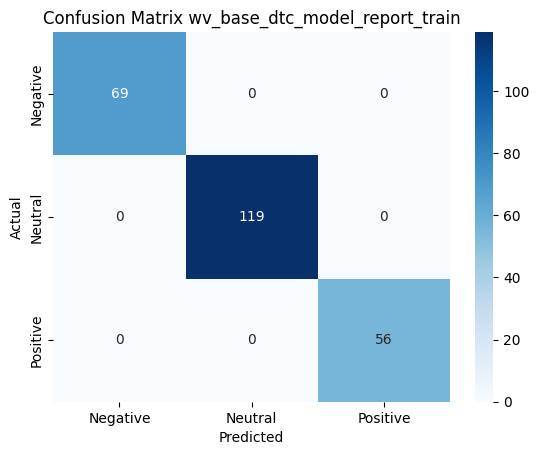

Training performance:
    Accuracy  Recall  Precision   F1                           Model
0       1.0     1.0        1.0  1.0  wv_base_dtc_model_report_train


In [137]:
# Define an DecisionTreeClassifier model
wv_base_dtc_model = DecisionTreeClassifier(random_state = 42)

# Fit the model on the train_data_word_vectors
wv_base_dtc_model.fit(train_data_word_vectors, train_labels)

# Plot the confusion matrix for the train_data_word_vectors
confusion_matrix(wv_base_dtc_model, train_data_word_vectors, train_labels, "wv_base_dtc_model_report_train")

# Calculate different metrics on train_data_word_vectors
wv_base_dtc_model_report_train = model_performance_classification_report(wv_base_dtc_model, train_data_word_vectors, train_labels, "wv_base_dtc_model_report_train")

# Print the dataframe wv_base_dtc_model_report_train
print("Training performance:\n", wv_base_dtc_model_report_train)

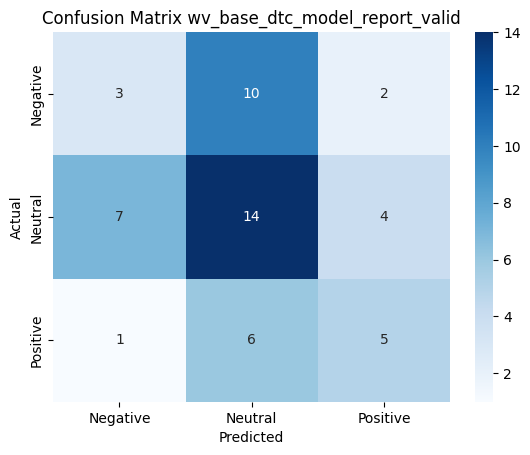

Validation performance:
    Accuracy    Recall  Precision        F1                           Model
0  0.423077  0.423077   0.407925  0.411658  wv_base_dtc_model_report_valid


In [138]:
# Use the model on valid_data_word_vectors
confusion_matrix(wv_base_dtc_model, valid_data_word_vectors, valid_labels, "wv_base_dtc_model_report_valid")

# Calculate different metrics on valid_data_word_vectors
wv_base_dtc_model_report_valid = model_performance_classification_report(wv_base_dtc_model, valid_data_word_vectors, valid_labels, "wv_base_dtc_model_report_valid")

# Print the dataframe wv_base_dtc_model_report_valid
print("Validation performance:\n", wv_base_dtc_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### RandomForestClassifier

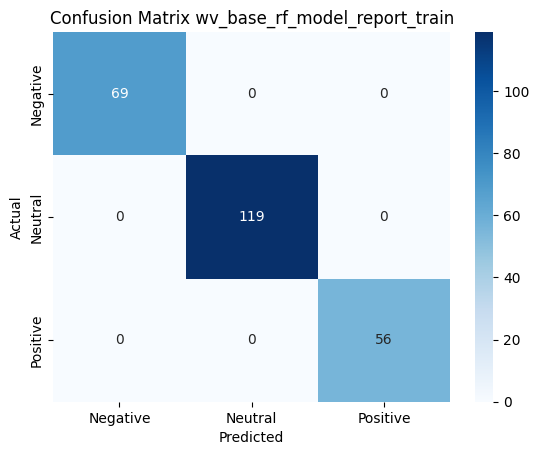

Training performance:
    Accuracy  Recall  Precision   F1                          Model
0       1.0     1.0        1.0  1.0  wv_base_rf_model_report_train


In [139]:
# Define an RandomForestClassifier model
wv_base_rf_model = RandomForestClassifier(random_state = 42)

# Fit the model on the train_data_word_vectors
wv_base_rf_model.fit(train_data_word_vectors, train_labels)

# Plot the confusion matrix for the train_data_word_vectors
confusion_matrix(wv_base_rf_model, train_data_word_vectors, train_labels, "wv_base_rf_model_report_train")

# Calculate different metrics on train_data_word_vectors
wv_base_rf_model_report_train = model_performance_classification_report(wv_base_rf_model, train_data_word_vectors, train_labels, "wv_base_rf_model_report_train")

# Print the dataframe wv_base_rf_model_report_train
print("Training performance:\n", wv_base_rf_model_report_train)

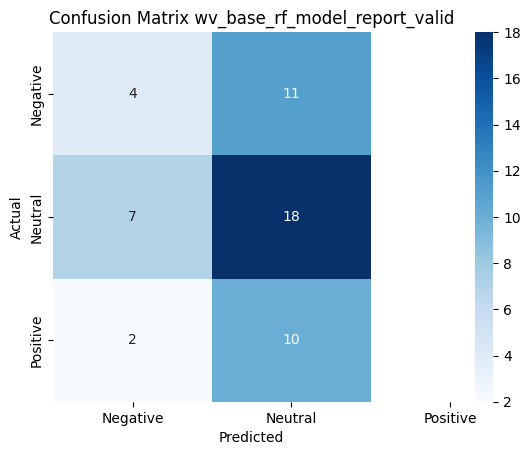

Validation performance:
    Accuracy    Recall  Precision       F1                          Model
0  0.423077  0.423077   0.310651  0.35285  wv_base_rf_model_report_valid


In [140]:
# Use the model on valid_data_word_vectors
confusion_matrix(wv_base_rf_model, valid_data_word_vectors, valid_labels, "wv_base_rf_model_report_valid")

# Calculate different metrics on valid_data_word_vectors
wv_base_rf_model_report_valid = model_performance_classification_report(wv_base_rf_model, valid_data_word_vectors, valid_labels, "wv_base_rf_model_report_valid")

# Print the dataframe wv_base_rf_model_report_valid
print("Validation performance:\n", wv_base_rf_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### AdaBoostClassifier

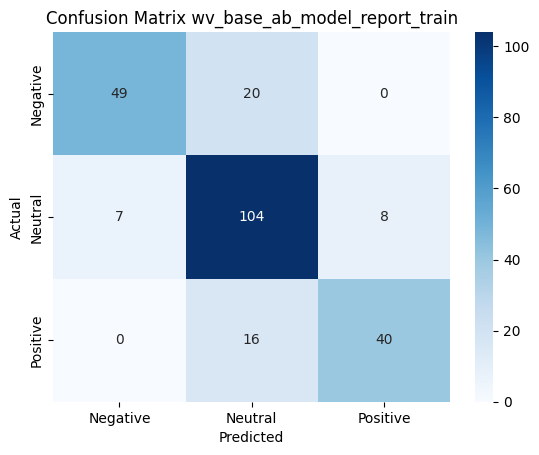

Training performance:
    Accuracy    Recall  Precision       F1                          Model
0  0.790984  0.790984    0.80099  0.78992  wv_base_ab_model_report_train


In [141]:
# Define an AdaboostClassifier model
wv_base_ab_model = AdaBoostClassifier(random_state = 42)

# Fit the model on the train_data_word_vectors
wv_base_ab_model.fit(train_data_word_vectors, train_labels)

# Plot the confusion matrix for the train_data_word_vectors
confusion_matrix(wv_base_ab_model, train_data_word_vectors, train_labels, "wv_base_ab_model_report_train")

# Calculate different metrics on train_data_word_vectors
wv_base_ab_model_report_train = model_performance_classification_report(wv_base_ab_model, train_data_word_vectors, train_labels, "wv_base_ab_model_report_train")

# Print the dataframe wv_base_ab_model_report_train
print("Training performance:\n", wv_base_ab_model_report_train)

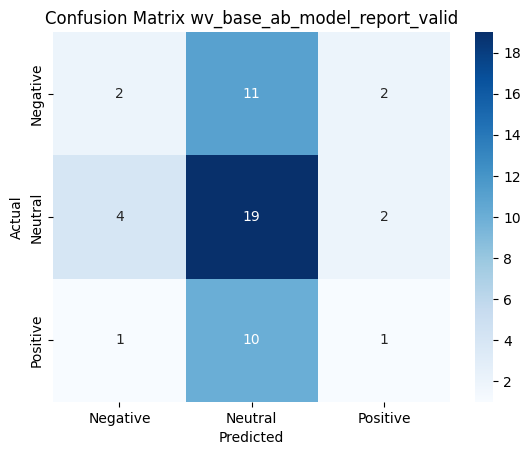

Validation performance:
    Accuracy    Recall  Precision        F1                          Model
0  0.423077  0.423077   0.356937  0.360662  wv_base_ab_model_report_valid


In [142]:
# Use the model on valid_data_word_vectors
confusion_matrix(wv_base_ab_model, valid_data_word_vectors, valid_labels, "wv_base_ab_model_report_valid")

# Calculate different metrics on valid_data_word_vectors
wv_base_ab_model_report_valid = model_performance_classification_report(wv_base_ab_model, valid_data_word_vectors, valid_labels, "wv_base_ab_model_report_valid")

# Print the dataframe wv_base_ab_model_report_valid
print("Validation performance:\n", wv_base_ab_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### GradientBoostingClassifier

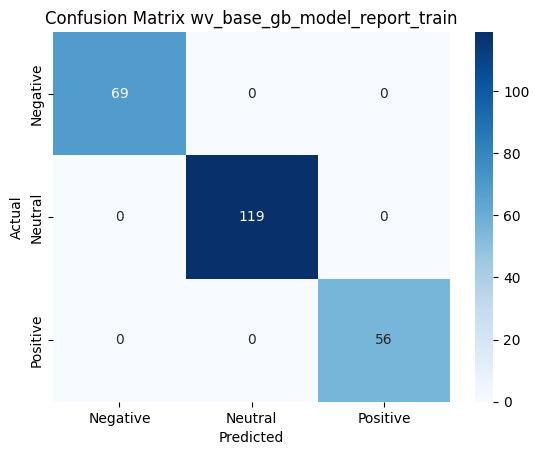

Training performance:
    Accuracy  Recall  Precision   F1                          Model
0       1.0     1.0        1.0  1.0  wv_base_gb_model_report_train


In [143]:
# Define an GradientBoostingClassifier model
wv_base_gb_model = GradientBoostingClassifier(random_state = 42)

# Fit the model on the train_data_word_vectors
wv_base_gb_model.fit(train_data_word_vectors, train_labels)

# Plot the confusion matrix for the train_data_word_vectors
confusion_matrix(wv_base_gb_model, train_data_word_vectors, train_labels, "wv_base_gb_model_report_train")

# Calculate different metrics on train_data_word_vectors
wv_base_gb_model_report_train = model_performance_classification_report(wv_base_gb_model, train_data_word_vectors, train_labels, "wv_base_gb_model_report_train")

# Print the dataframe wv_base_gb_model_report_train
print("Training performance:\n", wv_base_gb_model_report_train)

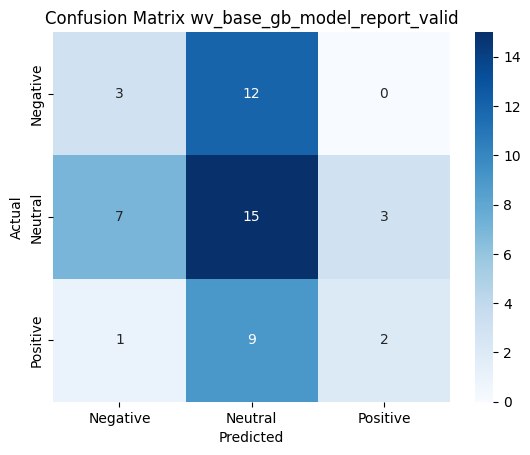

Validation performance:
    Accuracy    Recall  Precision        F1                          Model
0  0.384615  0.384615     0.3713  0.357311  wv_base_gb_model_report_valid


In [144]:
# Use the model on valid_data_word_vectors
confusion_matrix(wv_base_gb_model, valid_data_word_vectors, valid_labels, "wv_base_gb_model_report_valid")

# Calculate different metrics on valid_data_word_vectors
wv_base_gb_model_report_valid = model_performance_classification_report(wv_base_gb_model, valid_data_word_vectors, valid_labels, "wv_base_gb_model_report_valid")

# Print the dataframe wv_base_gb_model_report_valid
print("Validation performance:\n", wv_base_gb_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### XGBClassifier

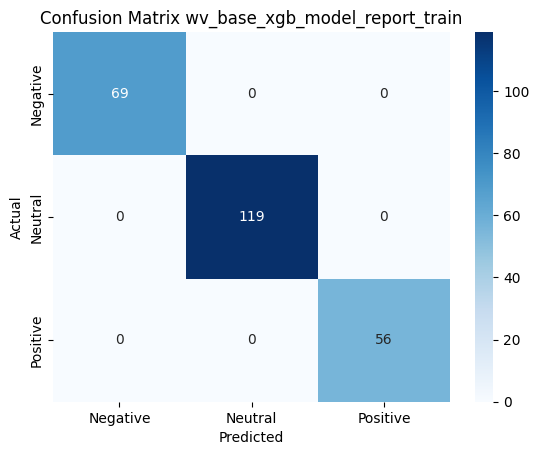

Training performance:
    Accuracy  Recall  Precision   F1                           Model
0       1.0     1.0        1.0  1.0  wv_base_xgb_model_report_train


In [145]:
# Define an XGBClassifier model
wv_base_xgb_model = XGBClassifier(random_state = 42)

# Fit the model on the train_data_word_vectors
wv_base_xgb_model.fit(train_data_word_vectors, train_labels_encoded)

# Plot the confusion matrix for the train_data_word_vectors
confusion_matrix(wv_base_xgb_model, train_data_word_vectors, train_labels_encoded, "wv_base_xgb_model_report_train")

# Calculate different metrics on train_data_word_vectors
wv_base_xgb_model_report_train = model_performance_classification_report(wv_base_xgb_model, train_data_word_vectors, train_labels_encoded, "wv_base_xgb_model_report_train")

# Print the dataframe wv_base_xgb_model_report_train
print("Training performance:\n", wv_base_xgb_model_report_train)

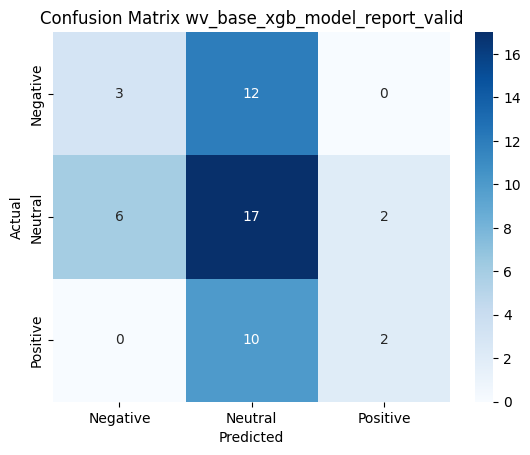

Validation performance:
    Accuracy    Recall  Precision        F1                           Model
0  0.423077  0.423077   0.421105  0.385216  wv_base_xgb_model_report_valid


In [146]:
# Use the model on valid_data_word_vectors
confusion_matrix(wv_base_xgb_model, valid_data_word_vectors, valid_labels_encoded, "wv_base_xgb_model_report_valid")

# Calculate different metrics on valid_data_word_vectors
wv_base_xgb_model_report_valid = model_performance_classification_report(wv_base_xgb_model, valid_data_word_vectors, valid_labels_encoded, "wv_base_xgb_model_report_valid")

# Print the dataframe wv_base_xgb_model_report_valid
print("Validation performance:\n", wv_base_xgb_model_report_valid)

**Observations:**
- The model appears to be overfitting.

### Build ML model with GloVe

#### DecisionTreeClassifier

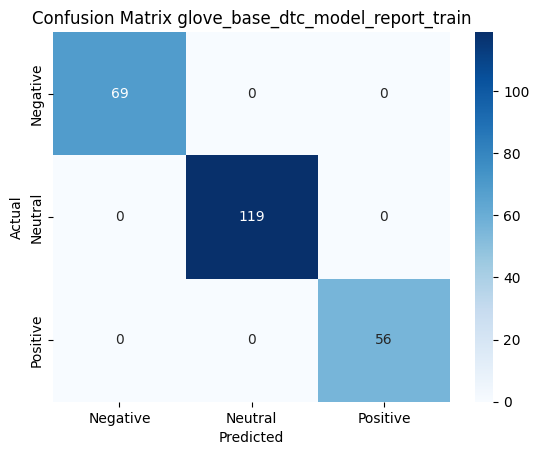

Training performance:
    Accuracy  Recall  Precision   F1                              Model
0       1.0     1.0        1.0  1.0  glove_base_dtc_model_report_train


In [147]:
# Define an DecisionTreeClassifier model
glove_base_dtc_model = DecisionTreeClassifier(random_state = 42)

# Fit the model on the train_data_glove
glove_base_dtc_model.fit(train_data_glove, train_labels)

# Plot the confusion matrix for the train_data_glove
confusion_matrix(glove_base_dtc_model, train_data_glove, train_labels, "glove_base_dtc_model_report_train")

# Calculate different metrics on train_data_glove
glove_base_dtc_model_report_train = model_performance_classification_report(glove_base_dtc_model, train_data_glove, train_labels, "glove_base_dtc_model_report_train")

# Print the dataframe glove_base_dtc_model_report_train
print("Training performance:\n", glove_base_dtc_model_report_train)

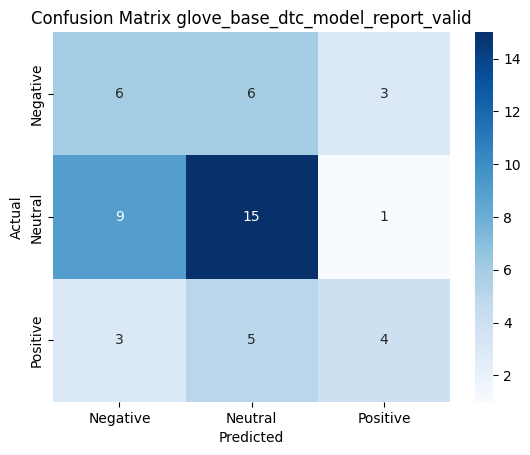

Validation performance:
    Accuracy    Recall  Precision        F1                              Model
0  0.480769  0.480769   0.488905  0.480008  glove_base_dtc_model_report_valid


In [148]:
# Use the model on valid_data_glove
confusion_matrix(glove_base_dtc_model, valid_data_glove, valid_labels, "glove_base_dtc_model_report_valid")

# Calculate different metrics on valid_data_glove
glove_base_dtc_model_report_valid = model_performance_classification_report(glove_base_dtc_model, valid_data_glove, valid_labels, "glove_base_dtc_model_report_valid")

# Print the dataframe glove_base_dtc_model_report_valid
print("Validation performance:\n", glove_base_dtc_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### RandomForestClassifier

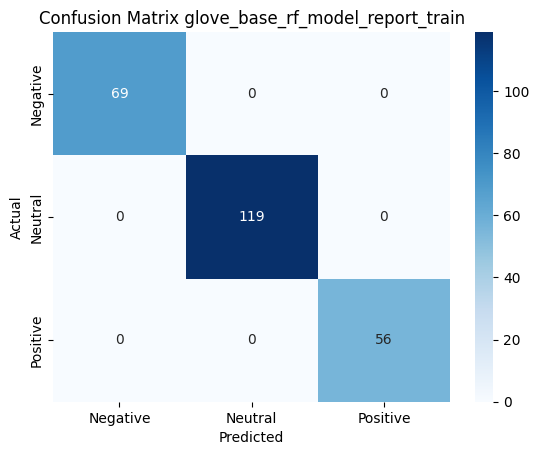

Training performance:
    Accuracy  Recall  Precision   F1                             Model
0       1.0     1.0        1.0  1.0  glove_base_rf_model_report_train


In [149]:
# Define an AdaBoostClassifier model
glove_base_rf_model = RandomForestClassifier(random_state = 42)

# Fit the model on the train_data_glove
glove_base_rf_model.fit(train_data_glove, train_labels)

# Plot the confusion matrix for the train_data_glove
confusion_matrix(glove_base_rf_model, train_data_glove, train_labels, "glove_base_rf_model_report_train")

# Calculate different metrics on train_data_glove
glove_base_rf_model_report_train = model_performance_classification_report(glove_base_rf_model, train_data_glove, train_labels, "glove_base_rf_model_report_train")

# Print the dataframe glove_base_rf_model_report_train
print("Training performance:\n", glove_base_rf_model_report_train)

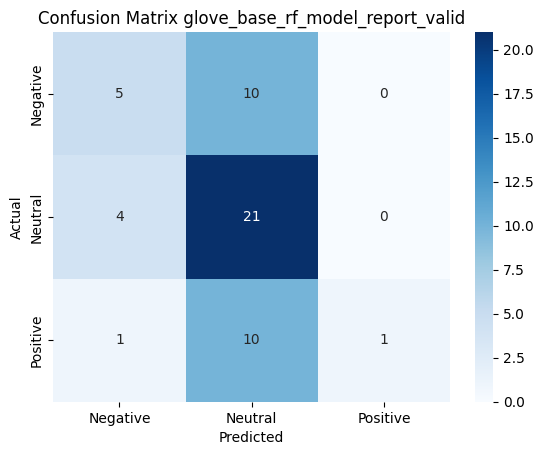

Validation performance:
    Accuracy    Recall  Precision        F1                             Model
0  0.519231  0.519231   0.621248  0.456832  glove_base_rf_model_report_valid


In [150]:
# Use the model on valid_data_glove
confusion_matrix(glove_base_rf_model, valid_data_glove, valid_labels, "glove_base_rf_model_report_valid")

# Calculate different metrics on valid_data_glove
glove_base_rf_model_report_valid = model_performance_classification_report(glove_base_rf_model, valid_data_glove, valid_labels, "glove_base_rf_model_report_valid")

# Print the dataframe glove_base_rf_model_report_valid
print("Validation performance:\n", glove_base_rf_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### AdaBoostClassifier

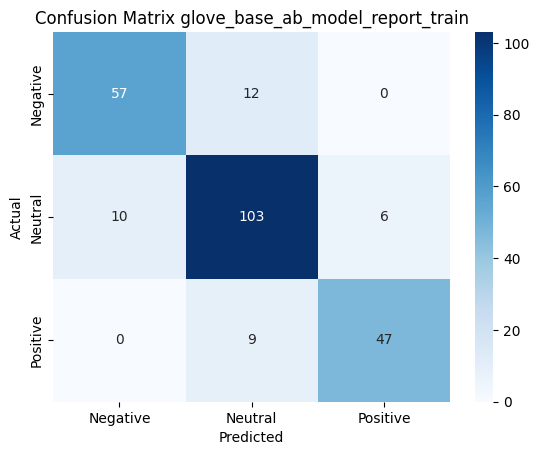

Training performance:
    Accuracy    Recall  Precision        F1                             Model
0  0.848361  0.848361   0.849216  0.848412  glove_base_ab_model_report_train


In [151]:
# Define an AdaBoostClassifier model
glove_base_ab_model = AdaBoostClassifier(random_state = 42)

# Fit the model on the train_data_glove
glove_base_ab_model.fit(train_data_glove, train_labels)

# Plot the confusion matrix for the train_data_glove
confusion_matrix(glove_base_ab_model, train_data_glove, train_labels, "glove_base_ab_model_report_train")

# Calculate different metrics on train_data_glove
glove_base_ab_model_report_train = model_performance_classification_report(glove_base_ab_model, train_data_glove, train_labels, "glove_base_ab_model_report_train")

# Print the dataframe glove_base_ab_model_report_train
print("Training performance:\n", glove_base_ab_model_report_train)

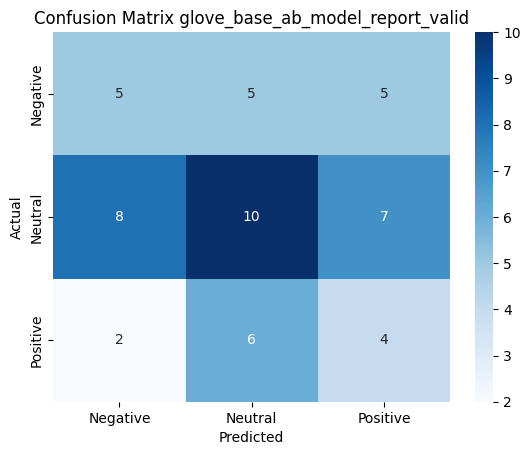

Validation performance:
    Accuracy    Recall  Precision        F1                             Model
0  0.365385  0.365385   0.382784  0.371118  glove_base_ab_model_report_valid


In [152]:
# Use the model on valid_data_glove
confusion_matrix(glove_base_ab_model, valid_data_glove, valid_labels, "glove_base_ab_model_report_valid")

# Calculate different metrics on valid_data_glove
glove_base_ab_model_report_valid = model_performance_classification_report(glove_base_ab_model, valid_data_glove, valid_labels, "glove_base_ab_model_report_valid")

# Print the dataframe glove_base_ab_model_report_valid
print("Validation performance:\n", glove_base_ab_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### GradientBoostingClassifier

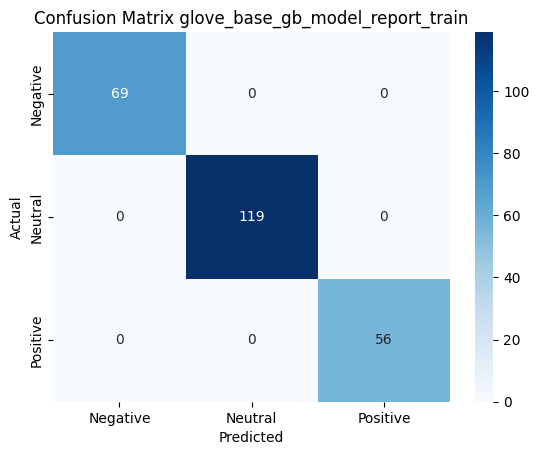

Training performance:
    Accuracy  Recall  Precision   F1                             Model
0       1.0     1.0        1.0  1.0  glove_base_gb_model_report_train


In [153]:
# Define an GradientBoosting model
glove_base_gb_model = GradientBoostingClassifier(random_state = 42)

# Fit the model on the train_data_glove
glove_base_gb_model.fit(train_data_glove, train_labels)

# Plot the confusion matrix for the train_data_glove
confusion_matrix(glove_base_gb_model, train_data_glove, train_labels, "glove_base_gb_model_report_train")

# Calculate different metrics on train_data_glove
glove_base_gb_model_report_train = model_performance_classification_report(glove_base_gb_model, train_data_glove, train_labels, "glove_base_gb_model_report_train")

# Print the dataframe glove_base_gb_model_report_train
print("Training performance:\n", glove_base_gb_model_report_train)

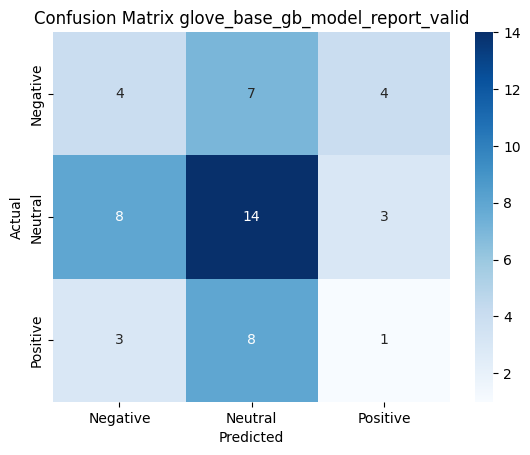

Validation performance:
    Accuracy    Recall  Precision        F1                             Model
0  0.365385  0.365385   0.337865  0.349288  glove_base_gb_model_report_valid


In [154]:
# Use the model on valid_data_glove
confusion_matrix(glove_base_gb_model, valid_data_glove, valid_labels, "glove_base_gb_model_report_valid")

# Calculate different metrics on valid_data_glove
glove_base_gb_model_report_valid = model_performance_classification_report(glove_base_gb_model, valid_data_glove, valid_labels, "glove_base_gb_model_report_valid")

# Print the dataframe glove_base_gb_model_report_valid
print("Validation performance:\n", glove_base_gb_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### XGBClassifier

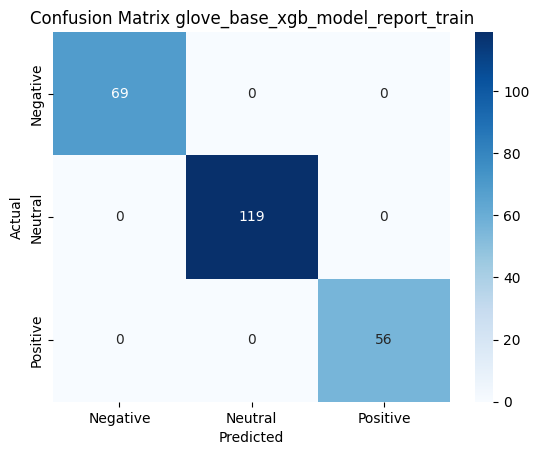

Training performance:
    Accuracy  Recall  Precision   F1                              Model
0       1.0     1.0        1.0  1.0  glove_base_xgb_model_report_train


In [155]:
# Define an XGBClassifier model
glove_base_xgb_model = XGBClassifier(random_state = 42)

# Fit the model on the train_data_glove
glove_base_xgb_model.fit(train_data_glove, train_labels_encoded)

# Plot the confusion matrix for the train_data_glove
confusion_matrix(glove_base_xgb_model, train_data_glove, train_labels_encoded, "glove_base_xgb_model_report_train")

# Calculate different metrics on train_data_glove
glove_base_xgb_model_report_train = model_performance_classification_report(glove_base_xgb_model, train_data_glove, train_labels_encoded, "glove_base_xgb_model_report_train")

# Print the dataframe glove_base_xgb_model_report_train
print("Training performance:\n", glove_base_xgb_model_report_train)

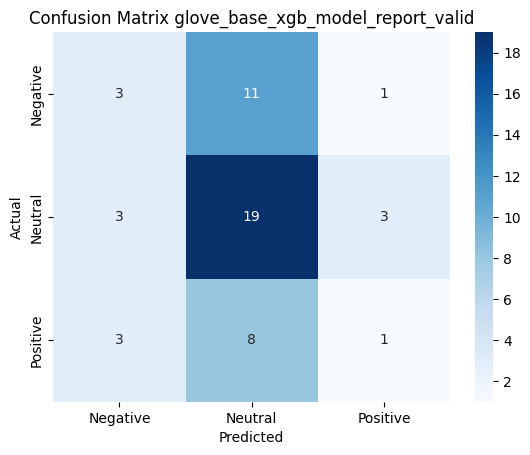

Validation performance:
    Accuracy    Recall  Precision        F1                              Model
0  0.442308  0.442308   0.382692  0.389252  glove_base_xgb_model_report_valid


In [156]:
# Use the model on valid_data_glove
confusion_matrix(glove_base_xgb_model, valid_data_glove, valid_labels_encoded, "glove_base_xgb_model_report_valid")

# Calculate different metrics on valid_data_glove
glove_base_xgb_model_report_valid = model_performance_classification_report(glove_base_xgb_model, valid_data_glove, valid_labels_encoded, "glove_base_xgb_model_report_valid")

# Print the dataframe glove_base_xgb_model_report_valid
print("Validation performance:\n", glove_base_xgb_model_report_valid)

**Observations:**
- The model appears to be overfitting.

### Build ML model with Sentence Transformer

#### DecisionTreeClassifier

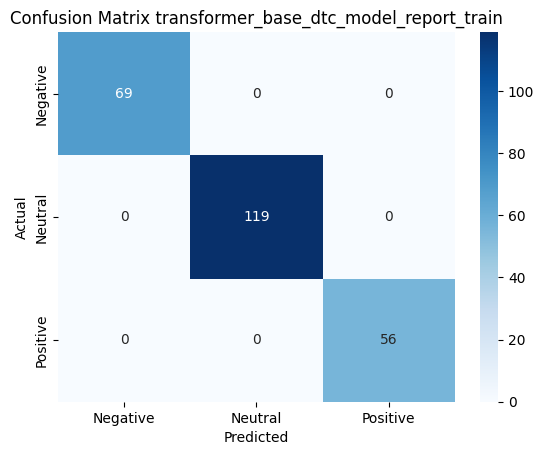

Training performance:
    Accuracy  Recall  Precision   F1                                    Model
0       1.0     1.0        1.0  1.0  transformer_base_dtc_model_report_train


In [157]:
# Define an DecisionTreeClassifier model
transformer_base_dtc_model = DecisionTreeClassifier(random_state = 42)

# Fit the model on the train_data_transformer
transformer_base_dtc_model.fit(train_data_transformer, train_labels)

# Plot the confusion matrix for the train_data_transformer
confusion_matrix(transformer_base_dtc_model, train_data_transformer, train_labels, "transformer_base_dtc_model_report_train")

# Calculate different metrics on train_data_transformer
transformer_base_dtc_model_report_train = model_performance_classification_report(transformer_base_dtc_model, train_data_transformer, train_labels, "transformer_base_dtc_model_report_train")

# Print the dataframe transformer_base_dtc_model_report_train
print("Training performance:\n", transformer_base_dtc_model_report_train)

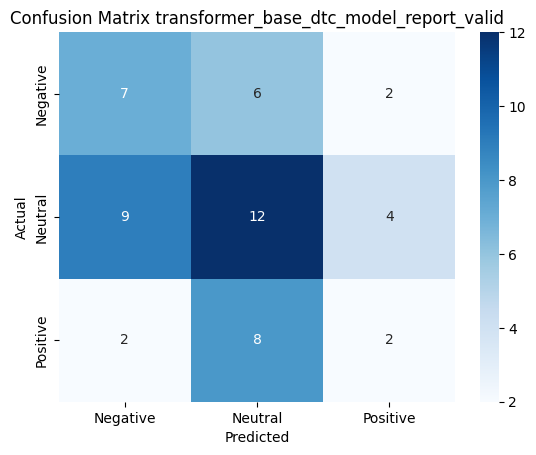

Validation performance:
    Accuracy    Recall  Precision        F1  \
0  0.403846  0.403846   0.391765  0.394776   

                                     Model  
0  transformer_base_dtc_model_report_valid  


In [158]:
# Use the model on valid_data_transformer
confusion_matrix(transformer_base_dtc_model, valid_data_transformer, valid_labels, "transformer_base_dtc_model_report_valid")

# Calculate different metrics on valid_data_transformer
transformer_base_dtc_model_report_valid = model_performance_classification_report(transformer_base_dtc_model, valid_data_transformer, valid_labels, "transformer_base_dtc_model_report_valid")

# Print the dataframe transformer_base_dtc_model_report_valid
print("Validation performance:\n", transformer_base_dtc_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### RandomForestClassifier

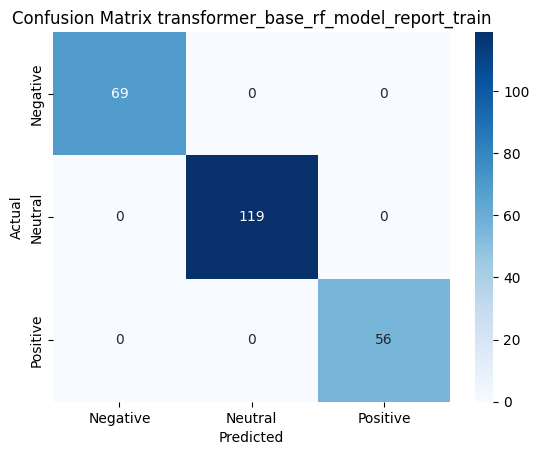

Training performance:
    Accuracy  Recall  Precision   F1                                   Model
0       1.0     1.0        1.0  1.0  transformer_base_rf_model_report_train


In [159]:
# Define an AdaBoostClassifier model
transformer_base_rf_model = RandomForestClassifier(random_state = 42)

# Fit the model on the train_data_transformer
transformer_base_rf_model.fit(train_data_transformer, train_labels)

# Plot the confusion matrix for the train_data_transformer
confusion_matrix(transformer_base_rf_model, train_data_transformer, train_labels, "transformer_base_rf_model_report_train")

# Calculate different metrics on train_data_transformer
transformer_base_rf_model_report_train = model_performance_classification_report(transformer_base_rf_model, train_data_transformer, train_labels, "transformer_base_rf_model_report_train")

# Print the dataframe sentence_transformer_base_rf_model_report_train
print("Training performance:\n", transformer_base_rf_model_report_train)

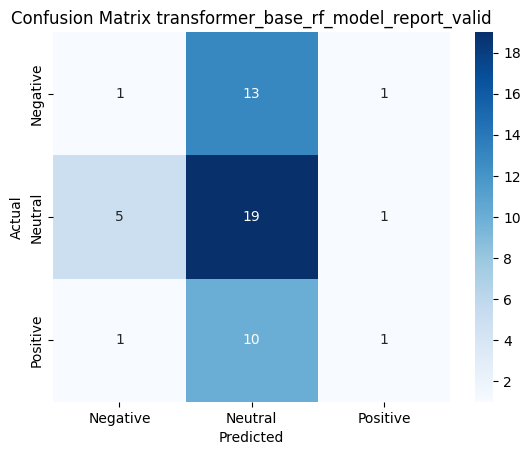

Validation performance:
    Accuracy    Recall  Precision        F1  \
0  0.403846  0.403846   0.335623  0.329668   

                                    Model  
0  transformer_base_rf_model_report_valid  


In [160]:
# Use the model on valid_data_transformer
confusion_matrix(transformer_base_rf_model, valid_data_transformer, valid_labels, "transformer_base_rf_model_report_valid")

# Calculate different metrics on valid_data_transformer
transformer_base_rf_model_report_valid = model_performance_classification_report(transformer_base_rf_model, valid_data_transformer, valid_labels, "transformer_base_rf_model_report_valid")

# Print the dataframe transformer_base_rf_model_report_valid
print("Validation performance:\n", transformer_base_rf_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### AdaBoostClassifier

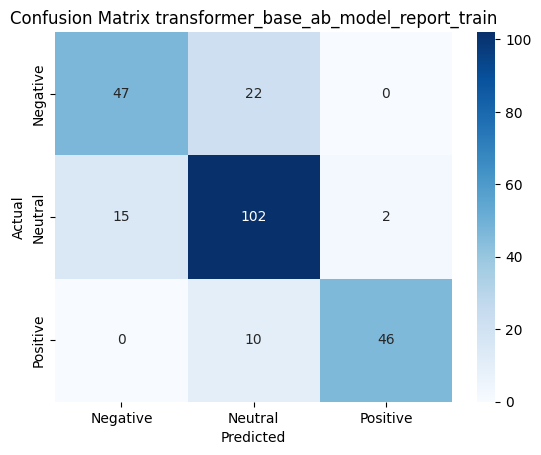

Training performance:
    Accuracy   Recall  Precision       F1  \
0   0.79918  0.79918   0.805554  0.79919   

                                    Model  
0  transformer_base_ab_model_report_train  


In [161]:
# Define an AdaBoostClassifier model
transformer_base_ab_model = AdaBoostClassifier(random_state = 42)

# Fit the model on the train_data_transformer
transformer_base_ab_model.fit(train_data_transformer, train_labels)

# Plot the confusion matrix for the train_data_transformer
confusion_matrix(transformer_base_ab_model, train_data_transformer, train_labels, "transformer_base_ab_model_report_train")

# Calculate different metrics on train_data_transformer
transformer_base_ab_model_report_train = model_performance_classification_report(transformer_base_ab_model, train_data_transformer, train_labels, "transformer_base_ab_model_report_train")

# Print the dataframe sentence_transformer_base_ab_model_report_train
print("Training performance:\n", transformer_base_ab_model_report_train)

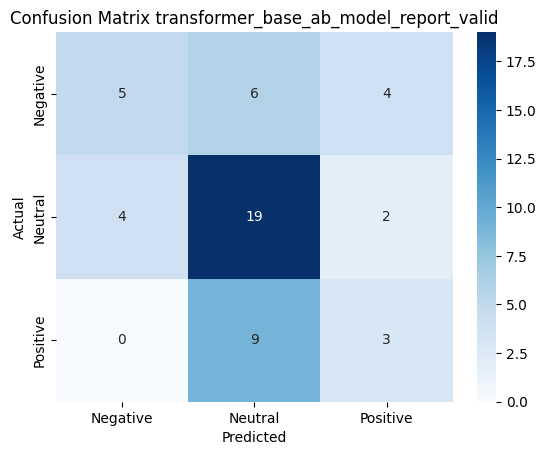

Validation performance:
    Accuracy    Recall  Precision        F1  \
0  0.519231  0.519231   0.505845  0.495774   

                                    Model  
0  transformer_base_ab_model_report_valid  


In [162]:
# Use the model on valid_data_transformer
confusion_matrix(transformer_base_ab_model, valid_data_transformer, valid_labels, "transformer_base_ab_model_report_valid")

# Calculate different metrics on valid_data_transformer
transformer_base_ab_model_report_valid = model_performance_classification_report(transformer_base_ab_model, valid_data_transformer, valid_labels, "transformer_base_ab_model_report_valid")

# Print the dataframe transformer_base_ab_model_report_valid
print("Validation performance:\n", transformer_base_ab_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### GradientBoostingClassifier

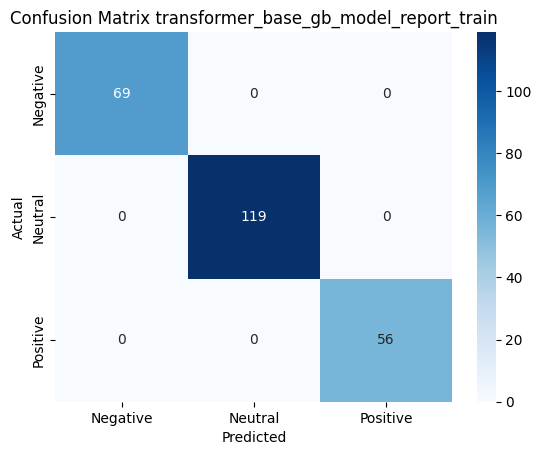

Training performance:
    Accuracy  Recall  Precision   F1                                   Model
0       1.0     1.0        1.0  1.0  transformer_base_gb_model_report_train


In [163]:
# Define an GradientBoostingClassifier model
transformer_base_gb_model = GradientBoostingClassifier(random_state = 42)

# Fit the model on the train_data_transformer
transformer_base_gb_model.fit(train_data_transformer, train_labels)

# Plot the confusion matrix for the train_data_transformer
confusion_matrix(transformer_base_gb_model, train_data_transformer, train_labels, "transformer_base_gb_model_report_train")

# Calculate different metrics on train_data_transformer
transformer_base_gb_model_report_train = model_performance_classification_report(transformer_base_gb_model, train_data_transformer, train_labels, "transformer_base_gb_model_report_train")

# Print the dataframe transformer_base_gb_model_report_train
print("Training performance:\n", transformer_base_gb_model_report_train)

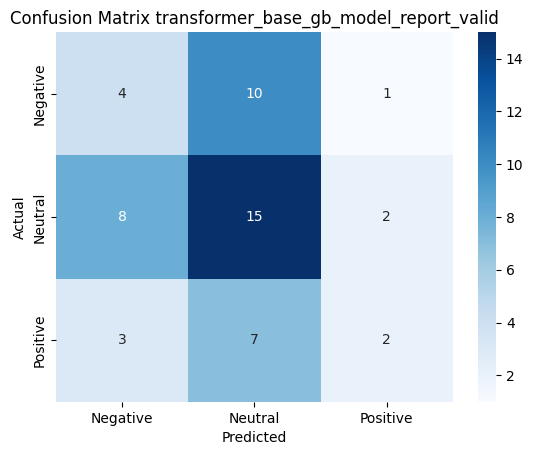

Validation performance:
    Accuracy    Recall  Precision        F1  \
0  0.403846  0.403846   0.394591  0.384258   

                                    Model  
0  transformer_base_gb_model_report_valid  


In [164]:
# Use the model on valid_data_transformer
confusion_matrix(transformer_base_gb_model, valid_data_transformer, valid_labels, "transformer_base_gb_model_report_valid")

# Calculate different metrics on valid_data_transformer
transformer_base_gb_model_report_valid = model_performance_classification_report(transformer_base_gb_model, valid_data_transformer, valid_labels, "transformer_base_gb_model_report_valid")

# Print the dataframe transformer_base_gb_model_report_valid
print("Validation performance:\n", transformer_base_gb_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### XGBClassifier

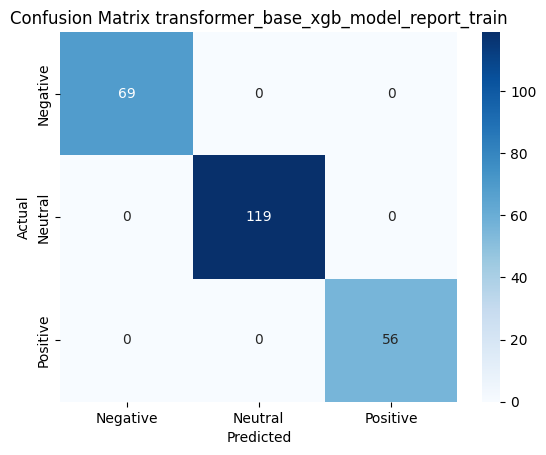

Training performance:
    Accuracy  Recall  Precision   F1                                    Model
0       1.0     1.0        1.0  1.0  transformer_base_xgb_model_report_train


In [165]:
# Define an XGBoostClassifier model
transformer_base_xgb_model = XGBClassifier(random_state = 42)

# Fit the model on the train_data_transformer
transformer_base_xgb_model.fit(train_data_transformer, train_labels_encoded)

# Plot the confusion matrix for the train_data_transformer
confusion_matrix(transformer_base_xgb_model, train_data_transformer, train_labels_encoded, "transformer_base_xgb_model_report_train")

# Calculate different metrics on train_data_transformer
transformer_base_xgb_model_report_train = model_performance_classification_report(transformer_base_xgb_model, train_data_transformer, train_labels_encoded, "transformer_base_xgb_model_report_train")

# Print the dataframe transformer_base_xgb_model_report_train
print("Training performance:\n", transformer_base_xgb_model_report_train)

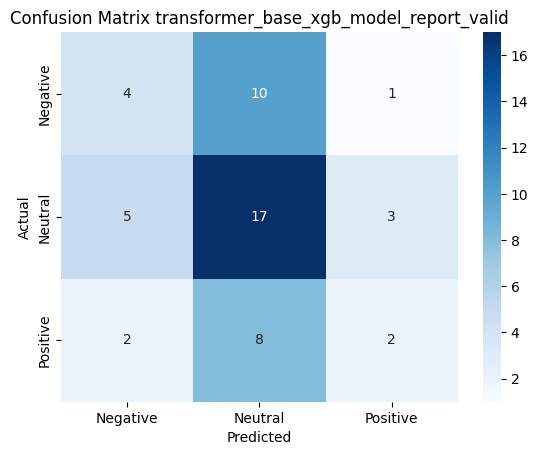

Validation performance:
    Accuracy    Recall  Precision        F1  \
0  0.442308  0.442308   0.415335  0.412475   

                                     Model  
0  transformer_base_xgb_model_report_valid  


In [166]:
# Use the model on valid_data_transformer
confusion_matrix(transformer_base_xgb_model, valid_data_transformer, valid_labels, "transformer_base_xgb_model_report_valid")

# Calculate different metrics on valid_data_transformer
transformer_base_xgb_model_report_valid = model_performance_classification_report(transformer_base_xgb_model, valid_data_transformer, valid_labels_encoded, "transformer_base_xgb_model_report_valid")

# Print the dataframe transformer_base_xgb_model_report_valid
print("Validation performance:\n", transformer_base_xgb_model_report_valid)

**Observations:**
- The model appears to be overfitting.

### Tune ML model with Word2Vec

#### DecisionTreeClassifier

In [167]:
# Define the parameter_grid
parameter_grid = {
    # Function to measure quality of a split
    "criterion": ["gini", "entropy"],  

    # Depth of the tree (None allows full depth)
    "max_depth": [5, 10, 15, 20, None],  

    # Minimum samples needed to split a node
    "min_samples_split": [2, 5, 10],  

    # Minimum samples required at a leaf node
    "min_samples_leaf": [1, 2, 5, 10],  

    # Number of features to consider for best split
    "max_features": ["sqrt", "log2", None]  
}

# Initiate a XGBClassifier
wv_tune_dtc_grid = DecisionTreeClassifier(random_state = 42)

# Initialize the grid_search
wv_tune_dtc_grid_search = GridSearchCV(estimator = wv_tune_dtc_grid, param_grid = parameter_grid, scoring = "f1_weighted", cv = 5, verbose = 1, n_jobs = -1)

# Train the data
wv_tune_dtc_grid_result = wv_tune_dtc_grid_search.fit(train_data_word_vectors, train_labels)

# Print the best parameters
print("Best parameters:", wv_tune_dtc_grid_search.best_params_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Best parameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}


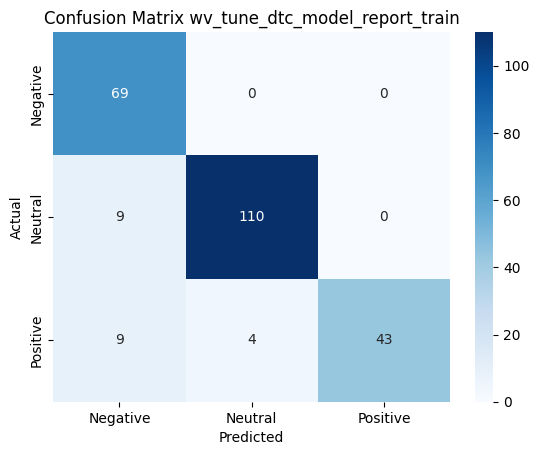

Training performance:
    Accuracy    Recall  Precision        F1                           Model
0  0.909836  0.909836    0.92438  0.910022  wv_tune_dtc_model_report_train


In [168]:
# Set the classification to the best combination of parameters
best_params = wv_tune_dtc_grid_search.best_params_

# Create the tuned model
wv_tune_dtc_model = DecisionTreeClassifier(**best_params, random_state = 42)

# Fit the best algorithm to the data.
wv_tune_dtc_model.fit(train_data_word_vectors, train_labels)

# Plot the confusion matrix for the train_data_word_vectors
confusion_matrix(wv_tune_dtc_model, train_data_word_vectors, train_labels, "wv_tune_dtc_model_report_train")

# Calculate different metrics on train_data_word_vectors
wv_tune_dtc_model_report_train = model_performance_classification_report(wv_tune_dtc_model, train_data_word_vectors, train_labels, "wv_tune_dtc_model_report_train")

# Print the dataframe wv_tune_dtc_model_report_train
print("Training performance:\n", wv_tune_dtc_model_report_train)

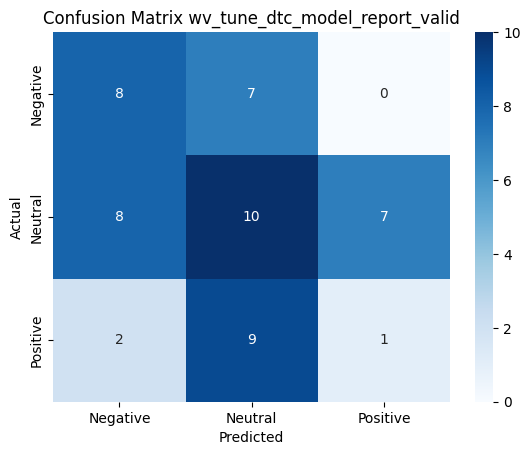

Validation performance:
    Accuracy    Recall  Precision        F1                           Model
0  0.365385  0.365385   0.341963  0.351474  wv_tune_dtc_model_report_valid


In [169]:
# Plot the confusion matrix for the valid_data_word_vectors
confusion_matrix(wv_tune_dtc_model, valid_data_word_vectors, valid_labels, "wv_tune_dtc_model_report_valid")

# Calculate different metrics on valid_data_word_vectors
wv_tune_dtc_model_report_valid = model_performance_classification_report(wv_tune_dtc_model, valid_data_word_vectors, valid_labels, "wv_tune_dtc_model_report_valid")

# Print the dataframe wv_tune_dtc_model_report_valid
print("Validation performance:\n", wv_tune_dtc_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### RandomForestClassifier

In [170]:
# Define the parameter_grid
parameter_grid = {
    
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "criterion": ["gini", "entropy"]
}

# Initiate a AdaBoostClassifier
wv_tune_rf_grid = RandomForestClassifier(random_state = 42)

# Initialize the grid_search
wv_tune_rf_grid_search = GridSearchCV(estimator = wv_tune_rf_grid, param_grid = parameter_grid, scoring = "f1_weighted", cv = 5, verbose = 1, n_jobs = -1)

# Train the data
wv_tune_rf_grid_result = wv_tune_rf_grid_search.fit(train_data_word_vectors, train_labels)

# Print the best parameters
print("Best parameters:", wv_tune_rf_grid_result.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}


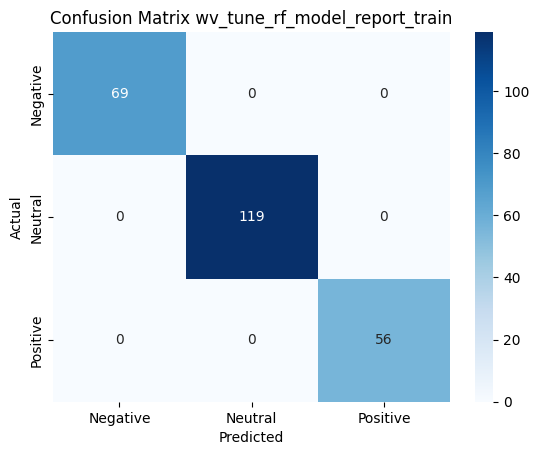

Training performance:
    Accuracy  Recall  Precision   F1                          Model
0       1.0     1.0        1.0  1.0  wv_tune_rf_model_report_train


In [171]:
# Set the classification to the best combination of parameters
best_params = wv_tune_rf_grid_search.best_params_

# Create the tuned model
wv_tune_rf_model = RandomForestClassifier(**best_params, random_state = 42)

# Fit the best algorithm to the data.
wv_tune_rf_model.fit(train_data_word_vectors, train_labels)

# Plot the confusion matrix for the train_data_word_vectors
confusion_matrix(wv_tune_rf_model, train_data_word_vectors, train_labels, "wv_tune_rf_model_report_train")

# Calculate different metrics on train_data_word_vectors
wv_tune_rf_model_report_train = model_performance_classification_report(wv_tune_rf_model, train_data_word_vectors, train_labels, "wv_tune_rf_model_report_train")

# Print the dataframe wv_tune_rf_model_report_train
print("Training performance:\n", wv_tune_rf_model_report_train)

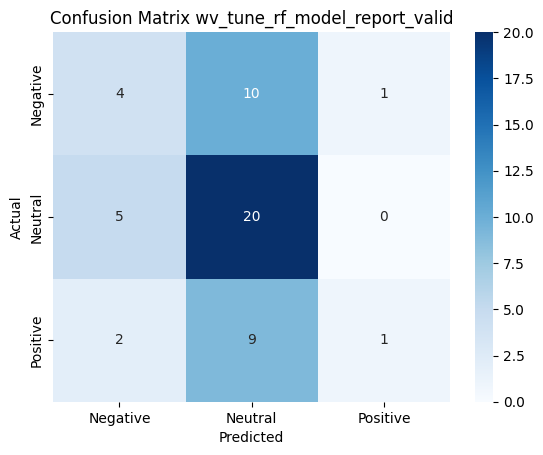

Validation performance:
    Accuracy    Recall  Precision        F1                          Model
0  0.480769  0.480769   0.466828  0.422205  wv_tune_rf_model_report_valid


In [172]:
# Plot the confusion matrix for the valid_data_word_vectors
confusion_matrix(wv_tune_rf_model, valid_data_word_vectors, valid_labels, "wv_tune_rf_model_report_valid")

# Calculate different metrics on valid_data_word_vectors
wv_tune_rf_model_report_valid = model_performance_classification_report(wv_tune_rf_model, valid_data_word_vectors, valid_labels, "wv_tune_rf_model_report_valid")

# Print the dataframe wv_tune_rf_model_report_valid
print("Validation performance:\n", wv_tune_rf_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### AdaBoostClassifier

In [173]:
# Define the parameter_grid
parameter_grid = {

  # Number of boosting rounds
  "n_estimators": [50, 100, 200],

  # Step size shrinkage
  "learning_rate": [0.01, 0.1, 1.0]
}

# Initiate a AdaBoostClassifier
wv_tune_ada_grid = AdaBoostClassifier(random_state = 42)

# Initialize the grid_search
wv_tune_ab_grid_search = GridSearchCV(estimator = wv_tune_ada_grid, param_grid = parameter_grid, scoring = "f1_weighted", cv = 5, verbose = 1, n_jobs = -1)

# Train the data
wv_tune_ab_grid_result = wv_tune_ab_grid_search.fit(train_data_word_vectors, train_labels)

# Print the best parameters
print("Best parameters:", wv_tune_ab_grid_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Best parameters: {'learning_rate': 0.1, 'n_estimators': 200}


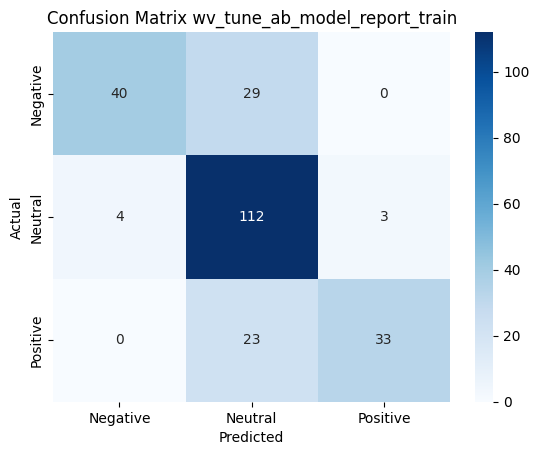

Training performance:
    Accuracy    Recall  Precision        F1                          Model
0  0.758197  0.758197   0.800528  0.750878  wv_tune_ab_model_report_train


In [174]:
# Set the classification to the best combination of parameters
best_params = wv_tune_ab_grid_search.best_params_

# Create the tuned model
wv_tune_ab_model = AdaBoostClassifier(**best_params, random_state = 42)

# Fit the best algorithm to the data.
wv_tune_ab_model.fit(train_data_word_vectors, train_labels)

# Plot the confusion matrix for the train_data_word_vectors
confusion_matrix(wv_tune_ab_model, train_data_word_vectors, train_labels, "wv_tune_ab_model_report_train")

# Calculate different metrics on train_data_word_vectors
wv_tune_ab_model_report_train = model_performance_classification_report(wv_tune_ab_model, train_data_word_vectors, train_labels, "wv_tune_ab_model_report_train")

# Print the dataframe wv_base_ab_model_report_train
print("Training performance:\n", wv_tune_ab_model_report_train)

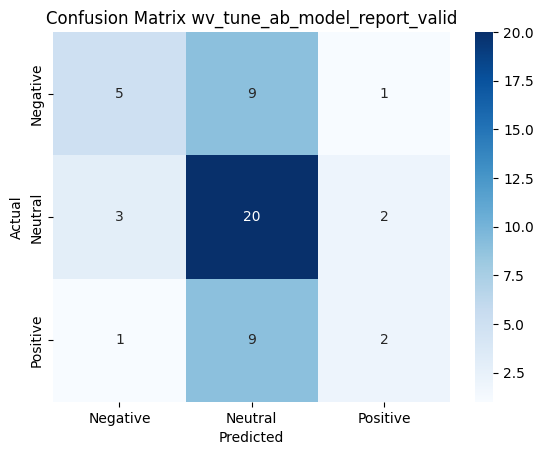

Validation performance:
    Accuracy    Recall  Precision        F1                          Model
0  0.519231  0.519231   0.505601  0.479741  wv_tune_ab_model_report_valid


In [175]:
# Plot the confusion matrix for the valid_data_word_vectors
confusion_matrix(wv_tune_ab_model, valid_data_word_vectors, valid_labels, "wv_tune_ab_model_report_valid")

# Calculate different metrics on valid_data_word_vectors
wv_tune_ab_model_report_valid = model_performance_classification_report(wv_tune_ab_model, valid_data_word_vectors, valid_labels, "wv_tune_ab_model_report_valid")

# Print the dataframe wv_tune_ab_model_report_valid
print("Validation performance:\n", wv_tune_ab_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### GradientBoostingClassifier

In [176]:
# Define the parameter_grid
parameter_grid = {
    
    # Number of boosting rounds
    "n_estimators": [100, 200, 300],

    # Shrinkage parameter
    "learning_rate": [0.01, 0.1, 0.2]
}

# Initiate a XGBClassifier
wv_tune_gb_grid = GradientBoostingClassifier(random_state = 42)

# Initialize the grid_search
wv_tune_gb_grid_search = GridSearchCV(estimator = wv_tune_gb_grid, param_grid = parameter_grid, scoring = "f1_weighted", cv = 5, verbose = 1, n_jobs = -1)

# Train the data
wv_tune_gb_grid_result = wv_tune_gb_grid_search.fit(train_data_word_vectors, train_labels)

# Print the best parameters
print("Best parameters:", wv_tune_gb_grid_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'learning_rate': 0.2, 'n_estimators': 100}


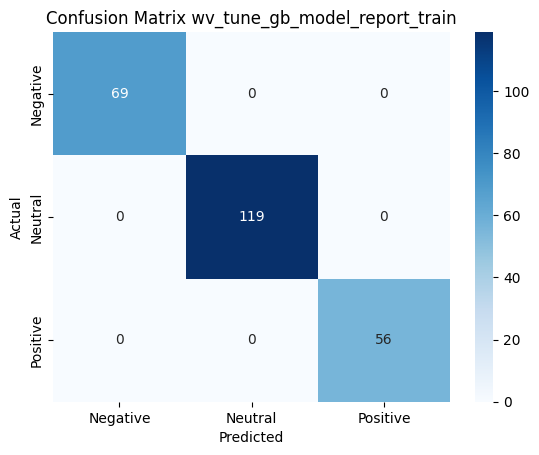

Training performance:
    Accuracy  Recall  Precision   F1                          Model
0       1.0     1.0        1.0  1.0  wv_tune_gb_model_report_train


In [177]:
# Set the classification to the best combination of parameters
best_params = wv_tune_gb_grid_search.best_params_

# Create the tuned model
wv_tune_gb_model = GradientBoostingClassifier(**best_params, random_state = 42)

# Fit the best algorithm to the data.
wv_tune_gb_model.fit(train_data_word_vectors, train_labels)

# Plot the confusion matrix for the train_data_word_vectors
confusion_matrix(wv_tune_gb_model, train_data_word_vectors, train_labels, "wv_tune_gb_model_report_train")

# Calculate different metrics on train_data_word_vectors
wv_tune_gb_model_report_train = model_performance_classification_report(wv_tune_gb_model, train_data_word_vectors, train_labels, "wv_tune_gb_model_report_train")

# Print the dataframe wv_tune_xgb_model_report_train
print("Training performance:\n", wv_tune_gb_model_report_train)

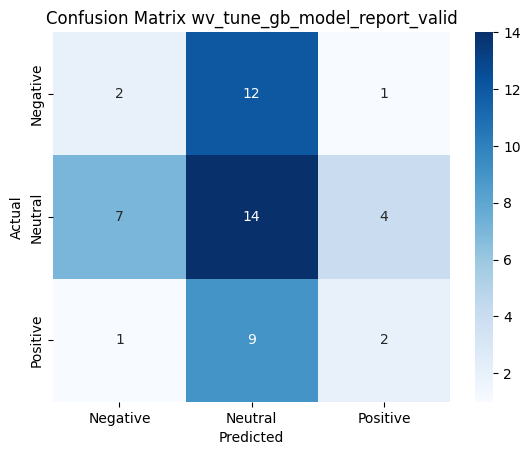

Validation performance:
    Accuracy    Recall  Precision        F1                          Model
0  0.346154  0.346154   0.315934  0.319096  wv_tune_gb_model_report_valid


In [178]:
# Plot the confusion matrix for the valid_data_word_vectors
confusion_matrix(wv_tune_gb_model, valid_data_word_vectors, valid_labels, "wv_tune_gb_model_report_valid")

# Calculate different metrics on valid_data_word_vectors
wv_tune_gb_model_report_valid = model_performance_classification_report(wv_tune_gb_model, valid_data_word_vectors, valid_labels, "wv_tune_gb_model_report_valid")

# Print the dataframe wv_tune_gb_model_report_valid
print("Validation performance:\n", wv_tune_gb_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### XGBClassifier

In [179]:
# Define the parameter_grid
parameter_grid = {

  # Number of boosting rounds
  "n_estimators": [50, 100, 200],

  # Step size shrinkage
  "learning_rate": [0.01, 0.1, 0.3],

  # Define max_depth
  "max_depth": [3, 5, 7],

  # Define subsample
  "subsample": [0.6, 0.8, 1.0]
}

# Initiate a XGBClassifier
wv_tune_xgb_grid = XGBClassifier(random_state = 42)

# Initialize the grid_search
wv_tune_xgb_grid_search = GridSearchCV(estimator = wv_tune_xgb_grid, param_grid = parameter_grid, scoring = "f1_weighted", cv = 5, verbose = 1, n_jobs = -1)

# Train the data
wv_tune_xbg_grid_result = wv_tune_xgb_grid_search.fit(train_data_word_vectors, train_labels_encoded)

# Print the best parameters
print("Best parameters:", wv_tune_xgb_grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


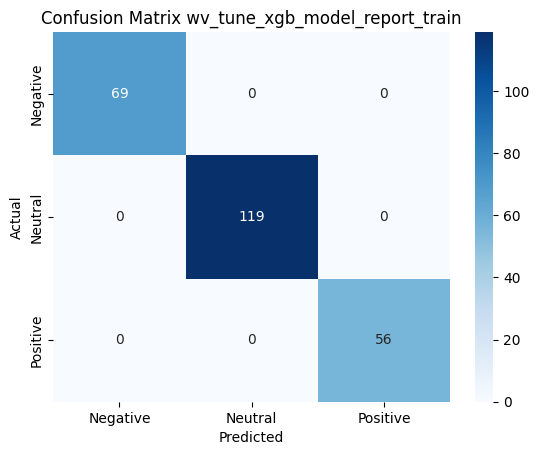

Training performance:
    Accuracy  Recall  Precision   F1                           Model
0       1.0     1.0        1.0  1.0  wv_tune_xgb_model_report_train


In [180]:
# Set the classification to the best combination of parameters
best_params = wv_tune_xgb_grid_search.best_params_

# Create the tuned model
wv_tune_xgb_model = XGBClassifier(**best_params, random_state = 42)

# Fit the best algorithm to the data.
wv_tune_xgb_model.fit(train_data_word_vectors, train_labels_encoded)

# Plot the confusion matrix for the train_data_word_vectors
confusion_matrix(wv_tune_xgb_model, train_data_word_vectors, train_labels_encoded, "wv_tune_xgb_model_report_train")

# Calculate different metrics on train_data_word_vectors
wv_tune_xgb_model_report_train = model_performance_classification_report(wv_tune_xgb_model, train_data_word_vectors, train_labels_encoded, "wv_tune_xgb_model_report_train")

# Print the dataframe wv_tune_xgb_model_report_train
print("Training performance:\n", wv_tune_xgb_model_report_train)

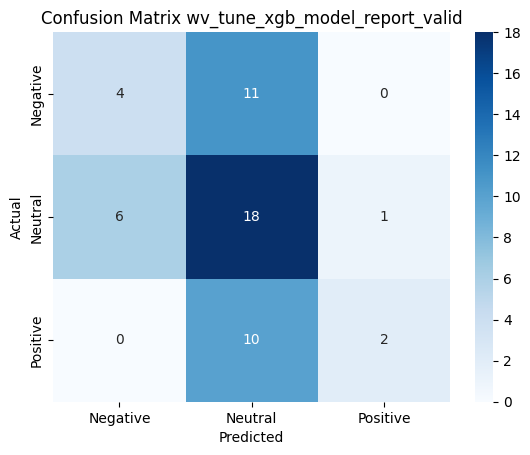

Validation performance:
    Accuracy    Recall  Precision        F1                           Model
0  0.461538  0.461538   0.491124  0.424279  wv_tune_xgb_model_report_valid


In [181]:
# Plot the confusion matrix for the valid_data_word_vectors
confusion_matrix(wv_tune_xgb_model, valid_data_word_vectors, valid_labels_encoded, "wv_tune_xgb_model_report_valid")

# Calculate different metrics on valid_data_word_vectors
wv_tune_xgb_model_report_valid = model_performance_classification_report(wv_tune_xgb_model, valid_data_word_vectors, valid_labels_encoded, "wv_tune_xgb_model_report_valid")

# Print the dataframe wv_tune_xgb_model_report_valid
print("Validation performance:\n", wv_tune_xgb_model_report_valid)

**Observations:**
- The model appears to be overfitting.

### Tune ML model with GloVe

#### DecisionTreeClassifier

In [182]:
# Define the parameter_grid
parameter_grid = {
    # Function to measure quality of a split
    "criterion": ["gini", "entropy"],  

    # Depth of the tree (None allows full depth)
    "max_depth": [5, 10, 15, 20, None],  

    # Minimum samples needed to split a node
    "min_samples_split": [2, 5, 10],  

    # Minimum samples required at a leaf node
    "min_samples_leaf": [1, 2, 5, 10],  

    # Number of features to consider for best split
    "max_features": ["sqrt", "log2", None]  
}

# Initiate a XGBClassifier
glove_tune_dtc_grid = DecisionTreeClassifier(random_state = 42)

# Initialize the grid_search
glove_tune_dtc_grid_search = GridSearchCV(estimator = glove_tune_dtc_grid, param_grid = parameter_grid, scoring = "f1_weighted", cv = 5, verbose = 1, n_jobs = -1)

# Train the data
glove_tune_dtc_grid_result = glove_tune_dtc_grid_search.fit(train_data_word_vectors, train_labels)

# Print the best parameters
print("Best parameters:", glove_tune_dtc_grid_search.best_params_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}


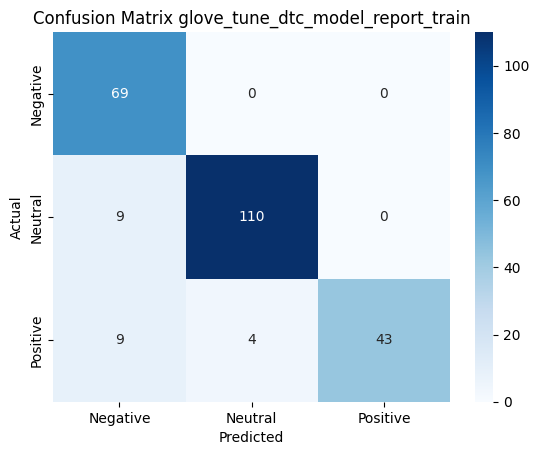

Training performance:
    Accuracy    Recall  Precision        F1                              Model
0  0.909836  0.909836    0.92438  0.910022  glove_tune_dtc_model_report_train


In [183]:
# Set the classification to the best combination of parameters
best_params = glove_tune_dtc_grid_search.best_params_

# Create the tuned model
glove_tune_dtc_model = DecisionTreeClassifier(**best_params, random_state = 42)

# Fit the best algorithm to the data.
glove_tune_dtc_model.fit(train_data_word_vectors, train_labels)

# Plot the confusion matrix for the train_data_word_vectors
confusion_matrix(glove_tune_dtc_model, train_data_word_vectors, train_labels, "glove_tune_dtc_model_report_train")

# Calculate different metrics on train_data_word_vectors
glove_tune_dtc_model_report_train = model_performance_classification_report(glove_tune_dtc_model, train_data_word_vectors, train_labels, "glove_tune_dtc_model_report_train")

# Print the dataframe glove_tune_dtc_model_report_train
print("Training performance:\n", glove_tune_dtc_model_report_train)

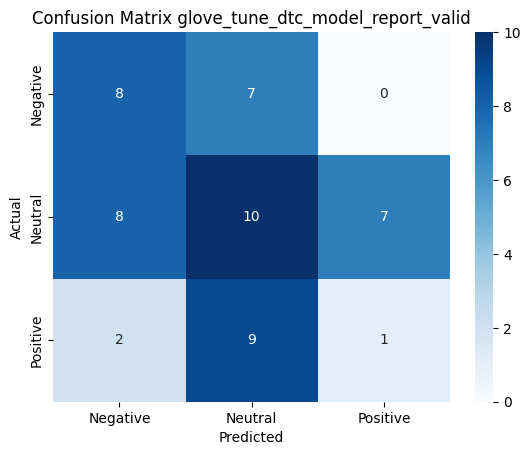

Validation performance:
    Accuracy    Recall  Precision        F1                              Model
0  0.365385  0.365385   0.341963  0.351474  glove_tune_dtc_model_report_valid


In [184]:
# Plot the confusion matrix for the valid_data_word_vectors
confusion_matrix(glove_tune_dtc_model, valid_data_word_vectors, valid_labels, "glove_tune_dtc_model_report_valid")

# Calculate different metrics on valid_data_word_vectors
glove_tune_dtc_model_report_valid = model_performance_classification_report(glove_tune_dtc_model, valid_data_word_vectors, valid_labels, "glove_tune_dtc_model_report_valid")

# Print the dataframe wv_tune_dtc_model_report_valid
print("Validation performance:\n", glove_tune_dtc_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### RandomForestClassifier

In [185]:
# Define the parameter_grid
parameter_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "criterion": ["gini", "entropy"]
}

# Initiate a RandomForestClassifier
glove_tune_rf_grid = RandomForestClassifier(random_state = 42)

# Initialize the grid_search
glove_tune_rf_grid_search = GridSearchCV(estimator = glove_tune_rf_grid, param_grid = parameter_grid, scoring = "f1_weighted", cv = 5, verbose = 1, n_jobs = -1)

# Train the data
glove_tune_rf_grid_result = glove_tune_rf_grid_search.fit(train_data_word_vectors, train_labels)

# Print the best parameters
print("Best parameters:", glove_tune_rf_grid_result.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}


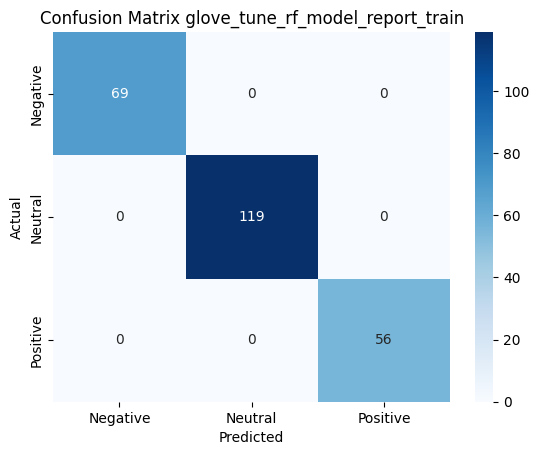

Training performance:
    Accuracy  Recall  Precision   F1                             Model
0       1.0     1.0        1.0  1.0  glove_tune_rf_model_report_train


In [186]:
# Set the classification to the best combination of parameters
best_params = glove_tune_rf_grid_search.best_params_

# Create the tuned model
glove_tune_rf_model = RandomForestClassifier(**best_params, random_state = 42)

# Fit the best algorithm to the data.
glove_tune_rf_model.fit(train_data_word_vectors, train_labels)

# Plot the confusion matrix for the train_data_word_vectors
confusion_matrix(glove_tune_rf_model, train_data_word_vectors, train_labels, "glove_tune_rf_model_report_train")

# Calculate different metrics on train_data_word_vectors
glove_tune_rf_model_report_train = model_performance_classification_report(glove_tune_rf_model, train_data_word_vectors, train_labels, "glove_tune_rf_model_report_train")

# Print the dataframe glove_tune_rf_model_report_train
print("Training performance:\n", glove_tune_rf_model_report_train)

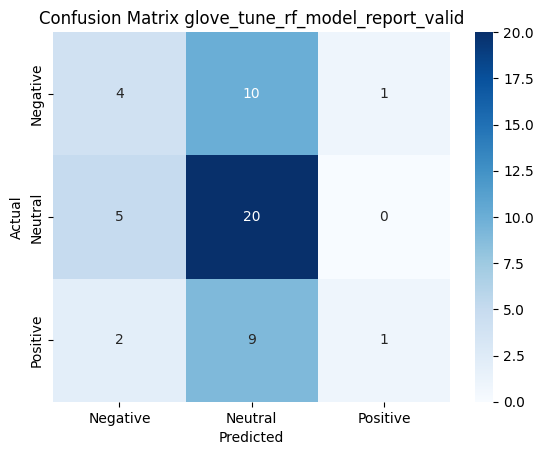

Validation performance:
    Accuracy    Recall  Precision        F1                             Model
0  0.480769  0.480769   0.466828  0.422205  glove_tune_rf_model_report_valid


In [187]:
# Plot the confusion matrix for the valid_data_word_vectors
confusion_matrix(glove_tune_rf_model, valid_data_word_vectors, valid_labels, "glove_tune_rf_model_report_valid")

# Calculate different metrics on valid_data_word_vectors
glove_tune_rf_model_report_valid = model_performance_classification_report(glove_tune_rf_model, valid_data_word_vectors, valid_labels, "glove_tune_rf_model_report_valid")

# Print the dataframe glove_tune_rf_model_report_valid
print("Validation performance:\n", glove_tune_rf_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### AdaBoostClassifier

In [188]:
# Define the parameter_grid
parameter_grid = {

  # Number of boosting rounds
  "n_estimators": [50, 100, 200],

  # Step size shrinkage
  "learning_rate": [0.01, 0.1, 1.0]
}

# Initiate a AdaBoostClassifier
glove_tune_ada_grid = AdaBoostClassifier(random_state = 42)

# Initialize the grid_search
glove_tune_ab_grid_search = GridSearchCV(estimator = glove_tune_ada_grid, param_grid = parameter_grid, scoring = "f1_weighted", cv = 5, verbose = 1, n_jobs = -1)

# Train the data
glove_tune_ab_grid_result = glove_tune_ab_grid_search.fit(train_data_glove, train_labels)

# Print the best parameters
print("Best parameters:", glove_tune_ab_grid_result.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Best parameters: {'learning_rate': 1.0, 'n_estimators': 50}


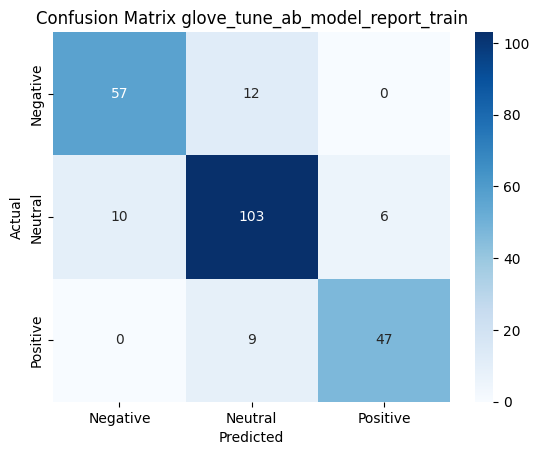

Training performance:
    Accuracy    Recall  Precision        F1                             Model
0  0.848361  0.848361   0.849216  0.848412  glove_tune_ab_model_report_train


In [189]:
# Set the classifier to the best combination of parameters
glove_tune_ab_model = glove_tune_ab_grid_result.best_estimator_

# Fit the best algorithm to the data.
glove_tune_ab_model.fit(train_data_glove, train_labels)

# Plot the confusion matrix for the train_data_glove
confusion_matrix(glove_tune_ab_model, train_data_glove, train_labels, "glove_tune_ab_model_report_train")

# Calculate different metrics on train_data_glove
glove_tune_ab_model_report_train = model_performance_classification_report(glove_tune_ab_model, train_data_glove, train_labels, "glove_tune_ab_model_report_train")

# Print the dataframe glove_tune_ab_model_report_train
print("Training performance:\n", glove_tune_ab_model_report_train)

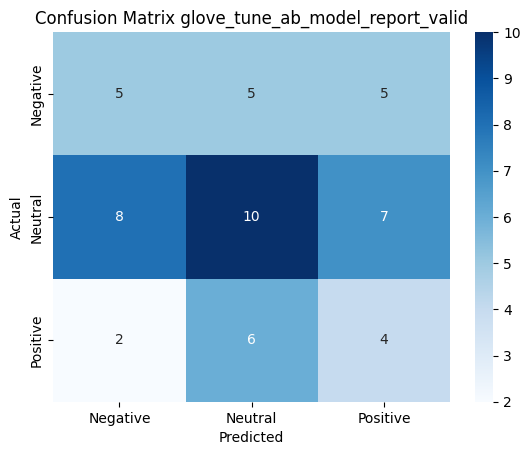

Validation performance:
    Accuracy    Recall  Precision        F1                             Model
0  0.365385  0.365385   0.382784  0.371118  glove_tune_ab_model_report_valid


In [190]:
# Plot the confusion matrix for the valid_data_glove
confusion_matrix(glove_tune_ab_model, valid_data_glove, valid_labels, "glove_tune_ab_model_report_valid")

# Calculate different metrics on valid_data_glove
glove_tune_ab_model_report_valid = model_performance_classification_report(glove_tune_ab_model, valid_data_glove, valid_labels, "glove_tune_ab_model_report_valid")

# Print the dataframe glove_tune_ab_model_report_valid
print("Validation performance:\n", glove_tune_ab_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### GradientBoostingClassifier

In [191]:
# Define the parameter_grid
parameter_grid = {
    
    # Number of boosting rounds
    "n_estimators": [100, 200, 300],

    # Shrinkage parameter
    "learning_rate": [0.01, 0.1, 0.2]
}

# Initiate a XGBClassifier
glove_tune_gb_grid = GradientBoostingClassifier(random_state = 42)

# Initialize the grid_search
glove_tune_gb_grid_search = GridSearchCV(estimator = glove_tune_gb_grid, param_grid = parameter_grid, scoring = "f1_weighted", cv = 5, verbose = 1, n_jobs = -1)

# Train the data
glove_tune_gb_grid_result = glove_tune_gb_grid_search.fit(train_data_word_vectors, train_labels)

# Print the best parameters
print("Best parameters:", glove_tune_gb_grid_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'learning_rate': 0.2, 'n_estimators': 100}


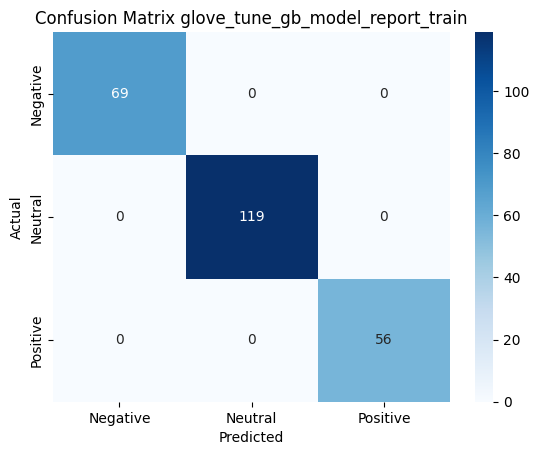

Training performance:
    Accuracy  Recall  Precision   F1                             Model
0       1.0     1.0        1.0  1.0  glove_tune_gb_model_report_train


In [192]:
# Set the classification to the best combination of parameters
best_params = glove_tune_gb_grid_search.best_params_

# Create the tuned model
glove_tune_gb_model = GradientBoostingClassifier(**best_params, random_state = 42)

# Fit the best algorithm to the data.
glove_tune_gb_model.fit(train_data_word_vectors, train_labels)

# Plot the confusion matrix for the train_data_word_vectors
confusion_matrix(glove_tune_gb_model, train_data_word_vectors, train_labels, "glove_tune_gb_model_report_train")

# Calculate different metrics on train_data_word_vectors
glove_tune_gb_model_report_train = model_performance_classification_report(glove_tune_gb_model, train_data_word_vectors, train_labels, "glove_tune_gb_model_report_train")

# Print the dataframe wv_tune_xgb_model_report_train
print("Training performance:\n", glove_tune_gb_model_report_train)

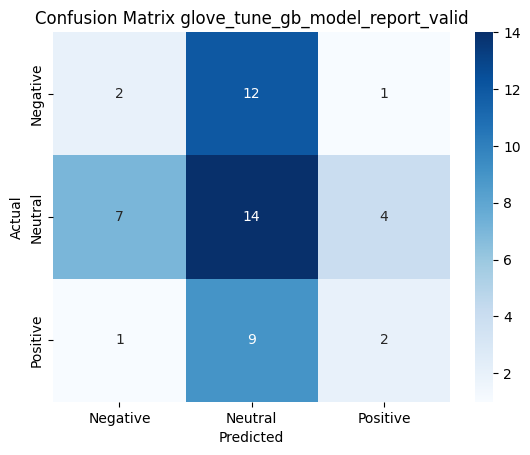

Validation performance:
    Accuracy    Recall  Precision        F1                             Model
0  0.346154  0.346154   0.315934  0.319096  glove_tune_gb_model_report_valid


In [193]:
# Plot the confusion matrix for the valid_data_word_vectors
confusion_matrix(glove_tune_gb_model, valid_data_word_vectors, valid_labels, "glove_tune_gb_model_report_valid")

# Calculate different metrics on valid_data_word_vectors
glove_tune_gb_model_report_valid = model_performance_classification_report(glove_tune_gb_model, valid_data_word_vectors, valid_labels, "glove_tune_gb_model_report_valid")

# Print the dataframe glove_tune_gb_model_report_valid
print("Validation performance:\n", glove_tune_gb_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### XGBClassifier

In [194]:
# Define the parameter_grid
parameter_grid = {

  # Number of boosting rounds
  "n_estimators": [50, 100, 200],

  # Step size shrinkage
  "learning_rate": [0.01, 0.1, 0.3],

  # Define max_depth
  "max_depth": [3, 5, 7],

  # Define subsample
  "subsample": [0.6, 0.8, 1.0]
}

# Initiate a XGBClassifier
glove_tune_xgb_grid = XGBClassifier(random_state = 42)

# Initialize the grid_search
glove_tune_xgb_grid_search = GridSearchCV(estimator = glove_tune_xgb_grid, param_grid = parameter_grid, scoring = "f1_weighted", cv = 5, verbose = 1, n_jobs = -1)

# Train the data
glove_tune_xbg_grid_result = glove_tune_xgb_grid_search.fit(train_data_glove, train_labels_encoded)

# Print the best parameters
print("Best parameters:", glove_tune_xgb_grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


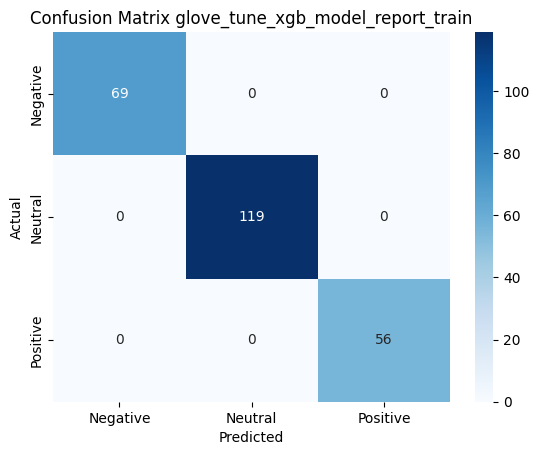

Training performance:
    Accuracy  Recall  Precision   F1                              Model
0       1.0     1.0        1.0  1.0  glove_tune_xgb_model_report_train


In [195]:
# Set the classifier to the best combination of parameters
glove_tune_xgb_model = glove_tune_xbg_grid_result.best_estimator_

# Fit the best algorithm to the data.
glove_tune_xgb_model.fit(train_data_glove, train_labels_encoded)

# Plot the confusion matrix for the train_data_glove
confusion_matrix(glove_tune_xgb_model, train_data_glove, train_labels_encoded, "glove_tune_xgb_model_report_train")

# Calculate different metrics on train_data_glove
glove_tune_xgb_model_report_train = model_performance_classification_report(glove_tune_xgb_model, train_data_glove, train_labels_encoded, "glove_tune_xgb_model_report_train")

# Print the dataframe glove_tune_xgb_model_report_train
print("Training performance:\n", glove_tune_xgb_model_report_train)

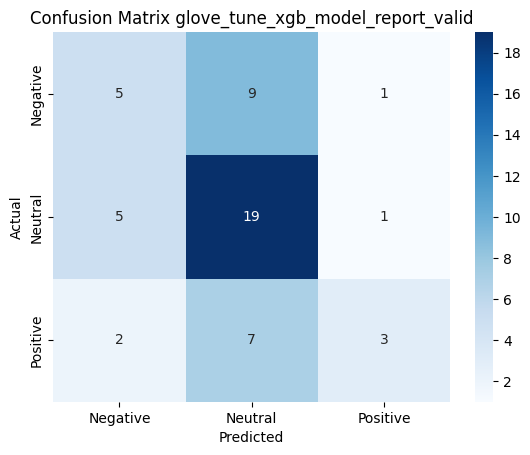

Validation performance:
    Accuracy    Recall  Precision        F1                              Model
0  0.519231  0.519231   0.519643  0.492773  glove_tune_xgb_model_report_valid


In [196]:
# Plot the confusion matrix for the valid_data_glove
confusion_matrix(glove_tune_xgb_model, valid_data_glove, valid_labels_encoded, "glove_tune_xgb_model_report_valid")

# Calculate different metrics on valid_data_glove
glove_tune_xgb_model_report_valid = model_performance_classification_report(glove_tune_xgb_model, valid_data_glove, valid_labels_encoded, "glove_tune_xgb_model_report_valid")

# Print the dataframe glove_tune_xgb_model_report_valid
print("Validation performance:\n", glove_tune_xgb_model_report_valid)

**Observations:**
- The model appears to be overfitting.

### Tune ML model with Sentence Transformer

#### DecisionTreeClassifier

In [197]:
# Define the parameter_grid
parameter_grid = {
    # Function to measure quality of a split
    "criterion": ["gini", "entropy"],  

    # Depth of the tree (None allows full depth)
    "max_depth": [5, 10, 15, 20, None],  

    # Minimum samples needed to split a node
    "min_samples_split": [2, 5, 10],  

    # Minimum samples required at a leaf node
    "min_samples_leaf": [1, 2, 5, 10],  

    # Number of features to consider for best split
    "max_features": ["sqrt", "log2", None]  
}

# Initiate a XGBClassifier
transformer_tune_dtc_grid = DecisionTreeClassifier(random_state = 42)

# Initialize the grid_search
transformer_tune_dtc_grid_search = GridSearchCV(estimator = transformer_tune_dtc_grid, param_grid = parameter_grid, scoring = "f1_weighted", cv = 5, verbose = 1, n_jobs = -1)

# Train the data
transformer_tune_dtc_grid_result = transformer_tune_dtc_grid_search.fit(train_data_word_vectors, train_labels)

# Print the best parameters
print("Best parameters:", transformer_tune_dtc_grid_result.best_params_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}


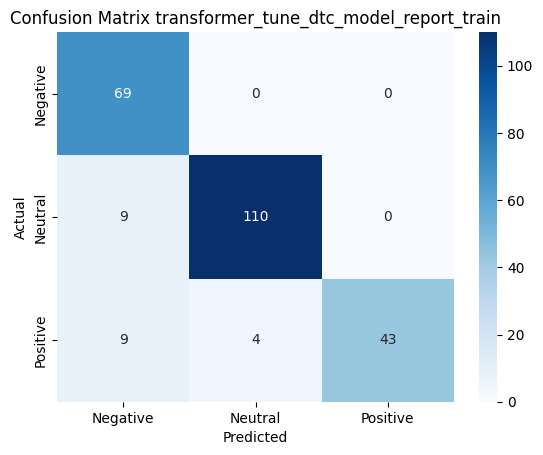

Training performance:
    Accuracy    Recall  Precision        F1  \
0  0.909836  0.909836    0.92438  0.910022   

                                     Model  
0  transformer_tune_dtc_model_report_train  


In [198]:
# Set the classification to the best combination of parameters
best_params = transformer_tune_dtc_grid_search.best_params_

# Create the tuned model
transformer_tune_dtc_model = DecisionTreeClassifier(**best_params, random_state = 42)

# Fit the best algorithm to the data.
transformer_tune_dtc_model.fit(train_data_word_vectors, train_labels)

# Plot the confusion matrix for the train_data_word_vectors
confusion_matrix(transformer_tune_dtc_model, train_data_word_vectors, train_labels, "transformer_tune_dtc_model_report_train")

# Calculate different metrics on train_data_word_vectors
transformer_tune_dtc_model_report_train = model_performance_classification_report(transformer_tune_dtc_model, train_data_word_vectors, train_labels, "transformer_tune_dtc_model_report_train")

# Print the dataframe transformer_tune_dtc_model_report_train
print("Training performance:\n", transformer_tune_dtc_model_report_train)

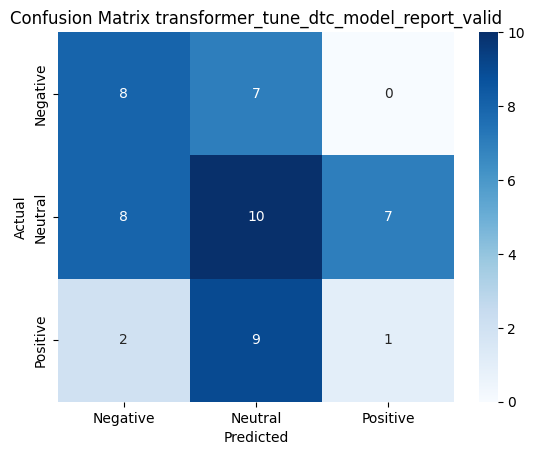

Validation performance:
    Accuracy    Recall  Precision        F1                              Model
0  0.365385  0.365385   0.341963  0.351474  glove_tune_dtc_model_report_valid


In [199]:
# Plot the confusion matrix for the valid_data_word_vectors
confusion_matrix(transformer_tune_dtc_model, valid_data_word_vectors, valid_labels, "transformer_tune_dtc_model_report_valid")

# Calculate different metrics on valid_data_word_vectors
transformer_tune_dtc_model_report_valid = model_performance_classification_report(transformer_tune_dtc_model, valid_data_word_vectors, valid_labels, "glove_tune_dtc_model_report_valid")

# Print the dataframe transformer_tune_dtc_model_report_valid
print("Validation performance:\n", transformer_tune_dtc_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### RandomForestClassifier

In [200]:
# Define the parameter_grid
parameter_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "criterion": ["gini", "entropy"]
}

# Initiate a RandomForestClassifier
transformer_tune_rf_grid = RandomForestClassifier(random_state = 42)

# Initialize the grid_search
transformer_tune_rf_grid_search = GridSearchCV(estimator = transformer_tune_rf_grid, param_grid = parameter_grid, scoring = "f1_weighted", cv = 5, verbose = 1, n_jobs = -1)

# Train the data
transformer_tune_rf_grid_result = transformer_tune_rf_grid_search.fit(train_data_word_vectors, train_labels)

# Print the best parameters
print("Best parameters:", transformer_tune_rf_grid_result.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}


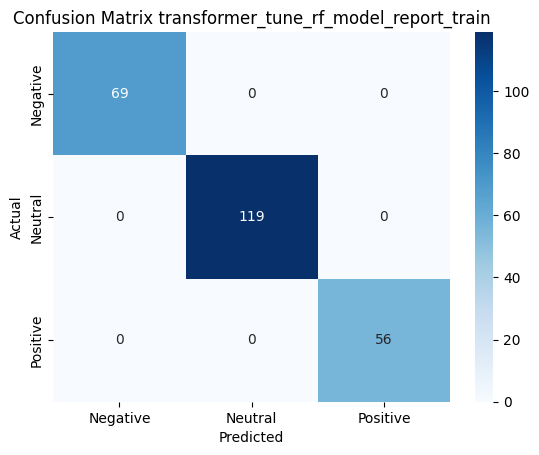

Training performance:
    Accuracy  Recall  Precision   F1                                   Model
0       1.0     1.0        1.0  1.0  transformer_tune_rf_model_report_train


In [201]:
# Set the classification to the best combination of parameters
best_params = transformer_tune_rf_grid_search.best_params_

# Create the tuned model
transformer_tune_rf_model = RandomForestClassifier(**best_params, random_state = 42)

# Fit the best algorithm to the data.
transformer_tune_rf_model.fit(train_data_word_vectors, train_labels)

# Plot the confusion matrix for the train_data_word_vectors
confusion_matrix(transformer_tune_rf_model, train_data_word_vectors, train_labels, "transformer_tune_rf_model_report_train")

# Calculate different metrics on train_data_word_vectors
transformer_tune_rf_model_report_train = model_performance_classification_report(transformer_tune_rf_model, train_data_word_vectors, train_labels, "transformer_tune_rf_model_report_train")

# Print the dataframe transformer_tune_rf_model_report_train
print("Training performance:\n", transformer_tune_rf_model_report_train)

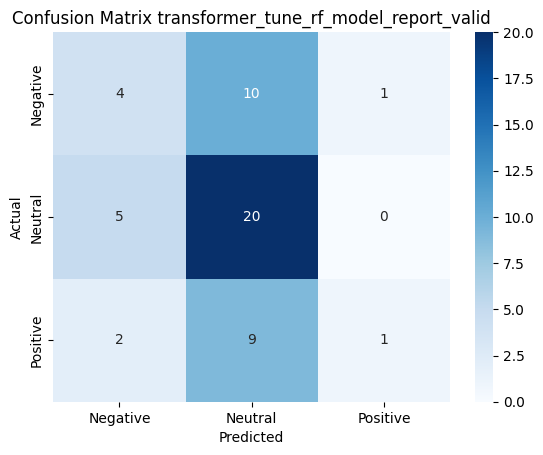

Validation performance:
    Accuracy    Recall  Precision        F1  \
0  0.480769  0.480769   0.466828  0.422205   

                                    Model  
0  transformer_tune_rf_model_report_valid  


In [202]:
# Plot the confusion matrix for the valid_data_word_vectors
confusion_matrix(transformer_tune_rf_model, valid_data_word_vectors, valid_labels, "transformer_tune_rf_model_report_valid")

# Calculate different metrics on valid_data_word_vectors
transformer_tune_rf_model_report_valid = model_performance_classification_report(transformer_tune_rf_model, valid_data_word_vectors, valid_labels, "transformer_tune_rf_model_report_valid")

# Print the dataframe transformer_tune_rf_model_report_valid
print("Validation performance:\n", transformer_tune_rf_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### AdaBoostClassifier

In [203]:
# Define the parameter_grid
parameter_grid = {

  # Number of boosting rounds
  "n_estimators": [50, 100, 200],

  # Step size shrinkage
  "learning_rate": [0.01, 0.1, 1.0]
}

# Initiate a AdaBoostClassifier
transformer_tune_ada_grid = AdaBoostClassifier(random_state = 42)

# Initialize the grid_search
transformer_tune_ab_grid_search = GridSearchCV(estimator = transformer_tune_ada_grid, param_grid = parameter_grid, scoring = "f1_weighted", cv = 5, verbose = 1, n_jobs = -1)

# Train the data
transformer_tune_ab_grid_result = transformer_tune_ab_grid_search.fit(train_data_transformer, train_labels)

# Print the best parameters
print("Best parameters:", transformer_tune_ab_grid_result.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Best parameters: {'learning_rate': 1.0, 'n_estimators': 100}


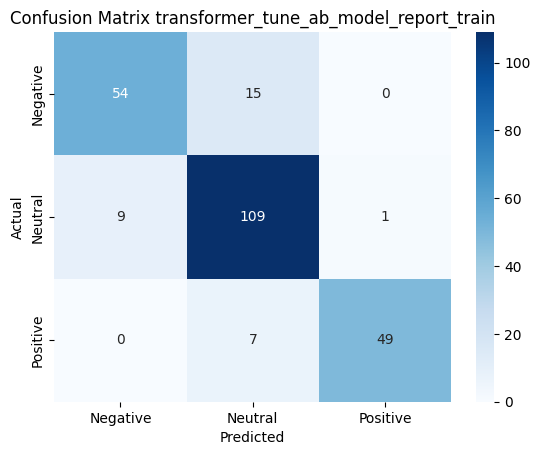

Training performance:
    Accuracy    Recall  Precision        F1  \
0  0.868852  0.868852   0.873107  0.868837   

                                    Model  
0  transformer_tune_ab_model_report_train  


In [204]:
# Set the classification model to the best combination of parameters
transformer_tune_ab_model = transformer_tune_ab_grid_result.best_estimator_

# Fit the best algorithm to the data.
transformer_tune_ab_model.fit(train_data_transformer, train_labels)

# Plot the confusion matrix for the train_data_transformer
confusion_matrix(transformer_tune_ab_model, train_data_transformer, train_labels, "transformer_tune_ab_model_report_train")

# Calculate different metrics on train_data_transformer
transformer_tune_ab_model_report_train = model_performance_classification_report(transformer_tune_ab_model, train_data_transformer, train_labels, "transformer_tune_ab_model_report_train")

# Print the dataframe transformer_tune_ab_model_report_train
print("Training performance:\n", transformer_tune_ab_model_report_train)

**Observations:**
- The model appears to be overfitting.

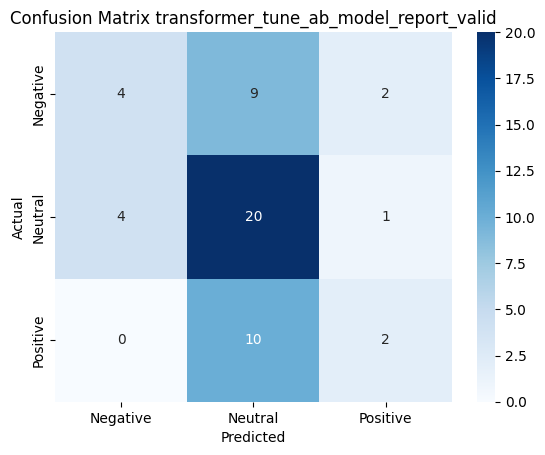

Validation performance:
    Accuracy  Recall  Precision        F1  \
0       0.5     0.5   0.483087  0.455114   

                                    Model  
0  transformer_tune_ab_model_report_valid  


In [205]:
# Plot the confusion matrix for the valid_data_transformer
confusion_matrix(transformer_tune_ab_model, valid_data_transformer, valid_labels, "transformer_tune_ab_model_report_valid")

# Calculate different metrics on valid_data_transformer
transformer_tune_ab_model_report_valid = model_performance_classification_report(transformer_tune_ab_model, valid_data_transformer, valid_labels, "transformer_tune_ab_model_report_valid")

# Print the dataframe transformer_tune_ab_model_report_valid
print("Validation performance:\n", transformer_tune_ab_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### GradientBoostingClassifier

In [206]:
# Define the parameter_grid
parameter_grid = {
    
    # Number of boosting rounds
    "n_estimators": [100, 200, 300],

    # Shrinkage parameter
    "learning_rate": [0.01, 0.1, 0.2]
}

# Initiate a XGBClassifier
transformer_tune_gb_grid = GradientBoostingClassifier(random_state = 42)

# Initialize the grid_search
transformer_tune_gb_grid_search = GridSearchCV(estimator = transformer_tune_gb_grid, param_grid = parameter_grid, scoring = "f1_weighted", cv = 5, verbose = 1, n_jobs = -1)

# Train the data
transformer_tune_gb_grid_result = transformer_tune_gb_grid_search.fit(train_data_word_vectors, train_labels)

# Print the best parameters
print("Best parameters:", transformer_tune_gb_grid_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'learning_rate': 0.2, 'n_estimators': 100}


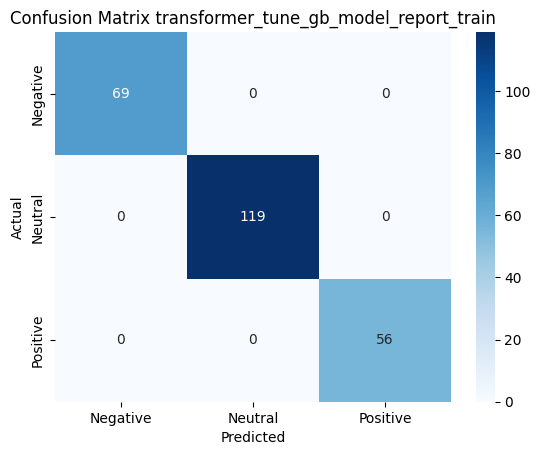

Training performance:
    Accuracy  Recall  Precision   F1                                   Model
0       1.0     1.0        1.0  1.0  transformer_tune_gb_model_report_train


In [207]:
# Set the classification to the best combination of parameters
best_params = transformer_tune_gb_grid_search.best_params_

# Create the tuned model
transformer_tune_gb_model = GradientBoostingClassifier(**best_params, random_state = 42)

# Fit the best algorithm to the data.
transformer_tune_gb_model.fit(train_data_word_vectors, train_labels)

# Plot the confusion matrix for the train_data_word_vectors
confusion_matrix(transformer_tune_gb_model, train_data_word_vectors, train_labels, "transformer_tune_gb_model_report_train")

# Calculate different metrics on train_data_word_vectors
transformer_tune_gb_model_report_train = model_performance_classification_report(transformer_tune_gb_model, train_data_word_vectors, train_labels, "transformer_tune_gb_model_report_train")

# Print the dataframe transformer_tune_gb_model_report_train
print("Training performance:\n", transformer_tune_gb_model_report_train)

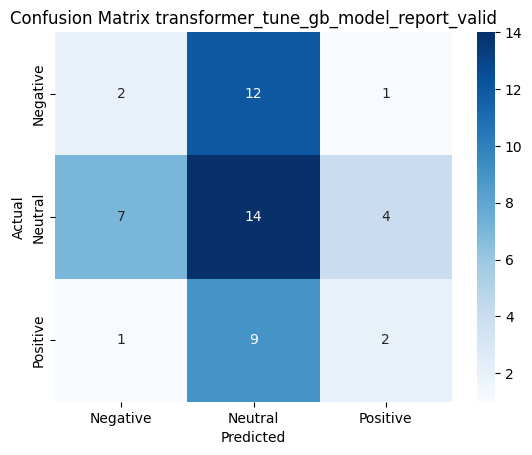

Validation performance:
    Accuracy    Recall  Precision        F1  \
0  0.346154  0.346154   0.315934  0.319096   

                                    Model  
0  transformer_tune_gb_model_report_valid  


In [208]:
# Plot the confusion matrix for the valid_data_word_vectors
confusion_matrix(transformer_tune_gb_model, valid_data_word_vectors, valid_labels, "transformer_tune_gb_model_report_valid")

# Calculate different metrics on valid_data_word_vectors
transformer_tune_gb_model_report_valid = model_performance_classification_report(transformer_tune_gb_model, valid_data_word_vectors, valid_labels, "transformer_tune_gb_model_report_valid")

# Print the dataframe transformer_tune_gb_model_report_valid
print("Validation performance:\n", transformer_tune_gb_model_report_valid)

**Observations:**
- The model appears to be overfitting.

#### XGBClassifier

In [209]:
# Define the parameter_grid
parameter_grid = {

  # Number of boosting rounds
  "n_estimators": [50, 100, 200],

  # Step size shrinkage
  "learning_rate": [0.01, 0.1, 0.3],

  # Define max_depth
  "max_depth": [3, 5, 7],

  # Define subsample
  "subsample": [0.6, 0.8, 1.0]
}

# Initiate a XGBClassifier
transformer_tune_xgb_grid = XGBClassifier(random_state = 42)

# Initialize the grid_search
transformer_tune_xgb_grid_search = GridSearchCV(estimator = transformer_tune_xgb_grid, param_grid = parameter_grid, scoring = "f1_weighted", cv = 5, verbose = 1, n_jobs = -1)

# Train the data
transformer_tune_xgb_grid_result = transformer_tune_xgb_grid_search.fit(train_data_transformer, train_labels_encoded)

# Print the best parameters
print("Best parameters:", transformer_tune_xgb_grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.6}


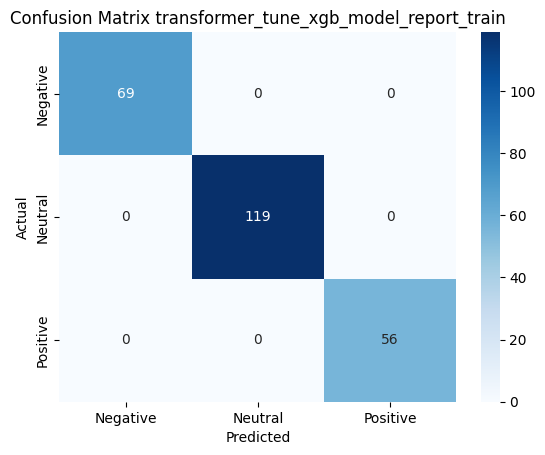

Training performance:
    Accuracy  Recall  Precision   F1                                    Model
0       1.0     1.0        1.0  1.0  transformer_tune_xgb_model_report_train


In [210]:
# Set the classification model to the best combination of parameters
transformer_tune_xgb_model = transformer_tune_xgb_grid_result.best_estimator_

# Fit the best algorithm to the data.
transformer_tune_xgb_model.fit(train_data_transformer, train_labels_encoded)

# Plot the confusion matrix for the train_data_transformer
confusion_matrix(transformer_tune_xgb_model, train_data_transformer, train_labels_encoded, "transformer_tune_xgb_model_report_train")

# Calculate different metrics on train_data_transformer
transformer_tune_xgb_model_report_train = model_performance_classification_report(transformer_tune_xgb_model, train_data_transformer, train_labels_encoded, "transformer_tune_xgb_model_report_train")

# Print the dataframe transformer_tune_xgb_model_report_train
print("Training performance:\n", transformer_tune_xgb_model_report_train)

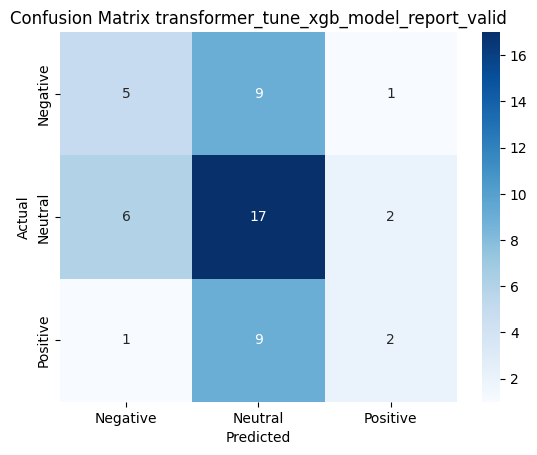

Validation performance:
    Accuracy    Recall  Precision        F1  \
0  0.461538  0.461538   0.446016  0.433572   

                                     Model  
0  transformer_tune_xgb_model_report_valid  


In [211]:
# Plot the confusion matrix for the valid_data_transformer
confusion_matrix(transformer_tune_xgb_model, valid_data_transformer, valid_labels_encoded, "transformer_tune_xgb_model_report_valid")

# Calculate different metrics on valid_data_transformer
transformer_tune_xgb_model_report_valid = model_performance_classification_report(transformer_tune_xgb_model, valid_data_transformer, valid_labels_encoded, "transformer_tune_xgb_model_report_valid")

# Print the dataframe transformer_tune_xgb_model_report_valid
print("Validation performance:\n", transformer_tune_xgb_model_report_valid)

**Observations:**
- The model appears to be overfitting.

### Model Performance and Final Model Selection

In [212]:
# Compare the models and show the strengths
models_train_compare = pd.concat([
    wv_base_dtc_model_report_train,
    wv_base_rf_model_report_train,
    wv_base_ab_model_report_train,
    wv_base_gb_model_report_train,
    wv_base_xgb_model_report_train,
    glove_base_dtc_model_report_train,
    glove_base_rf_model_report_train,
    glove_base_ab_model_report_train,
    glove_base_gb_model_report_train,
    glove_base_xgb_model_report_train,
    transformer_base_dtc_model_report_train,
    transformer_base_rf_model_report_train,
    transformer_base_ab_model_report_train,
    transformer_base_gb_model_report_train,
    transformer_base_xgb_model_report_train,
    wv_tune_dtc_model_report_train,
    wv_tune_rf_model_report_train,
    wv_tune_ab_model_report_train, 
    wv_tune_gb_model_report_train,
    wv_tune_xgb_model_report_train,
    glove_tune_dtc_model_report_train,
    glove_tune_rf_model_report_train,
    glove_tune_ab_model_report_train, 
    glove_tune_gb_model_report_train,
    glove_tune_xgb_model_report_train,
    transformer_tune_dtc_model_report_train,
    transformer_tune_rf_model_report_train,
    transformer_tune_ab_model_report_train,
    transformer_tune_gb_model_report_train,
    transformer_tune_xgb_model_report_train
], axis = 0)

print("Training performance comparison:")
models_train_compare

Training performance comparison:


Accuracy    Recall  Precision        F1  \
0  1.000000  1.000000   1.000000  1.000000   
0  1.000000  1.000000   1.000000  1.000000   
0  0.790984  0.790984   0.800990  0.789920   
0  1.000000  1.000000   1.000000  1.000000   
0  1.000000  1.000000   1.000000  1.000000   
0  1.000000  1.000000   1.000000  1.000000   
0  1.000000  1.000000   1.000000  1.000000   
0  0.848361  0.848361   0.849216  0.848412   
0  1.000000  1.000000   1.000000  1.000000   
0  1.000000  1.000000   1.000000  1.000000   
0  1.000000  1.000000   1.000000  1.000000   
0  1.000000  1.000000   1.000000  1.000000   
0  0.799180  0.799180   0.805554  0.799190   
0  1.000000  1.000000   1.000000  1.000000   
0  1.000000  1.000000   1.000000  1.000000   
0  0.909836  0.909836   0.924380  0.910022   
0  1.000000  1.000000   1.000000  1.000000   
0  0.758197  0.758197   0.800528  0.750878   
0  1.000000  1.000000   1.000000  1.000000   
0  1.000000  1.000000   1.000000  1.000000   
0  0.909836  0.909836   0.924380  0.910022   
0  1.000000  1.000000   1.000000  1.000000   
0  0.848361  0.848361   0.849216  0.848412   
0  1.000000  1.000000   1.000000  1.000000   
0  1.000000  1.000000   1.000000  1.000000   
0  0.909836  0.909836   0.924380  0.910022   
0  1.000000  1.000000   1.000000  1.000000   
0  0.868852  0.868852   0.873107  0.868837   
0  1.000000  1.000000   1.000000  1.000000   
0  1.000000  1.000000   1.000000  1.000000   

                                     Model  
0           wv_base_dtc_model_report_train  
0            wv_base_rf_model_report_train  
0            wv_base_ab_model_report_train  
0            wv_base_gb_model_report_train  
0           wv_base_xgb_model_report_train  
0        glove_base_dtc_model_report_train  
0         glove_base_rf_model_report_train  
0         glove_base_ab_model_report_train  
0         glove_base_gb_model_report_train  
0        glove_base_xgb_model_report_train  
0  transformer_base_dtc_model_report_train  
0   transformer_base_rf_model_report_train  
0   transformer_base_ab_model_report_train  
0   transformer_base_gb_model_report_train  
0  transformer_base_xgb_model_report_train  
0           wv_tune_dtc_model_report_train  
0            wv_tune_rf_model_report_train  
0            wv_tune_ab_model_report_train  
0            wv_tune_gb_model_report_train  
0           wv_tune_xgb_model_report_train  
0        glove_tune_dtc_model_report_train  
0         glove_tune_rf_model_report_train  
0         glove_tune_ab_model_report_train  
0         glove_tune_gb_model_report_train  
0        glove_tune_xgb_model_report_train  
0  transformer_tune_dtc_model_report_train  
0   transformer_tune_rf_model_report_train  
0   transformer_tune_ab_model_report_train  
0   transformer_tune_gb_model_report_train  
0  transformer_tune_xgb_model_report_train

In [214]:
# Compare the models and show the strengths
models_valid_compare = pd.concat([
    wv_base_dtc_model_report_valid,
    wv_base_rf_model_report_valid,
    wv_base_ab_model_report_valid,
    wv_base_gb_model_report_valid,
    wv_base_xgb_model_report_valid,
    glove_base_dtc_model_report_valid,
    glove_base_rf_model_report_valid,
    glove_base_ab_model_report_valid,
    glove_base_gb_model_report_valid,
    glove_base_xgb_model_report_valid,
    transformer_base_dtc_model_report_valid,
    transformer_base_rf_model_report_valid,
    transformer_base_ab_model_report_valid,
    transformer_base_gb_model_report_valid,
    transformer_base_xgb_model_report_valid,
    wv_tune_dtc_model_report_valid,
    wv_tune_rf_model_report_valid,
    wv_tune_ab_model_report_valid, 
    wv_tune_xgb_model_report_valid,
    glove_tune_dtc_model_report_valid,
    glove_tune_rf_model_report_valid,
    glove_tune_ab_model_report_valid, 
    glove_tune_xgb_model_report_valid,
    transformer_tune_dtc_model_report_valid,
    transformer_tune_rf_model_report_valid,
    transformer_tune_ab_model_report_valid,
    transformer_tune_gb_model_report_valid,
    transformer_tune_xgb_model_report_valid
], axis = 0)

print("Validation performance comparison:")
models_valid_compare

Validation performance comparison:


Accuracy    Recall  Precision        F1  \
0  0.423077  0.423077   0.407925  0.411658   
0  0.423077  0.423077   0.310651  0.352850   
0  0.423077  0.423077   0.356937  0.360662   
0  0.384615  0.384615   0.371300  0.357311   
0  0.423077  0.423077   0.421105  0.385216   
0  0.480769  0.480769   0.488905  0.480008   
0  0.519231  0.519231   0.621248  0.456832   
0  0.365385  0.365385   0.382784  0.371118   
0  0.365385  0.365385   0.337865  0.349288   
0  0.442308  0.442308   0.382692  0.389252   
0  0.403846  0.403846   0.391765  0.394776   
0  0.403846  0.403846   0.335623  0.329668   
0  0.519231  0.519231   0.505845  0.495774   
0  0.403846  0.403846   0.394591  0.384258   
0  0.442308  0.442308   0.415335  0.412475   
0  0.365385  0.365385   0.341963  0.351474   
0  0.480769  0.480769   0.466828  0.422205   
0  0.519231  0.519231   0.505601  0.479741   
0  0.461538  0.461538   0.491124  0.424279   
0  0.365385  0.365385   0.341963  0.351474   
0  0.480769  0.480769   0.466828  0.422205   
0  0.365385  0.365385   0.382784  0.371118   
0  0.519231  0.519231   0.519643  0.492773   
0  0.365385  0.365385   0.341963  0.351474   
0  0.480769  0.480769   0.466828  0.422205   
0  0.500000  0.500000   0.483087  0.455114   
0  0.346154  0.346154   0.315934  0.319096   
0  0.461538  0.461538   0.446016  0.433572   

                                     Model  
0           wv_base_dtc_model_report_valid  
0            wv_base_rf_model_report_valid  
0            wv_base_ab_model_report_valid  
0            wv_base_gb_model_report_valid  
0           wv_base_xgb_model_report_valid  
0        glove_base_dtc_model_report_valid  
0         glove_base_rf_model_report_valid  
0         glove_base_ab_model_report_valid  
0         glove_base_gb_model_report_valid  
0        glove_base_xgb_model_report_valid  
0  transformer_base_dtc_model_report_valid  
0   transformer_base_rf_model_report_valid  
0   transformer_base_ab_model_report_valid  
0   transformer_base_gb_model_report_valid  
0  transformer_base_xgb_model_report_valid  
0           wv_tune_dtc_model_report_valid  
0            wv_tune_rf_model_report_valid  
0            wv_tune_ab_model_report_valid  
0           wv_tune_xgb_model_report_valid  
0        glove_tune_dtc_model_report_valid  
0         glove_tune_rf_model_report_valid  
0         glove_tune_ab_model_report_valid  
0        glove_tune_xgb_model_report_valid  
0        glove_tune_dtc_model_report_valid  
0   transformer_tune_rf_model_report_valid  
0   transformer_tune_ab_model_report_valid  
0   transformer_tune_gb_model_report_valid  
0  transformer_tune_xgb_model_report_valid

**Observations:**
- Considering the performance of the models on the validation data we will choose the "transformer_base_ab_model" for testing.
- We will use the respective data to perform the predictions on the test data.

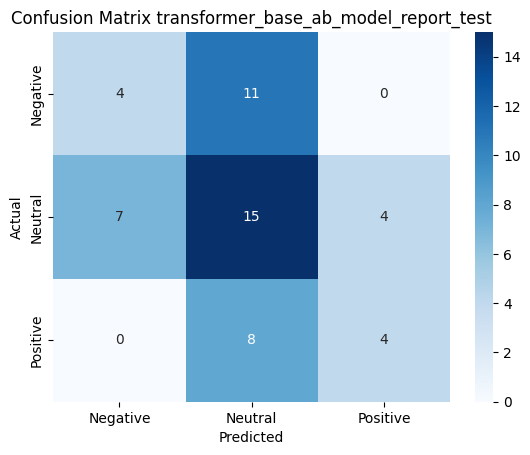

Test performance:
    Accuracy    Recall  Precision        F1  \
0  0.283019  0.283019   0.336848  0.242497   

                                   Model  
0  transformer_base_ab_model_report_test  


In [215]:
# Plot the confusion matrix for the test_data_transformer
confusion_matrix(transformer_base_ab_model, test_data_transformer, test_labels_encoded, "transformer_base_ab_model_report_test")

# Calculate different metrics on test_data_transformer
transformer_base_ab_model_report_test = model_performance_classification_report(transformer_base_ab_model, test_data_transformer, test_labels_encoded, "transformer_base_ab_model_report_test")

# Print the dataframe transformer_base_ab_model_report_test
print("Test performance:\n", transformer_base_ab_model_report_test)

**Observations:**
- The accuracy and f1score on the test data is not that great. It is just 0.28, and 0.24 respectively.
- Hence tuning the model from scratch needs more research and further tuning.
- It is better to consider an existing data models from available LLMs like LLM from huggingface.

## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

The necessary libraries and functions are already imported.

#### Loading the data

In [216]:
# Create a copy of stock_news_raw into a new dataframe stock_news_anlaysis
data = stock_news_raw.copy()

**Observations:**
- Data is copied successfully.

#### Loading the model

In [217]:
# We will use the latest model from 
# https://huggingface.co/TheBloke/Mistral-7B-Instruct-v0.2-GGUF/blob/main/mistral-7b-instruct-v0.2.Q8_0.gguf

# Set the model_name_or_path by using the model TheBloke/Mistral-7B-Instruct-v0.2-GGU
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"

# Set the model_basename to the value mistral-7b-instruct-v0.2.Q6_K.gguf
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

# Initiate a try bolock
try:

  # Use hf_hub_download to download the model mentioned earlier and store in model_path
  model_path = hf_hub_download(repo_id = model_name_or_path, filename = model_basename)

  # Print the model path
  display(Markdown("Model downloaded successfully and saved at {}.".format(model_path)))

# Catch the exception
except Exception as e:

  # Print the error
  display(Markdown("An error occurred: {}.".format(e)))

Model downloaded successfully and saved at /Users/vinayakhampiholi/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf.

**Observations:**
- The model is downloaded successfully.

##### Load the large language model from Hugging Face

In [218]:
# Create the llm with Path to the model, Number of layers transferred to GPU, Context window
llm = Llama(model_path = model_path, n_gpu_layers = 100, n_ctx = 4500)

llama_model_load_from_file: using device Metal (Apple M1 Pro) - 9858 MiB free
llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /Users/vinayakhampiholi/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader:

**Observations:**
- llm is created successfully.

#### Aggregating the data weekly

In [219]:
# Convert the 'Date' column to datetime format.
data["Date"] = pd.to_datetime(data["Date"])

##### Group the data at a week-level

In [220]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key = "Date", freq = "W"))

In [221]:
# Join the news values with ' || ' separator.
weekly_grouped = weekly_grouped.agg({"News": lambda x: " || ".join(x)}).reset_index()

# Display the weekly_grouped information
display(Markdown("**Observatiions:**\n- Shape of weekly_grouped is: {}.".format(weekly_grouped.shape)))

**Observatiions:**
- Shape of weekly_grouped is: (18, 2).

In [222]:
# Check the entries in the weekly_grouped
weekly_grouped

Date                                               News
0  2019-01-06   The tech sector experienced a significant dec...
1  2019-01-13   Sprint and Samsung plan to release 5G smartph...
2  2019-01-20   The U.S. stock market declined on Monday as c...
3  2019-01-27   The Swiss National Bank (SNB) governor, Andre...
4  2019-02-03   Caterpillar Inc reported lower-than-expected ...
5  2019-02-10   The Dow Jones Industrial Average, S&P 500, an...
6  2019-02-17   This week, the European Union's second highes...
7  2019-02-24   This news article discusses progress towards ...
8  2019-03-03   The Dow Jones Industrial Average and other ma...
9  2019-03-10   Spotify, the world's largest paid music strea...
10 2019-03-17   The United States opposes France's digital se...
11 2019-03-24   Facebook's stock price dropped more than 3% o...
12 2019-03-31   This news article reports that the S&P 500 In...
13 2019-04-07   Apple and other consumer brands, including LV...
14 2019-04-14   In March, mobile phone shipments to China dro...
15 2019-04-21   The chairman of Taiwan's Foxconn, Terry Gou, ...
16 2019-04-28   Taiwan's export orders continued to decline f...
17 2019-05-05   Spotify reported better-than-expected Q1 reve...

**Observations:**
- The aggregation looks good

In [223]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Create a function to define the model parameters and generate a response

##### Utility Functions

The function extract_json_data is already created.

##### Defining the response function

The function response_mistral_1 is already created.

##### Checking the model output on a sample

**Note**: Use this section to test out the prompt with one instance before using it for the entire weekly data.

In [224]:
# Check the first row
news = data_1.loc[0, "News"]

In [225]:
# Check the length of news
print(len(news.split(" ")))

2611


In [226]:
# Print the news
print(news)

 The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January. ||  Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10 ||  Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon ||  This news article reports that yields on lon

In [227]:
display(Markdown("**Observations:**\n- Columns in model_response_parsed:{}".format(data_1.columns)))

**Observations:**
- Columns in model_response_parsed:Index(['Date', 'News'], dtype='object')

##### Define the instruction for the task (the task is to identify the top three positive and negative events from the week that are likely to impact the stock price)

In [228]:
prompt = """
You are an expert data analyst specializing in stock market news article analysis that affects the financial market.
Task: Analyze the news headlines and determine which news articles are positive, negative, or neutral in sentiment.
Instructions:
1. Read the individual news items and identify if the article contains positive or negative sentiment.
2. Group the articles by week and consider the date which has maximum articles.
3. If there are more than one date having equal number of articles then choose the older date.
4. For the selected date, list 3 articles that have highest positive sentiments and list 3 articles that have highest negative sentiments in the articles of week.
5. If there are more than 3 articles, then choose any 3 articles randomly.
6. Prepare the output in JSON format with columns 'Week End Date', 'Week Positive Events', 'Week Negative Events'. 
7. Validate the JSON format and correct the errors if the JSON is not valid. 
8. Return the output in the valid JSON format.
Remove any null or NaN values from the output and do not append anything after the end of JSON.
"""

In [229]:
# Generate the summary using response_mistral_1 with prompt and news
summary = response_mistral_1(prompt, news)

llama_perf_context_print:        load time =   23059.02 ms
llama_perf_context_print: prompt eval time =       0.00 ms /  4007 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   379 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   49392.73 ms /  4386 tokens


In [230]:
# Display the summary
summary

' {\n         "Week End Date": "01-07-2019",\n         "Week Positive Events": [\n           {\n             "Title": "Roku Inc announces plans to offer premium video channels on a subscription basis through its free streaming service, The Roku Channel.",\n             "Sentiment": "Positive"\n           },\n           {\n             "Title": "FDIC Chair, Jelena McWilliams, expressed no concern over market volatility affecting the U.S banking system due to banks\' ample capital.",\n             "Sentiment": "Positive"\n           },\n           {\n             "Title": "Oil prices rebounded on Thursday due to dollar weakness, signs of output cuts by Saudi Arabia, and weaker fuel oil margins leading Riyadh to lower February prices for heavier crude grades sold to Asia.",\n             "Sentiment": "Positive"\n           }\n         ],\n         "Week Negative Events": [\n           {\n             "Title": "Apple cut its quarterly revenue forecast for the first time in over 15 years du

In [231]:
extract_json_data(summary)

{'Week End Date': '01-07-2019',
 'Week Positive Events': [{'Title': 'Roku Inc announces plans to offer premium video channels on a subscription basis through its free streaming service, The Roku Channel.',
   'Sentiment': 'Positive'},
  {'Title': "FDIC Chair, Jelena McWilliams, expressed no concern over market volatility affecting the U.S banking system due to banks' ample capital.",
   'Sentiment': 'Positive'},
  {'Title': 'Oil prices rebounded on Thursday due to dollar weakness, signs of output cuts by Saudi Arabia, and weaker fuel oil margins leading Riyadh to lower February prices for heavier crude grades sold to Asia.',
   'Sentiment': 'Positive'}],
 'Week Negative Events': [{'Title': 'Apple cut its quarterly revenue forecast for the first time in over 15 years due to weak iPhone sales in China.',
   'Sentiment': 'Negative'},
  {'Title': 'Investors withdrew a record $98 billion from U.S. stock funds in December, with fears of aggressive monetary policy and an economic slowdown dri

**Observations:**
- JSON conversion was successful on the 1st data.

##### Checking the model output on the weekly data

In [232]:
# Create a new column Key Events to capture the summary
data_1["Key Events"] = data_1["News"].progress_apply(lambda x: response_mistral_1(prompt, x))

  0%|                                                                                                                                                                                                                                                                        | 0/18 [00:00<?, ?it/s]Llama.generate: 4006 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_context_print:        load time =   23059.02 ms
llama_perf_context_print: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   319 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   23047.79 ms /   320 tokens
 11%|████████████████████████████▍                                                                                                                                                                                                                        

##### Apply the response generation function to get an output from the model

In [233]:
# Format the Key Events using json extract
data_1["model_response_parsed"] = data_1["Key Events"].apply(extract_json_data)

# Print the first 5 records
data_1.head()

Error parsing JSON: Extra data: line 33 column 8 (char 1303)
Error parsing JSON: Expecting ',' delimiter: line 28 column 14 (char 1100)


Date                                               News  \
0 2019-01-06   The tech sector experienced a significant dec...   
1 2019-01-13   Sprint and Samsung plan to release 5G smartph...   
2 2019-01-20   The U.S. stock market declined on Monday as c...   
3 2019-01-27   The Swiss National Bank (SNB) governor, Andre...   
4 2019-02-03   Caterpillar Inc reported lower-than-expected ...   

                                          Key Events  \
0   {\n         "Week End Date": "January 11, 201...   
1   {\n         "Week End Date": "2019-02-02",\n ...   
2   {\n         "Week End Date": "2019-01-21",\n ...   
3   {\n         "Week End Date": "2019-02-15",\n ...   
4   {\n         "Week End Date": "2023-03-11",\n ...   

                               model_response_parsed  
0  {'Week End Date': 'January 11, 2019', 'Week Po...  
1  {'Week End Date': '2019-02-02', 'Week Positive...  
2  {'Week End Date': '2019-01-21', 'Week Positive...  
3  {'Week End Date': '2019-02-15', 'Week Positive...  
4  {'Week End Date': '2023-03-11', 'Week Positive...

**Observations:**
- The JSON conversion is successful.

##### Formatting the model output

In [234]:
# Format the response by normalizing the output
model_response_parsed = pd.json_normalize(data_1["model_response_parsed"])

# Print the first 5 records
model_response_parsed.head()

Week End Date                               Week Positive Events  \
0  January 11, 2019  [{'Title': 'Roku Inc offers premium video chan...   
1        2019-02-02  [{'Title': 'Sprint and Samsung plan to release...   
2        2019-01-21  [{'Title': 'Netflix raised the prices of its s...   
3        2019-02-15  [{'Title': 'IBM's stock price increased after ...   
4        2023-03-11  [{'Title': 'Apple reported stronger-than-expec...   

                                Week Negative Events Weeks  
0  [{'Title': 'Apple cut its fiscal first quarter...   NaN  
1  [{'Title': 'Geely forecasts flat sales for 201...   NaN  
2  [{'Title': 'The U.S. stock market declined on ...   NaN  
3  [{'Title': 'The Dow, S&P 500, and Nasdaq exper...   NaN  
4  [{'Title': 'Caterpillar Inc reported lower-tha...   NaN

In [235]:
# Display the columns in the model_response_parsed
display(Markdown("Columns in model_response_parsed: {}.".format(model_response_parsed.columns)))

Columns in model_response_parsed: Index(['Week End Date', 'Week Positive Events', 'Week Negative Events',
       'Weeks'],
      dtype='object').

In [236]:
# Display the columns in data_1
display(Markdown("{}".format(data_1.columns)))

Index(['Date', 'News', 'Key Events', 'model_response_parsed'], dtype='object')

##### Create a DataFrame containing the necessary fields from the model's output in a structured manner

In [237]:
# Use the above data to prepare the dataframe as final_output
final_output = pd.concat([data_1.reset_index(drop = True),model_response_parsed],axis = 1)

# Drop the unwanted columns
final_output.drop(["Date", "News", "Key Events", "model_response_parsed"], axis = 1, inplace = True)

# Display the dataframe
final_output

Week End Date                               Week Positive Events  \
0   January 11, 2019  [{'Title': 'Roku Inc offers premium video chan...   
1         2019-02-02  [{'Title': 'Sprint and Samsung plan to release...   
2         2019-01-21  [{'Title': 'Netflix raised the prices of its s...   
3         2019-02-15  [{'Title': 'IBM's stock price increased after ...   
4         2023-03-11  [{'Title': 'Apple reported stronger-than-expec...   
5                NaN                                                NaN   
6         2019-XX-XX  [{'Title': 'Akamai Technologies reported stron...   
7         2018-11-03  [{'Headline': 'Warner Bros adopts inclusion ri...   
8         02-28-2019  [{'Title': 'The Dow Jones Industrial Average a...   
9         2019-04-26  [{'Title': 'Spotify reports over 1 million uni...   
10        2019-03-31  [{'Title': 'Apple launched a new television ad...   
11        2019-03-23  [{'Title': 'Banks and tech sectors led Wall St...   
12               NaN                                                NaN   
13        2019-03-11  [{'Title': 'Apple and other consumer brands re...   
14               NaN                                                NaN   
15        2020-03-14  [{'Title': 'TomTom reports 14% increase in fir...   
16        2021-04-03  [{'Title': 'Snap reported better-than-expected...   
17        2019-04-12  [{'Title': 'Spotify reported better-than-expec...   

                                 Week Negative Events  \
0   [{'Title': 'Apple cut its fiscal first quarter...   
1   [{'Title': 'Geely forecasts flat sales for 201...   
2   [{'Title': 'The U.S. stock market declined on ...   
3   [{'Title': 'The Dow, S&P 500, and Nasdaq exper...   
4   [{'Title': 'Caterpillar Inc reported lower-tha...   
5                                                 NaN   
6   [{'Title': 'The EU General Court dealt a poten...   
7   [{'Headline': 'WhatsApp security bug allows iP...   
8   [{'Title': 'AAC Technologies Holdings, an Appl...   
9   [{'Title': 'Mozilla considering revoking DarkM...   
10  [{'Title': 'The United States opposes France's...   
11  [{'Title': 'Facebook's stock price dropped mor...   
12                                                NaN   
13  [{'Title': 'Apple's NASDAQ AAPL stock decrease...   
14                                                NaN   
15  [{'Title': 'Apple faces securities fraud lawsu...   
16  [{'Title': 'Taiwan's export orders continued t...   
17  [{'Title': 'The Czech Finance Ministry is fina...   

                                                Weeks  
0                                                 NaN  
1                                                 NaN  
2                                                 NaN  
3                                                 NaN  
4                                                 NaN  
5                                                 NaN  
6                                                 NaN  
7                                                 NaN  
8                                                 NaN  
9                                                 NaN  
10                                                NaN  
11                                                NaN  
12  [{'Week End Date': 'N/A', 'Week Positive Event...  
13                                                NaN  
14                                                NaN  
15                                                NaN  
16                                                NaN  
17                                                NaN

## **Conclusions and Recommendations**

### Observations and Actionable insights

- The Word2Vector, GloVe and sentence_transformer were able to transform the textual data. However, searching similar words were not effective in Word2Vector and GloVe. sentence_transformer was good.
- Training Performance: The model achieves perfect scores (1.0) for accuracy, recall, precision, and F1 on the training data.
- Validation Performance: The model achieves the highest validation metrics reduced more than half. 0.51 and 0.49 for validation set.
- Test Performance: Scores for the test data that did quite well with the test data and it is reduced further by half close to 0.28.
- The models are highly overfitted and not reliable for the unknown data. Hence the sentiment analysis like classifying a text as negative or positive sentiment might not be reliable.
- We need to research further on sentence transformers and models like SVC, RFC to build a better model.
- Using the pre-trained model obtained from huggingface was super useful and it was very quick to train and transform the data.

### Recommendations to Business

- If the business wants to use the existing LLMs then having this data is sufficient to perform the necessary actions like listing the articles with postivie or negative sentiments.
- We can also perform the summarization and searching similar words effectively than the built-in models with the existing data.
- If the business does not want to use any existing pre-trained LLM, then we need more data, more resource and requires a further research to build an effective model that is effective.
- We need to choose the appropriate method based on the business input. If there is a time-bound requirement and the customer is ready to pay for the appropriate licences then we can choose the existing LLM.
- If the customer has enough time and wants to have a separate model that performs the sentimental analysis for security or some other reasons then we need more data, more compute resources and further research to build the model.

-




<font size=6 color='blue'>Power Ahead</font>
___